In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import seaborn as sns
import pickle

In [2]:
dataframe = pd.read_csv(rf'..\data\Մարդաչափական տվյալների հարցում.csv')
dataframe.head()

date_created   date_modified      ip_address  Ձեր սեռը  \
0             NaN             NaN             NaN  Response   
1  2/8/2022 10:30  2/8/2022 10:33     91.196.36.8    Իգական   
2   2/8/2022 8:29   2/8/2022 8:30   217.76.10.130    Իգական   
3   2/8/2022 1:30   2/8/2022 1:31   87.241.184.71    Իգական   
4   2/8/2022 0:08   2/8/2022 0:09  185.215.55.203    Իգական   

            Ձեր տարիքը      Ձեր հասակը (սմ)             Ձեր քաշը  \
0  Open-Ended Response  Open-Ended Response  Open-Ended Response   
1                   16                  165                   55   
2                   16                  154                   42   
3                   17                  167                   56   
4                   18                  165                   70   

      Ձեր կոշիկի չափսը Ձեր տաբատի չափսը Ձեր վերնազգեստի (майка) չափսը  
0  Open-Ended Response         Response                      Response  
1                   38        M (38-39)                             M  
2                   35       XS (34-35)                            XS  
3                   38        M (38-39)                             M  
4                   40        L (40-41)                             M

In [3]:
data = dataframe[['Ձեր սեռը', 
                  'Ձեր տարիքը', 
                  'Ձեր հասակը (սմ)', 
                  'Ձեր քաշը', 
                  'Ձեր վերնազգեստի (майка) չափսը']]
data.head()

Ձեր սեռը           Ձեր տարիքը      Ձեր հասակը (սմ)             Ձեր քաշը  \
0  Response  Open-Ended Response  Open-Ended Response  Open-Ended Response   
1    Իգական                   16                  165                   55   
2    Իգական                   16                  154                   42   
3    Իգական                   17                  167                   56   
4    Իգական                   18                  165                   70   

  Ձեր վերնազգեստի (майка) չափսը  
0                      Response  
1                             M  
2                            XS  
3                             M  
4                             M

In [4]:
data.columns = ['sex', 'age', 'height', 'weight', 'shirt_size']

In [5]:
data = data.drop(0)
data.head()

sex age height weight shirt_size
1  Իգական  16    165     55          M
2  Իգական  16    154     42         XS
3  Իգական  17    167     56          M
4  Իգական  18    165     70          M
5  Արական  16    183     72         XL

In [6]:
data.shape

(306, 5)

In [7]:
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)
data.head()

sex age height weight shirt_size
1  Իգական  16    165     55          M
2  Իգական  16    154     42         XS
3  Իգական  17    167     56          M
4  Իգական  18    165     70          M
5  Արական  16    183     72         XL

In [8]:
data.shape

(287, 5)

In [9]:
data[['age', 'height', 'weight']] = data[['age', 'height', 'weight']].astype(float)
data.head()

sex   age  height  weight shirt_size
1  Իգական  16.0   165.0    55.0          M
2  Իգական  16.0   154.0    42.0         XS
3  Իգական  17.0   167.0    56.0          M
4  Իգական  18.0   165.0    70.0          M
5  Արական  16.0   183.0    72.0         XL

In [10]:
shirt_sizes = {
    'XS': 0,
    'S': 1,
    'M': 2,
    'L': 3,
    'XL': 4,
    'XXL': 5
}

In [11]:
s_sizes = {
    0: 'XS',
    1: 'S',
    2: 'M',
    3: 'L',
    4: 'XL',
    5: 'XXL'
}

In [12]:
sex_encoder = LabelEncoder()
viz_data = data.copy()
viz_data['sex'] = sex_encoder.fit_transform(data['sex'])

viz_data['shirt_size'] = data['shirt_size'].apply(lambda x: shirt_sizes[x])

viz_data.head()

sex   age  height  weight  shirt_size
1    1  16.0   165.0    55.0           2
2    1  16.0   154.0    42.0           0
3    1  17.0   167.0    56.0           2
4    1  18.0   165.0    70.0           2
5    0  16.0   183.0    72.0           4

<AxesSubplot:xlabel='height', ylabel='weight'>

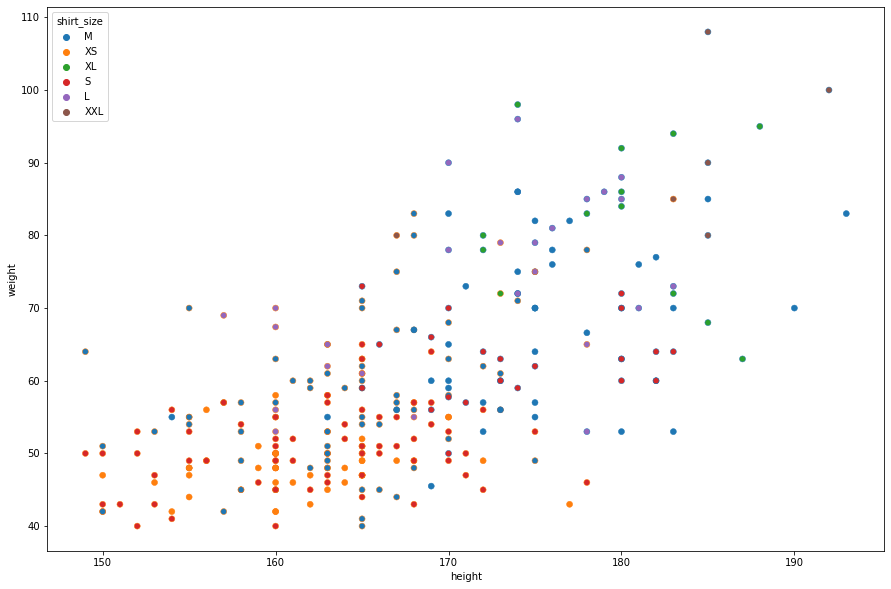

In [13]:
palette = {0: "C0", 1: "C1"}
fig = plt.figure(figsize=(15, 10))
sns.scatterplot(data=viz_data, x='height', y='weight', hue=viz_data['shirt_size'].map(s_sizes), 
                edgecolor=viz_data["sex"].map(palette))

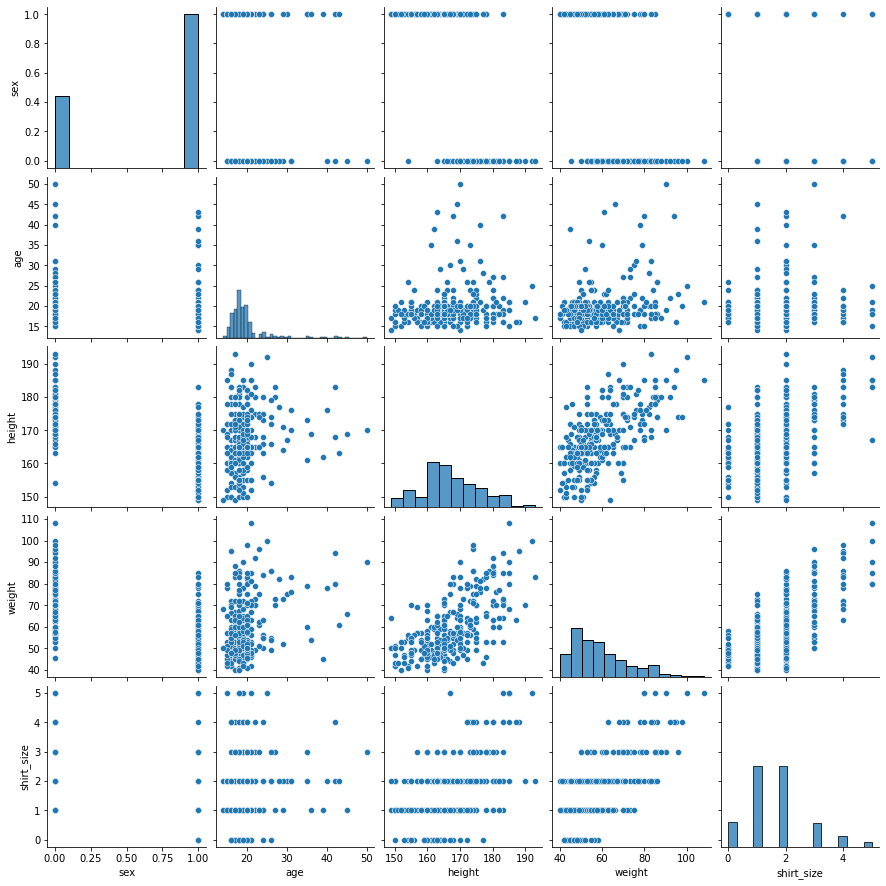

In [14]:
sns.pairplot(viz_data)

In [15]:
X = data[['sex', 'age', 'height', 'weight']]
y = data['shirt_size'].map(shirt_sizes)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

# Logistic Regression

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['age', 'height', 'weight'])])

In [19]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', LogisticRegression())])

In [20]:
param_grid = [
    {
        'model__C': [i for i in range(1, 100)], 
        'model__max_iter': [700]
    }
]

In [21]:
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')

In [22]:
grid_search.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(transformers=[('label_encoding',
                                                                         OneHotEncoder(),
                                                                         ['sex']),
                                                                        ('standard_scaler',
                                                                         StandardScaler(),
                                                                         ['age',
                                                                          'height',
                                                                          'weight'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model__C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 

In [23]:
pd.DataFrame(grid_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.036892      0.006670         0.005312        0.000999   
1        0.052352      0.009502         0.005869        0.001057   
56       0.072050      0.012222         0.004123        0.000195   
55       0.071718      0.008301         0.004260        0.000562   
54       0.074543      0.011075         0.004092        0.000289   

   param_model__C param_model__max_iter  \
0               1                   700   
1               2                   700   
56             57                   700   
55             56                   700   
54             55                   700   

                                      params  split0_test_score  \
0    {'model__C': 1, 'model__max_iter': 700}           0.608696   
1    {'model__C': 2, 'model__max_iter': 700}           0.608696   
56  {'model__C': 57, 'model__max_iter': 700}           0.608696   
55  {'model__C': 56, 'model__max_iter': 700}           0.608696   
54  {'model__C': 55, 'model__max_iter': 700}           0.608696   

    split1_test_score  split2_test_score  split3_test_score  \
0            0.478261           0.521739           0.521739   
1            0.478261           0.521739           0.478261   
56           0.478261           0.565217           0.478261   
55           0.478261           0.565217           0.478261   
54           0.478261           0.565217           0.478261   

    split4_test_score  split5_test_score  split6_test_score  \
0            0.391304           0.434783           0.521739   
1            0.391304           0.434783           0.565217   
56           0.347826           0.391304           0.565217   
55           0.347826           0.391304           0.565217   
54           0.347826           0.391304           0.565217   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
0            0.434783           0.347826                0.5         0.476087   
1            0.391304           0.347826                0.5         0.471739   
56           0.391304           0.347826                0.5         0.467391   
55           0.391304           0.347826                0.5         0.467391   
54           0.391304           0.347826                0.5         0.467391   

    std_test_score  rank_test_score  
0         0.071739                1  
1         0.077807                2  
56        0.089764                3  
55        0.089764                3  
54        0.089764                3

In [24]:
best_log_reg = grid_search.best_estimator_

In [25]:
best_log_reg.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model', LogisticRegression(C=1, max_iter=700))])

In [26]:
y_pred = best_log_reg.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 5, 1, 2, 1, 2, 2, 1, 1, 1, 4, 2, 2,
       4, 2, 2, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 4, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2], dtype=int64)

In [27]:
y_test.values

array([2, 1, 2, 2, 0, 3, 1, 0, 2, 2, 5, 1, 2, 0, 4, 1, 1, 0, 3, 3, 1, 1,
       5, 3, 3, 2, 0, 1, 2, 2, 0, 3, 3, 0, 2, 1, 4, 0, 2, 1, 1, 1, 2, 1,
       3, 2, 3, 2, 3, 2, 1, 2, 1, 4, 2, 1, 0, 2], dtype=int64)

In [28]:
x_axis = np.unique(np.concatenate([y_pred, y_test]))
x_axis = [s_sizes[i] for i in x_axis]
x_axis

['XS', 'S', 'M', 'L', 'XL', 'XXL']

In [29]:
accuracy_score(y_test, y_pred)

0.3103448275862069

[Text(0, 0.5, 'XS'),
 Text(0, 1.5, 'S'),
 Text(0, 2.5, 'M'),
 Text(0, 3.5, 'L'),
 Text(0, 4.5, 'XL'),
 Text(0, 5.5, 'XXL')]

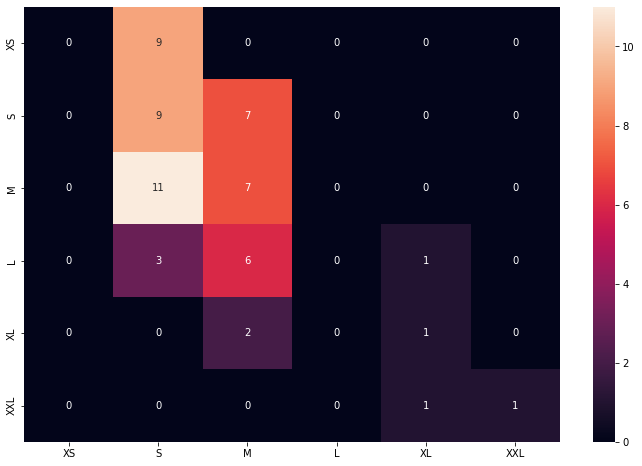

In [30]:
conf_m = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [31]:
best_log_reg.fit(X, y)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model', LogisticRegression(C=1, max_iter=700))])

In [32]:
with open('..\models\shirt_size_pred_models\logistic_regression.pkl', 'wb') as f:
    pickle.dump(best_log_reg, f)

Without Age feature

In [33]:
data_without_age = data.drop(['age'], axis=1)
data_without_age.head()

sex  height  weight shirt_size
1  Իգական   165.0    55.0          M
2  Իգական   154.0    42.0         XS
3  Իգական   167.0    56.0          M
4  Իգական   165.0    70.0          M
5  Արական   183.0    72.0         XL

In [34]:
X_wa = data_without_age[['sex', 'height', 'weight']]
y_wa = data_without_age['shirt_size'].map(shirt_sizes)

In [35]:
X_train_wa, X_test_wa, y_train_wa, y_test_wa = train_test_split(X_wa, y_wa, train_size=0.8, random_state=42)

In [36]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['height', 'weight']),])

In [37]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', LogisticRegression())])

In [38]:
param_grid = [
    {
        'model__C': [i for i in range(1, 100)], 
        'model__max_iter': [700]
    }
]

In [39]:
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_wa, y_train_wa)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('column_trans',
                                        ColumnTransformer(transformers=[('label_encoding',
                                                                         OneHotEncoder(),
                                                                         ['sex']),
                                                                        ('standard_scaler',
                                                                         StandardScaler(),
                                                                         ['height',
                                                                          'weight'])])),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model__C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ..

In [40]:
pd.DataFrame(grid_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
98       0.081780      0.007870         0.004086        0.000345   
79       0.087582      0.018020         0.004245        0.000754   
77       0.079583      0.013508         0.004273        0.000373   
76       0.082266      0.010434         0.004533        0.000471   
75       0.089504      0.016943         0.004687        0.000702   

   param_model__C param_model__max_iter  \
98             99                   700   
79             80                   700   
77             78                   700   
76             77                   700   
75             76                   700   

                                      params  split0_test_score  \
98  {'model__C': 99, 'model__max_iter': 700}           0.521739   
79  {'model__C': 80, 'model__max_iter': 700}           0.521739   
77  {'model__C': 78, 'model__max_iter': 700}           0.521739   
76  {'model__C': 77, 'model__max_iter': 700}           0.521739   
75  {'model__C': 76, 'model__max_iter': 700}           0.521739   

    split1_test_score  split2_test_score  split3_test_score  \
98           0.565217           0.565217           0.521739   
79           0.565217           0.565217           0.521739   
77           0.565217           0.565217           0.521739   
76           0.565217           0.565217           0.521739   
75           0.565217           0.565217           0.521739   

    split4_test_score  split5_test_score  split6_test_score  \
98           0.434783           0.347826           0.608696   
79           0.434783           0.347826           0.608696   
77           0.434783           0.347826           0.608696   
76           0.434783           0.347826           0.608696   
75           0.434783           0.347826           0.608696   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
98           0.434783           0.391304           0.454545         0.484585   
79           0.434783           0.391304           0.454545         0.484585   
77           0.434783           0.391304           0.454545         0.484585   
76           0.434783           0.391304           0.454545         0.484585   
75           0.434783           0.391304           0.454545         0.484585   

    std_test_score  rank_test_score  
98        0.080271                1  
79        0.080271                1  
77        0.080271                1  
76        0.080271                1  
75        0.080271                1

In [41]:
best_log_reg_without_age_feature = grid_search.best_estimator_
best_log_reg_without_age_feature.fit(X_train_wa, y_train_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model', LogisticRegression(C=4, max_iter=700))])

In [42]:
y_pred = best_log_reg_without_age_feature.predict(X_test_wa)
y_pred

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 5, 1, 2, 1, 2, 2, 1, 1, 1, 4, 2, 2,
       4, 2, 3, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 4, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 4, 1, 2, 1, 2], dtype=int64)

In [43]:
y_test_wa.values

array([2, 1, 2, 2, 0, 3, 1, 0, 2, 2, 5, 1, 2, 0, 4, 1, 1, 0, 3, 3, 1, 1,
       5, 3, 3, 2, 0, 1, 2, 2, 0, 3, 3, 0, 2, 1, 4, 0, 2, 1, 1, 1, 2, 1,
       3, 2, 3, 2, 3, 2, 1, 2, 1, 4, 2, 1, 0, 2], dtype=int64)

In [44]:
x_axis = np.unique(np.concatenate([y_pred, y_test_wa]))
x_axis = [s_sizes[i] for i in x_axis]
x_axis

['XS', 'S', 'M', 'L', 'XL', 'XXL']

In [45]:
accuracy_score(y_test_wa, y_pred)

0.3620689655172414

[Text(0, 0.5, 'XS'),
 Text(0, 1.5, 'S'),
 Text(0, 2.5, 'M'),
 Text(0, 3.5, 'L'),
 Text(0, 4.5, 'XL'),
 Text(0, 5.5, 'XXL')]

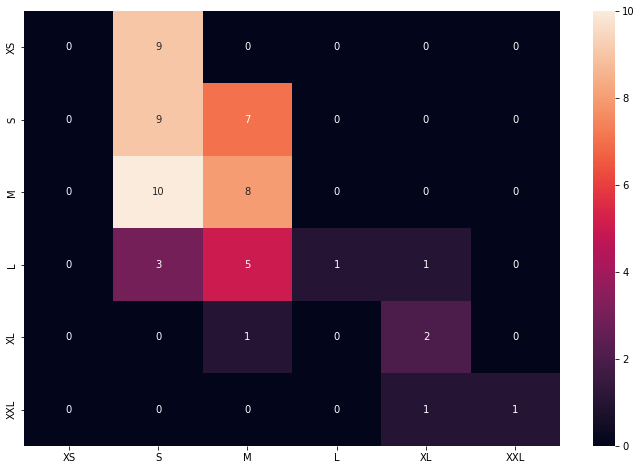

In [46]:
conf_m = confusion_matrix(y_test_wa, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [47]:
best_log_reg_without_age_feature.fit(X_wa, y_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model', LogisticRegression(C=4, max_iter=700))])

In [48]:
with open('..\models\shirt_size_pred_models\logistic_regression_without_age_feature.pkl', 'wb') as f:
    pickle.dump(best_log_reg_without_age_feature, f)

Without Sex feature

In [49]:
data_without_sex = data.drop(['sex'], axis=1)
data_without_sex.head()

age  height  weight shirt_size
1  16.0   165.0    55.0          M
2  16.0   154.0    42.0         XS
3  17.0   167.0    56.0          M
4  18.0   165.0    70.0          M
5  16.0   183.0    72.0         XL

In [50]:
X_ws = data_without_sex[['age', 'height', 'weight']]
y_ws = data_without_sex['shirt_size'].map(shirt_sizes)

In [51]:
X_train_ws, X_test_ws, y_train_ws, y_test_ws = train_test_split(X_ws, y_ws, train_size=0.8, random_state=42)

In [52]:
pipeline = Pipeline([('standard_scaler', StandardScaler()),
                     ('model', LogisticRegression())])

In [53]:
param_grid = [
    {
        'model__C': [i for i in range(1, 100)], 
        'model__max_iter': [700]
    }
]

In [54]:
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='accuracy')
grid_search.fit(X_train_ws, y_train_ws)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('standard_scaler', StandardScaler()),
                                       ('model', LogisticRegression())]),
             param_grid=[{'model__C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29, 30, ...],
                          'model__max_iter': [700]}],
             scoring='accuracy')

In [55]:
pd.DataFrame(grid_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.019294      0.003532         0.001901        0.000535   
1       0.019281      0.001507         0.001679        0.000448   
2       0.022442      0.003361         0.001898        0.000537   
3       0.021373      0.002227         0.001726        0.000421   
4       0.021448      0.001764         0.001806        0.000407   

  param_model__C param_model__max_iter  \
0              1                   700   
1              2                   700   
2              3                   700   
3              4                   700   
4              5                   700   

                                    params  split0_test_score  \
0  {'model__C': 1, 'model__max_iter': 700}           0.565217   
1  {'model__C': 2, 'model__max_iter': 700}           0.565217   
2  {'model__C': 3, 'model__max_iter': 700}           0.565217   
3  {'model__C': 4, 'model__max_iter': 700}           0.565217   
4  {'model__C': 5, 'model__max_iter': 700}           0.565217   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.478261           0.521739           0.478261           0.434783   
1           0.478261           0.565217           0.478261           0.434783   
2           0.478261           0.565217           0.478261           0.391304   
3           0.434783           0.608696           0.478261           0.347826   
4           0.434783           0.608696           0.478261           0.347826   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
0           0.434783           0.521739           0.478261           0.347826   
1           0.391304           0.565217           0.478261           0.347826   
2           0.391304           0.565217           0.478261           0.347826   
3           0.434783           0.565217           0.478261           0.347826   
4           0.434783           0.565217           0.478261           0.347826   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
0           0.545455         0.480632        0.060494                1  
1           0.500000         0.480435        0.070409                2  
2           0.500000         0.476087        0.074327                3  
3           0.500000         0.476087        0.083886                4  
4           0.500000         0.476087        0.083886                4

In [56]:
best_log_reg_without_gender_feature = grid_search.best_estimator_
best_log_reg_without_gender_feature.fit(X_train_ws, y_train_ws)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('model', LogisticRegression(C=1, max_iter=700))])

In [57]:
y_pred = best_log_reg_without_gender_feature.predict(X_test_ws)
y_pred

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 4, 1, 2, 1, 2, 2, 1, 1, 1, 4, 2, 2,
       4, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 4, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 2], dtype=int64)

In [58]:
y_test_ws.values

array([2, 1, 2, 2, 0, 3, 1, 0, 2, 2, 5, 1, 2, 0, 4, 1, 1, 0, 3, 3, 1, 1,
       5, 3, 3, 2, 0, 1, 2, 2, 0, 3, 3, 0, 2, 1, 4, 0, 2, 1, 1, 1, 2, 1,
       3, 2, 3, 2, 3, 2, 1, 2, 1, 4, 2, 1, 0, 2], dtype=int64)

In [59]:
accuracy_score(y_test_ws, y_pred)

0.27586206896551724

In [60]:
x_axis = np.unique(np.concatenate([y_pred, y_test_ws]))
x_axis = [s_sizes[i] for i in x_axis]
x_axis

['XS', 'S', 'M', 'L', 'XL', 'XXL']

[Text(0, 0.5, 'XS'),
 Text(0, 1.5, 'S'),
 Text(0, 2.5, 'M'),
 Text(0, 3.5, 'L'),
 Text(0, 4.5, 'XL'),
 Text(0, 5.5, 'XXL')]

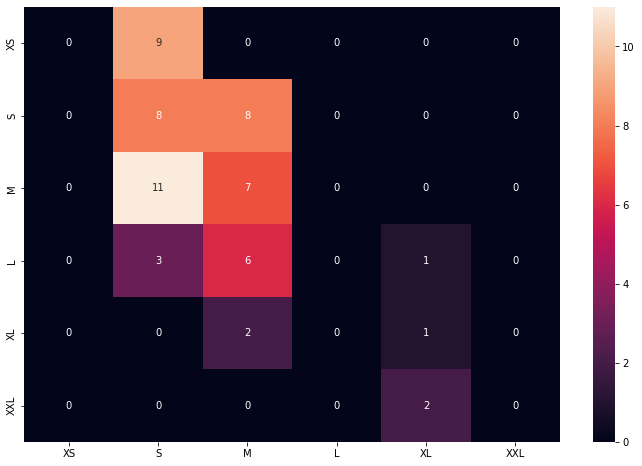

In [61]:
conf_m = confusion_matrix(y_test_ws, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [62]:
best_log_reg_without_gender_feature.fit(X_ws, y_ws)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('model', LogisticRegression(C=1, max_iter=700))])

In [63]:
with open('..\models\shirt_size_pred_models\logistic_regression_without_gender_feature.pkl', 'wb') as f:
    pickle.dump(best_log_reg_without_gender_feature, f)

Logistic Regression results.
<br>
with all features = 46.0% accuracy score, std = 6% 
<br>
without age feature = 46.9% accuracy score, std = 6%
<br>
without sex seature = 46.4% accuracy score, std = 8%

# Decision Tree

In [64]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [65]:
X_train_viz = X_train.copy()
label_encoder = LabelEncoder()
X_train_viz['sex'] = label_encoder.fit_transform(X_train['sex'])

In [66]:
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_train_viz, y_train)

DecisionTreeClassifier(max_depth=3)

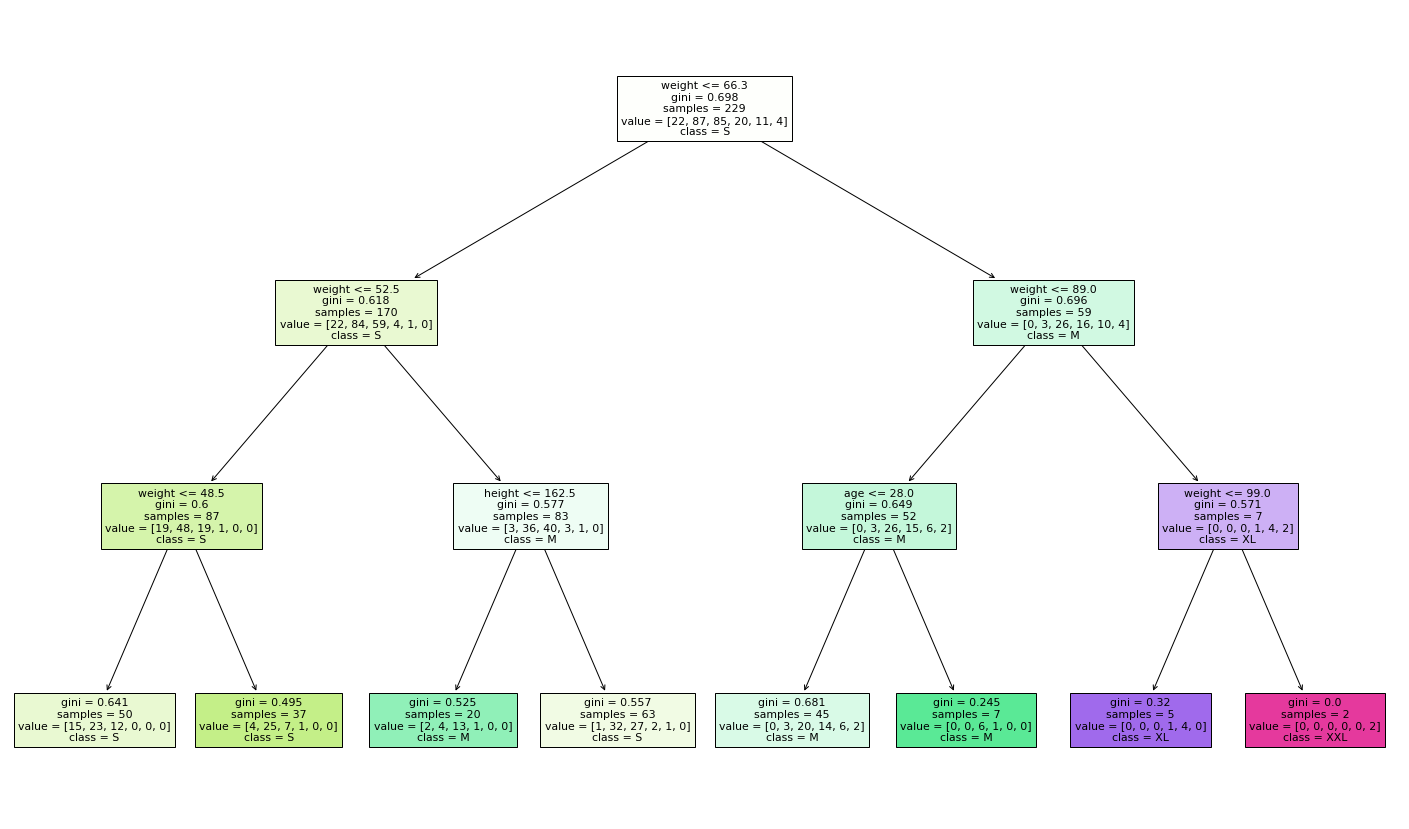

In [67]:
plt.figure(figsize=(25, 15))
plot_tree(decision_tree, 
          class_names=[s_sizes[i] for i in decision_tree.classes_],
          feature_names=X_train_viz.columns,
          filled=True)
plt.savefig(r'..\plots\shirt_size_tree_max_depth_3.pdf', format='pdf', bbox_inches = "tight")

In [68]:
param_grid = [
    {
        'model__max_depth': [i for i in range(1, 12)],
        'model__criterion': ['gini', 'entropy'],
        'model__min_samples_split': [i for i in range(2, 40)],
        'model__min_samples_leaf': [i for i in range(1, 25)],   
    }
]

In [69]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['age', 'height', 'weight']),])

In [70]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', DecisionTreeClassifier())])

In [71]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train, y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=17;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=17;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=17;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=17;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=17;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=17;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, m

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[CV 5/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=19, model__min_samples_split=12;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=19, model__min_samples_split=12;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=19, model__min_samples_split=12;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=19, model__min_samples_split=12;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=19, model__min_samples_split=12;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=19, model__min_samples_split=12;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=21;, scor

[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=34;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=34;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=34;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=34;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=3, model__min_samples_split=24;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=3, model__min_samples_split=24;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=3, model__min_samples_split=24;, score=0.565

[CV 4/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=13;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=13;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=13;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=13;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=13;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=13;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_sample

[CV 4/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=18, model__min_samples_split=15;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=18, model__min_samples_split=15;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=18, model__min_samples_split=15;, score=0.522 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=18, model__min_samples_split=15;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=18, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=18, model__min_samples_split=15;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=18, model__min_sample

[CV 5/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=28;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=28;, score=0.522 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=28;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=28;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=28;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=28;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=8, model__min_samples

[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=36;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=36;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=36;, score=0.565 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=36;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=36;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=36;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=24, model__min_samples_split=3

[CV 6/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=38;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=38;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=38;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=38;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=20, model__min_samples_split=38;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=1, model__min_samples_split=6;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=1, model__min_samples_split=6;, score=0

[CV 6/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=21;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=21;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=21;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=21;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=21;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=23, model__min_samples_split=30;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=23, model__min_samples_spl

[CV 7/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=13;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=13;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=13;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=13;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=10;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=1

[CV 7/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=18;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=18;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=18;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=18;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=20;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=20;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=20;, score=0.

[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=7;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=7;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=16, model__min_samples_split=7;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=23;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=23;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split=23;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=2, model__min_samples_split

[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=16, model__min_samples_split=26;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=16, model__min_samples_split=26;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=10, model__min_samples_split=25;, score=0.304 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=10, model__min_samples_split=25;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=10, model__min_samples_split=25;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=10, model__min_samples_split=25;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=10, model__min_samples_split=25;, sc

[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=18, model__min_samples_split=32;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=18, model__min_samples_split=32;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=38;, score=0.435 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=38;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=38;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=38;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=38;

[CV 6/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=8, model__min_samples_split=23;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=8, model__min_samples_split=23;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=8, model__min_samples_split=23;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=8, model__min_samples_split=23;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=8, model__min_samples_split=23;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=11, model__min_samples_split=10;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=11, model__min_samples_split=10;

[CV 5/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=24, model__min_samples_split=39;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=24, model__min_samples_split=39;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=24, model__min_samples_split=39;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=24, model__min_samples_split=39;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=24, model__min_samples_split=39;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=24, model__min_samples_split=39;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=35;, score=0.

[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=26;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=26;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=26;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=26;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=25;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=25;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=2

[CV 9/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=26;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=26;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=34;, score=0.304 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=34;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=34;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=34;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=34;, score=0.6

[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=38;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=38;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=38;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=24;, score=0.261 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=24;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=24;, score=0.609 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=24;,

[CV 8/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=12, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=12, model__min_samples_split=15;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=12, model__min_samples_split=15;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=16, model__min_samples_split=14;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=16, model__min_samples_split=14;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=16, model__min_samples_split=14;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=16, model__min_samples_split=

[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=22, model__min_samples_split=35;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=22, model__min_samples_split=35;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=22, model__min_samples_split=35;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=19, model__min_samples_split=11;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=19, model__min_samples_split=11;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=19, model__min_samples_split=11;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=19, model__min_sa

[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=8, model__min_samples_split=34;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=29;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=29;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=29;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=29;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=29;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=1, model__min_samples_split=29

[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=4;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=4;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=4;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=7, model__min_samples_split=11;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=7, model__min_samples_split=11;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=7, model__min_samples_split=11;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=7, model__min_samples_split=11;, score=0.

[CV 7/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=21, model__min_samples_split=15;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=21, model__min_samples_split=15;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=21, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=21, model__min_samples_split=15;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=11;, score=0.261 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=11;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=11;, sc

[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=21;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=21;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=21;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=21;, score=0.565 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=21;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=21;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=21;, s

[CV 5/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=26;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=26;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=26;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=26;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=26;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=19, model__min_samples_split=26;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=18, model__min_samples_split=32;, scor

[CV 6/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=24, model__min_samples_split=14;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=24, model__min_samples_split=14;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=24, model__min_samples_split=14;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=24, model__min_samples_split=14;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=24, model__min_samples_split=14;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=10;, score=0.435 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=10;, scor

[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=39;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=39;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=39;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=39;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=33;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=33;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=4, model__min_samples_split=33;, sc

[CV 6/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=17;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=17;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=17;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=17;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=39;, score=0.435 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=39;, sc

[CV 6/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=15, model__min_samples_split=36;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=15, model__min_samples_split=36;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=15, model__min_samples_split=36;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=15, model__min_samples_split=36;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=15, model__min_samples_split=36;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=21, model__min_samples_split=35;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=21, model__min_samples_split=35

[CV 7/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=28;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=28;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=28;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=1, model__min_samples_split=28;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=38;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split=38;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=2, model__min_samples_split

[CV 7/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=17, model__min_samples_split=14;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=17, model__min_samples_split=14;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=17, model__min_samples_split=14;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=17, model__min_samples_split=14;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=19, model__min_samples_split=25;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=19, model__min_samples_split=25;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=19, model__min_samples_split=25;, score=0.

[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=12, model__min_samples_split=20;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=12, model__min_samples_split=20;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=12, model__min_samples_split=20;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=3;, s

[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=13;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=13;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=14, model__min_samples_split=37;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=14, model__min_samples_split=37;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=14, model__min_samples_split=37;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=14, model__min_samples_split=37;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=14, model__min_samples_split=37;, sco

[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9;, score=0.348 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=9;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=13, model__min_samples_split=2;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=13, model__min_samples_split=2;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=13, model__min_samples_split=2;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=13, model__min_samples_split=2;, score=0.348 total 

[CV 8/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split=12;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split=12;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split=12;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=22, model__min_samples_split=8;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=22, model__min_samples_split=8;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=22, model__min_samples_split=8;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=22, model__min_samples_split=8;, score=0.261 

[CV 7/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=15;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=15;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=15;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=18, model__min_samples_split=21;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=18, model__min_samples_split=21;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=18, model__min_samples_split=21;, score=0.

[CV 8/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=22, model__min_samples_split=10;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=22, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=22, model__min_samples_split=10;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=11;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=11;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=11;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=11;, score=0.

[CV 7/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=18, model__min_samples_split=17;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=18, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=18, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=18, model__min_samples_split=17;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=9;, sc

[CV 10/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=39;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=1, model__min_samples_split=26;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=1, model__min_samples_split=26;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=1, model__min_samples_split=26;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=1, model__min_samples_split=26;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=1, model__min_samples_split=26;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=1, model__min_samples_split=26

[CV 8/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=34;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=34;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=34;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=18;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=18;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=18;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=3, model__min_samples_split=18;, score=0.391 tot

[CV 4/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=4, model__min_samples_split=27;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=4, model__min_samples_split=27;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=4, model__min_samples_split=27;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=4, model__min_samples_split=27;, score=0.565 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=4, model__min_samples_split=27;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=4, model__min_samples_split=27;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=4, model__min_samples_split=27;, score=0.500 tot

[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=7;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=7;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=7;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=7;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=7;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=7;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split

[CV 5/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=30;, score=0.652 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=30;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=30;, score=0.565 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=30;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=30;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=30;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=7, model__min_samples_split=3;, score=0

[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=25;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=25;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=25;, score=0.609 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=25;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=25;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=3, model__min_samples_split=25;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=19, model__min_samples_spli

[CV 5/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=29;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=29;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=29;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=29;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=29;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=29;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=15, model__min_samples_split=9;, score=0.391 tot

[CV 7/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=21;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=21;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=21;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=21;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=14;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=14;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=

[CV 8/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=9, model__min_samples_split=37;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=9, model__min_samples_split=37;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=9, model__min_samples_split=37;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=28;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=28;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=28;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_s

[CV 7/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=21;, score=0.565 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=21;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=21;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=21;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=11, model__min_samples_split=20;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=11, model__min_samples_split=20;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=11, model__min_samples_split=20;, score=0.

[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=20, model__min_samples_split=39;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=20, model__min_samples_split=39;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=20, model__min_samples_split=39;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=20, model__min_samples_split=39;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=16;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=16;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=1

[CV 7/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=2;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=2;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=2;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=3;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=3;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=3;, score=0.565 tot

[CV 8/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=13, model__min_samples_split=3;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=13, model__min_samples_split=3;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=13, model__min_samples_split=3;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=19;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=19;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=19;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=19;, score=0.348

[CV 8/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=14, model__min_samples_split=4;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=14, model__min_samples_split=4;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=14, model__min_samples_split=4;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=11, model__min_samples_split=22;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=11, model__min_samples_split=22;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=11, model__min_samples_split=22;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=11, model__min_samples_split=

[CV 7/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=2;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=2;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=2;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=8, model__min_samples_split=2;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=15;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=15;, 

[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=36;, score=0.565 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=36;, score=0.565 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=36;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=36;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=36;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=8, model__min_samples_split=31;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=8, model__min_samples_split=31;, score=0.4

[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=24, model__min_samples_split=12;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=24, model__min_samples_split=12;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=24, model__min_samples_split=12;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=24, model__min_samples_split=12;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=16;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=16;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=16;, score

[CV 9/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=8, model__min_samples_split=8;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=8, model__min_samples_split=8;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=27;, score=0.304 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=27;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=27;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=27;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=27;, score=0.565 total

[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=29;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=29;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=29;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=29;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=29;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=29;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=17, model__min_samples

[CV 8/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=14;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=14;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=14;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=20;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=20;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=20;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=20;, sc

[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=5, model__min_samples_split=25;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=5, model__min_samples_split=25;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=5, model__min_samples_split=25;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=5, model__min_samples_split=25;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=5, model__min_samples_split=25;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=24;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=24;, score

[CV 6/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=5, model__min_samples_split=16;, score=0.304 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=5, model__min_samples_split=16;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=5, model__min_samples_split=16;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=5, model__min_samples_split=16;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=5, model__min_samples_split=16;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=23, model__min_samples_split=26;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=23, model__min_samples_sp

[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=23, model__min_samples_split=25;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=23, model__min_samples_split=25;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=23, model__min_samples_split=25;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=23, model__min_samples_split=25;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=23, model__min_samples_split=25;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=21, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=21, model__min_samples_split=15;, score=0.

[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=3;, score=0.261 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=3;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=3;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=24, model__min_samples_split=39;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=24, model__min_samples_split=39;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=24, model__min_samples_split=39;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=24, model__min_samples_split=39;, score=0.391

[CV 9/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=12, model__min_samples_split=38;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=12, model__min_samples_split=38;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=39;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=39;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=39;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=39;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=10, model__min_samp

[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=33;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=33;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=36;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=36;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=36;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=36;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=36;

[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=6, model__min_samples_split=3;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=30;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=30;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=30;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=30;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=30;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=11, model__min_sa

[CV 1/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=22, model__min_samples_split=23;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=22, model__min_samples_split=23;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=22, model__min_samples_split=23;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=22, model__min_samples_split=23;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=22, model__min_samples_split=23;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=22, model__min_samples_split=23;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=22, model__min_samples

[CV 10/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=10, model__min_samples_split=37;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=3, model__min_samples_split=32;, score=0.261 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=3, model__min_samples_split=32;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=3, model__min_samples_split=32;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=3, model__min_samples_split=32;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=3, model__min_samples_split=32;, score=0.652 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=3, model__min_samples_split=32;, score=0.

[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=21, model__min_samples_split=15;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=21, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=21, model__min_samples_split=15;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=12;, score=0.435 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=12;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=12;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=5, model__min_samples_split=12;, 

[CV 10/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=11, model__min_samples_split=7;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=14;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=14;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=14;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=14;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=14;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=14;, score=0.348 tot

[CV 9/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=6, model__min_samples_split=21;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=6, model__min_samples_split=21;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=23, model__min_samples_split=11;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=23, model__min_samples_split=11;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=23, model__min_samples_split=11;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=23, model__min_samples_split=11;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=23, model__min_samples_

[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=16, model__min_samples_split=16;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=14, model__min_samples_split=5;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=14, model__min_samples_split=5;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=14, model__min_samples_split=5;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=14, model__min_samples_split=5;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=14, model__min_samples_split=5;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=14, model__min_samples_split=5;, score=0.348

[CV 1/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=2;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=2;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=2;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=2;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=2;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=2;, score=0.304 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split

[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=15;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=15;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=15;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=15;, score=0.5

[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=4, model__min_samples_split=11;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=10;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=10;, score=0.348 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=10;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=10;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=10;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=10

[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=13;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=13;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=13;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=12;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=12;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=12;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=12;,

[CV 7/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=11, model__min_samples_split=9;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=11, model__min_samples_split=9;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=11, model__min_samples_split=9;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=11, model__min_samples_split=9;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=39;, score=0.435 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_split=39;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=10, model__min_samples_sp

[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=7;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=7;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=13, model__min_samples_split=2;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=13, model__min_samples_split=2;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=13, model__min_samples_split=2;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=13, model__min_samples_split=2;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=13, model__min_samples_split=

[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=20;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=20;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=20;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=20;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=20;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=20;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=20;, score=0.478 tota

[CV 1/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=9;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=9;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=9;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=9;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=9;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=9;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split

[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=37;, score=0.304 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=37;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=37;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=37;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=37;, score=0.652 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=37;, score=0.565 tota

[CV 7/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=28;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=28;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=28;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=28;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=19, model__min_samples_split=11;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=19, model__min_samples_split=11;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=19, model__min_samples_spli

[CV 8/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=17, model__min_samples_split=10;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=17, model__min_samples_split=10;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=17, model__min_samples_split=10;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=37;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=37;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=1, model__min_samples

[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=8;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=8;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=8;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=8;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=16, model__min_samples_split=18;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=16, model__min_samples_split=18;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=16, model__min_samples_sp

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['age',
                                                                                'height',
                                                                                'weight'])])),
                                             ('model',
                                              DecisionTreeClassifier())]),
                   n_iter=500,
  

In [72]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
322       0.007672      0.000559         0.004104        0.000390   
237       0.008293      0.001032         0.004017        0.000803   
172       0.007745      0.001171         0.004029        0.000728   
475       0.007445      0.000596         0.004028        0.000719   
8         0.007338      0.000691         0.004064        0.000274   

    param_model__min_samples_split param_model__min_samples_leaf  \
322                             36                             4   
237                             34                             6   
172                             39                             6   
475                             18                             3   
8                               24                             3   

    param_model__max_depth param_model__criterion  \
322                      5                   gini   
237                      4                   gini   
172                     10                   gini   
475                      2                   gini   
8                        2                   gini   

                                                params  split0_test_score  \
322  {'model__min_samples_split': 36, 'model__min_s...           0.304348   
237  {'model__min_samples_split': 34, 'model__min_s...           0.347826   
172  {'model__min_samples_split': 39, 'model__min_s...           0.304348   
475  {'model__min_samples_split': 18, 'model__min_s...           0.347826   
8    {'model__min_samples_split': 24, 'model__min_s...           0.347826   

     ...  split3_test_score  split4_test_score  split5_test_score  \
322  ...           0.391304           0.652174           0.565217   
237  ...           0.391304           0.652174           0.478261   
172  ...           0.391304           0.652174           0.521739   
475  ...           0.391304           0.565217           0.521739   
8    ...           0.391304           0.565217           0.521739   

     split6_test_score  split7_test_score  split8_test_score  \
322           0.565217           0.434783           0.478261   
237           0.521739           0.434783           0.521739   
172           0.478261           0.434783           0.521739   
475           0.565217           0.434783           0.434783   
8             0.565217           0.434783           0.434783   

     split9_test_score  mean_test_score  std_test_score  rank_test_score  
322                0.5         0.489130        0.096855                1  
237                0.5         0.489130        0.082063                1  
172                0.5         0.484783        0.090185                3  
475                0.5         0.484783        0.074073                3  
8                  0.5         0.484783        0.074073                3  

[5 rows x 22 columns]

In [73]:
best_tree = rand_search.best_estimator_
best_tree.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=6,
                                        min_samples_split=34))])

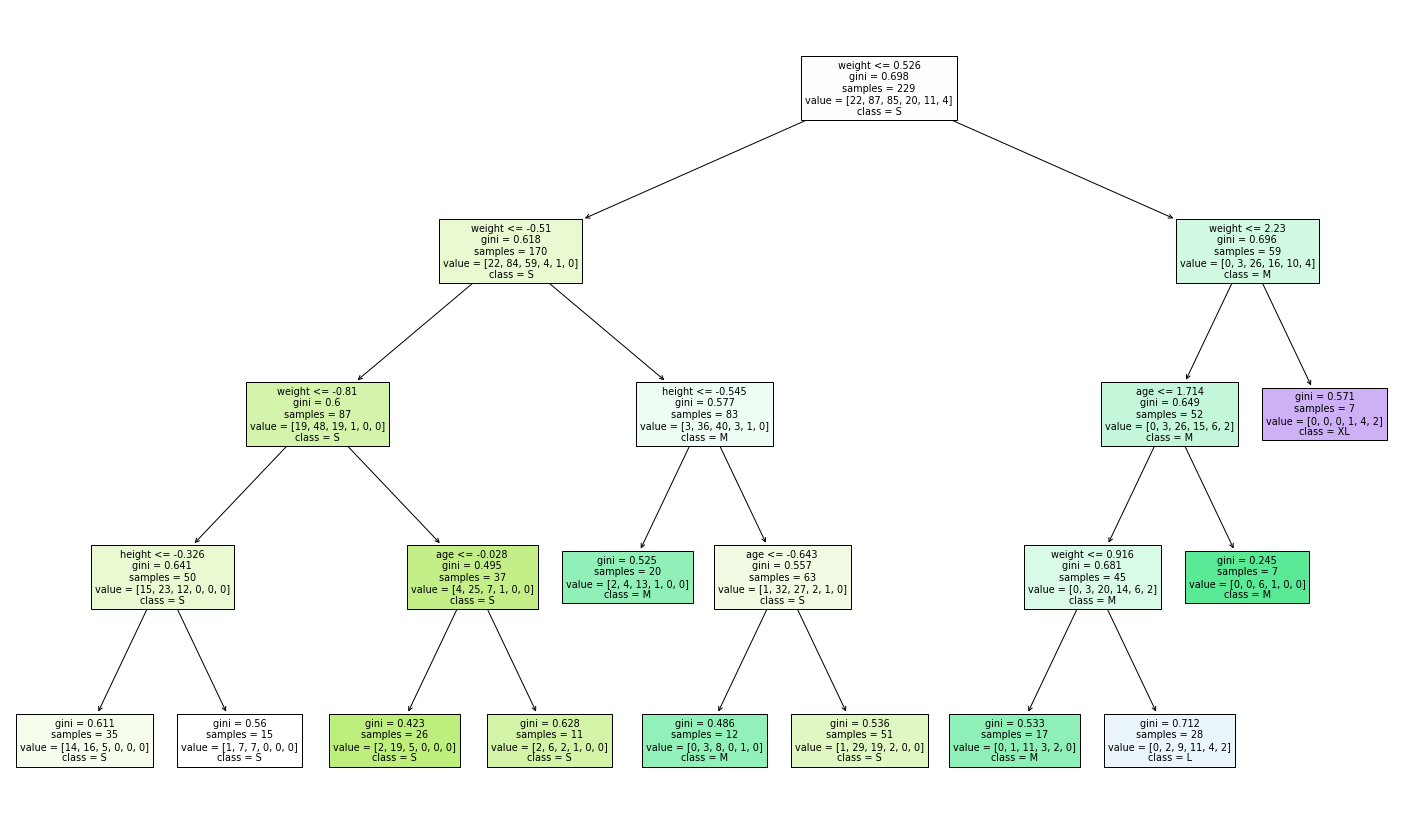

In [74]:
plt.figure(figsize=(25, 15))
plot_tree(best_tree.named_steps.model, 
          filled=True, 
          class_names=[s_sizes[i] for i in best_tree.named_steps.model.classes_],
          feature_names=['male', 'female', 'age', 'height', 'weight'])
plt.savefig(r'..\plots\shirt_size_best_tree.pdf', format='pdf', bbox_inches = "tight")

In [75]:
y_pred = best_tree.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 2, 1, 3, 1, 1, 1, 1, 3, 2, 1,
       4, 2, 4, 3, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 2, 1, 2], dtype=int64)

In [76]:
y_test.values

array([2, 1, 2, 2, 0, 3, 1, 0, 2, 2, 5, 1, 2, 0, 4, 1, 1, 0, 3, 3, 1, 1,
       5, 3, 3, 2, 0, 1, 2, 2, 0, 3, 3, 0, 2, 1, 4, 0, 2, 1, 1, 1, 2, 1,
       3, 2, 3, 2, 3, 2, 1, 2, 1, 4, 2, 1, 0, 2], dtype=int64)

In [77]:
accuracy_score(y_test, y_pred)

0.3103448275862069

In [78]:
x_axis = np.unique(np.concatenate([y_pred, y_test]))
x_axis = [s_sizes[i] for i in x_axis]
x_axis

['XS', 'S', 'M', 'L', 'XL', 'XXL']

[Text(0, 0.5, 'XS'),
 Text(0, 1.5, 'S'),
 Text(0, 2.5, 'M'),
 Text(0, 3.5, 'L'),
 Text(0, 4.5, 'XL'),
 Text(0, 5.5, 'XXL')]

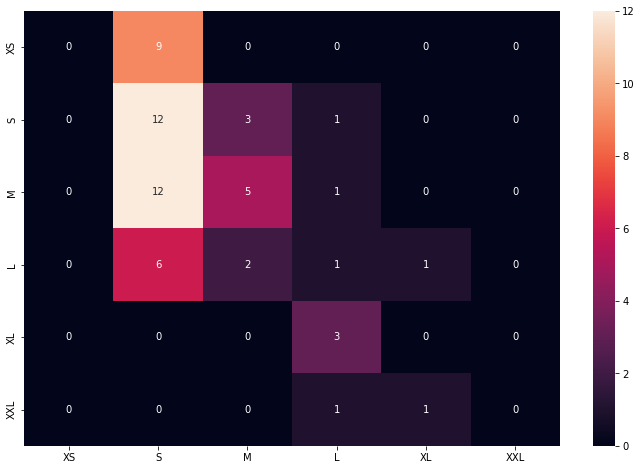

In [79]:
conf_m = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [80]:
best_tree.fit(X, y)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=6,
                                        min_samples_split=34))])

In [81]:
with open('..\models\shirt_size_pred_models\decision_tree_classifier.pkl', 'wb') as f:
    pickle.dump(best_tree, f)

Without Age feature

In [82]:
X_train_viz = X_train_wa.copy()
label_encoder = LabelEncoder()
X_train_viz['sex'] = label_encoder.fit_transform(X_train_wa['sex'])

In [83]:
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_train_viz, y_train_wa)

DecisionTreeClassifier(max_depth=3)

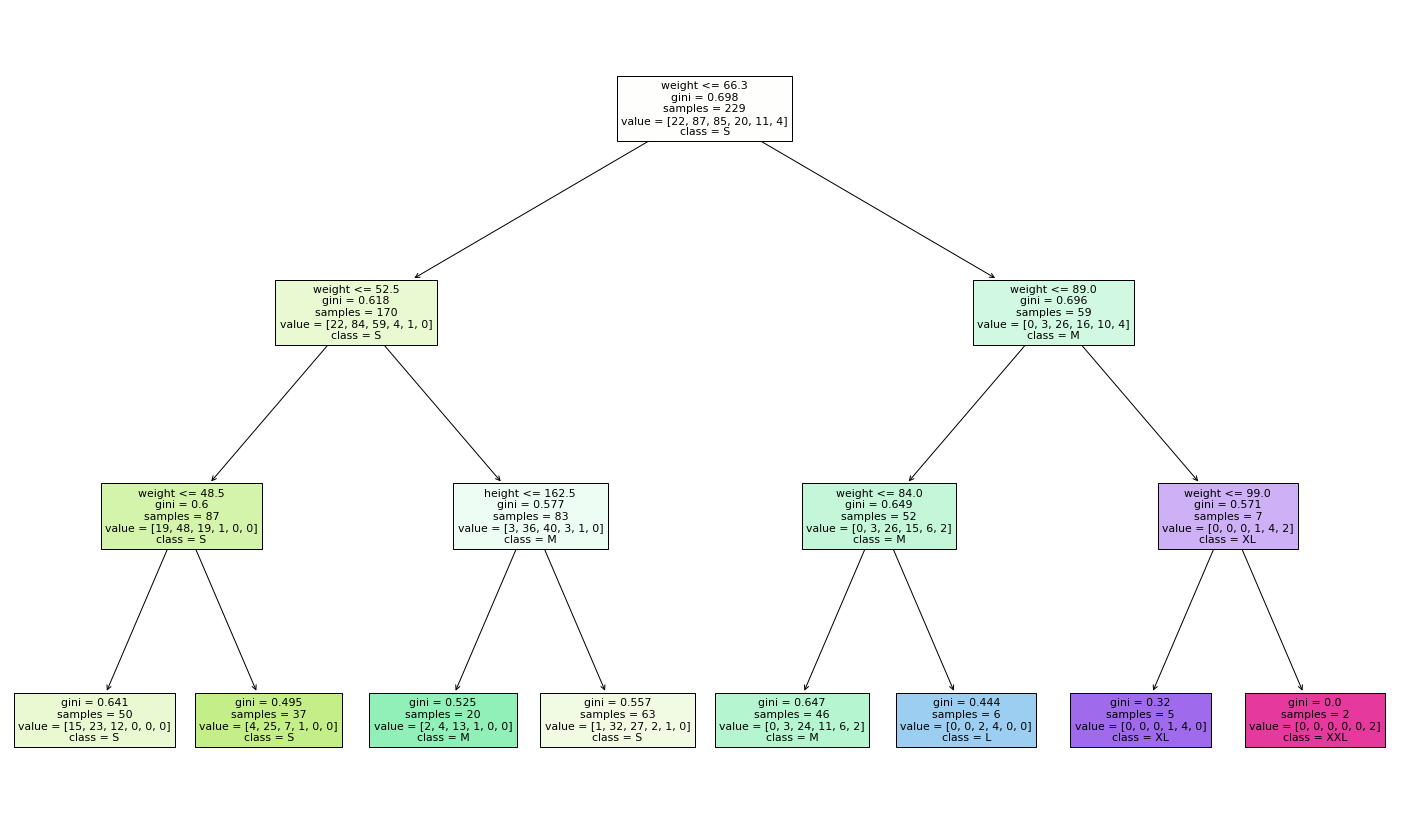

In [84]:
plt.figure(figsize=(25, 15))
plot_tree(decision_tree, 
          class_names=[s_sizes[i] for i in decision_tree.classes_],
          feature_names=X_train_viz.columns,
          filled=True)
plt.savefig(r'..\plots\shirt_size_tree_max_depth_3_without_age_feature.pdf', format='pdf', bbox_inches = "tight")

In [85]:
param_grid = [
    {
        'model__max_depth': [i for i in range(1, 12)],
        'model__criterion': ['gini', 'entropy'],
        'model__min_samples_split': [i for i in range(2, 40)],
        'model__min_samples_leaf': [i for i in range(1, 25)],   
    }
]

In [86]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['height', 'weight']),])

In [87]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', DecisionTreeClassifier())])

In [88]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train_wa, y_train_wa)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
[CV 1/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=20, model__min_samples_split=16;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=20, model__min_samples_split=16;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=20, model__min_samples_split=16;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=20, model__min_samples_split=16;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=20, model__min_samples_split=16;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=20, model__min_samples_split=16;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, m

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9;, score=0.348 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=2, model__min_samples_split=9;, score=0.500 total time

[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=24, model__min_samples_split=15;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=24, model__min_samples_split=15;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=24, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=24, model__min_samples_split=15;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=23;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=23;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=23;, score

[CV 7/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=4, model__min_samples_split=24;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=4, model__min_samples_split=24;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=4, model__min_samples_split=24;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=4, model__min_samples_split=24;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=3, model__min_samples_split=4;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=3, model__min_samples_split=4;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=3, model__min_samples_split=4;, score=

[CV 6/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=4, model__min_samples_split=26;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=4, model__min_samples_split=26;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=4, model__min_samples_split=26;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=4, model__min_samples_split=26;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=4, model__min_samples_split=26;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=16, model__min_samples_split=27;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=16, model__min_samples_split=27;, score=0.478 t

[CV 6/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=33;, score=0.304 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=33;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=33;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=33;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=33;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=21;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=21;, score=0

[CV 6/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=24, model__min_samples_split=20;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=24, model__min_samples_split=20;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=24, model__min_samples_split=20;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=24, model__min_samples_split=20;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=24, model__min_samples_split=20;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6;, score=0.304 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=6

[CV 4/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=6, model__min_samples_split=6;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=6, model__min_samples_split=6;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=6, model__min_samples_split=6;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=6, model__min_samples_split=6;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=6, model__min_samples_split=6;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=6, model__min_samples_split=6;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=6, model__min_samples_spli

[CV 2/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=15, model__min_samples_split=16;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=15, model__min_samples_split=16;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=15, model__min_samples_split=16;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=15, model__min_samples_split=16;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=15, model__min_samples_split=16;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=15, model__min_samples_split=16;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=15, model__min_samples

[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=9;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=9;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=9;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=9;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=9;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=9;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split

[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=22;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=22;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=22;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=22;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=22;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=22;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=17, model__min_samples_split=22;, score=0.4

[CV 8/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=38;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=38;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=38;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=14;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=14;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=14;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=14;, score=0.

[CV 4/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=21, model__min_samples_split=39;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=21, model__min_samples_split=39;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=21, model__min_samples_split=39;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=21, model__min_samples_split=39;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=21, model__min_samples_split=39;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=21, model__min_samples_split=39;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=21, model__min_samples_split=39;, score=0.

[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=17, model__min_samples_split=26;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=17, model__min_samples_split=26;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=17, model__min_samples_split=26;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=17, model__min_samples_split=26;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=17, model__min_samples_split=26;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=17, model__min_samples_split=26;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=17, model__min_samples

[CV 4/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=20, model__min_samples_split=17;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=20, model__min_samples_split=17;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=20, model__min_samples_split=17;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=20, model__min_samples_split=17;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=20, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=20, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=20, model__min_sample

[CV 6/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=7;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=7;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=7;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=7;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=16, model__min_samples_split=7;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=13, model__min_samples_split=25;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=13, model__min_samples_split=25;, sc

[CV 7/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=22, model__min_samples_split=35;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=22, model__min_samples_split=35;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=22, model__min_samples_split=35;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=22, model__min_samples_split=35;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=16, model__min_samples_split=39;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=16, model__min_samples_split=39;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=16, model__min_samples_split=3

[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=12, model__min_samples_split=18;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=12, model__min_samples_split=18;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=4;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=4;, score=0.304 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=4;, score=0.304 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=4;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=2, model__min_samples_split=4;, score=0.478 

[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=15;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=26;, score=0.304 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=26;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=26;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=26;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=2

[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=15, model__min_samples_split=14;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=15, model__min_samples_split=14;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=17;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=17;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=17;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=15, model__min_samples_split=17;, s

[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=4;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=4;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=4;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=4;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=4;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=4;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=4;, score=0.478 tota

[CV 2/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=35;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=35;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=35;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=35;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=35;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=35;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples

[CV 1/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=16;, score=0.435 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=16;, score=0.348 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=16;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=16;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=16;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=16;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=4, model__min_samples_split=16;, score=0.522 tota

[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=5;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=5;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=5;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=5;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=5;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=5;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=15, model__min_samples_split=5;, score=0.435 tota

[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=39;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=39;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=39;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=39;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=39;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=39;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split

[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=37;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=37;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=37;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=37;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=37;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=37;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=19, model__min_samples_

[CV 5/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=4, model__min_samples_split=34;, score=0.304 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=4, model__min_samples_split=34;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=4, model__min_samples_split=34;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=4, model__min_samples_split=34;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=4, model__min_samples_split=34;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=4, model__min_samples_split=34;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=3

[CV 6/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=1, model__min_samples_split=24;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=1, model__min_samples_split=24;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=1, model__min_samples_split=24;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=1, model__min_samples_split=24;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=1, model__min_samples_split=24;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=19;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=19;, score=0.391

[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=6, model__min_samples_split=11;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=6, model__min_samples_split=11;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=6, model__min_samples_split=11;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=22, model__min_samples_split=31;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=22, model__min_samples_split=31;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=22, model__min_samples_split=31;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=22, model__min_samples_split=31;, scor

[CV 8/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=4, model__min_samples_split=25;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=4, model__min_samples_split=25;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=4, model__min_samples_split=25;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=11, model__min_samples_split=20;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=11, model__min_samples_split=20;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=11, model__min_samples_split=20;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=11, model__min_samples_split=20;,

[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=21, model__min_samples_split=12;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=7, model__min_samples_split=8;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=7, model__min_samples_split=8;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=7, model__min_samples_split=8;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=7, model__min_samples_split=8;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=7, model__min_samples_split=8;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=7, model__min_samples_split=8;, sc

[CV 7/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=17, model__min_samples_split=21;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=17, model__min_samples_split=21;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=17, model__min_samples_split=21;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=17, model__min_samples_split=21;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=9;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=9;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=9;, sc

[CV 6/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=17, model__min_samples_split=37;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=17, model__min_samples_split=37;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=17, model__min_samples_split=37;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=17, model__min_samples_split=37;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=17, model__min_samples_split=37;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=7, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=7, model__min_samples_s

[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=14, model__min_samples_split=9;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=14, model__min_samples_split=9;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=14, model__min_samples_split=9;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=19;, score=0.304 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=19;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=19;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=5, model__min_samples_split=19;, score=0.391 tot

[CV 6/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=9;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=9;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=9;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=9;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=18, model__min_samples_split=9;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=29;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=6, model__min_samples_split=29;, 

[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=22;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=22;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=22;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=22;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=14;, score=0.435 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=14;, score=0.348 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=14;, score=0.

[CV 6/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=21, model__min_samples_split=33;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=21, model__min_samples_split=33;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=21, model__min_samples_split=33;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=21, model__min_samples_split=33;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=21, model__min_samples_split=33;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=27;, score=0.304 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=1, model__min_samples_split=

[CV 7/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=16, model__min_samples_split=4;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=16, model__min_samples_split=4;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=16, model__min_samples_split=4;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=16, model__min_samples_split=4;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=39;, score=0.435 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split=39;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=9, model__min_samples_split

[CV 7/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=17, model__min_samples_split=23;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=17, model__min_samples_split=23;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=17, model__min_samples_split=23;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=17, model__min_samples_split=23;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=21, model__min_samples_split=10;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=21, model__min_samples_split=10;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=21, model__min_samples_split=

[CV 6/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=21, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=21, model__min_samples_split=15;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=21, model__min_samples_split=15;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=21, model__min_samples_split=15;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=21, model__min_samples_split=15;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=11, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=11, model__min_samp

[CV 9/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=38;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=22, model__min_samples_split=38;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=25;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=25;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=25;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=9, model__min_samples_split=25;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=9, model__min_samples_spl

[CV 10/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=24, model__min_samples_split=20;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=38;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=38;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=38;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=38;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=38;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=18, model__min_samples_split=38;, score=0.

[CV 1/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=36;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=36;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=36;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=36;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=36;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=36;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=

[CV 10/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=19, model__min_samples_split=6;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=27;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=27;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=27;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=27;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=27;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=27;, score=0.304 tot

[CV 7/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=17, model__min_samples_split=30;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=17, model__min_samples_split=30;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=17, model__min_samples_split=30;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=17, model__min_samples_split=30;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=6, model__min_samples

[CV 9/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=24;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=12, model__min_samples_split=24;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=6;, score=0.435 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=6;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=6;, score=0.348 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=6;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=7, model__min_samples_split=6;, score=0.30

[CV 1/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=2;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=2;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=2;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=20, model__min_samples_split

[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_split=28;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=12, model__min_samples_split=35;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=12, model__min_samples_split=35;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=12, model__min_samples_split=35;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=12, model__min_samples_split=35;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=12, model__min_samples_split=35;, score=0.261 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=12, model__min_samples_s

[CV 3/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=22;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=22;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=22;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=22;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=22;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=22;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=2, model__min_samples_split=

[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=5;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=5;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=5;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=5;, score=0.565 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=5;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=5;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=11, model__min_samples_split=5;, score=0.

[CV 2/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=9, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=9, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=9, model__min_samples_split=15;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=9, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=9, model__min_samples_split=15;, score=0.304 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=9, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=9, model__min_samples_split=15;, score=0.391 tota

[CV 4/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=20;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=20;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=20;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=20;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=20;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=20;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split

[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=29;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=29;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=29;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=29;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=29;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=29;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=14, model__min_samples_split=7;, score=0.3

[CV 7/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=22;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=22;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=22;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=22;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=38;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=38;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=7, model__min_samples_split=38;

[CV 8/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=25;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=25;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=25;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=6;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=6;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=6;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_s

[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=27;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=27;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=27;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=27;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=27;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=27;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=8, model__min_samples_split=

[CV 4/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=24, model__min_samples_split=3;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=24, model__min_samples_split=3;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=24, model__min_samples_split=3;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=24, model__min_samples_split=3;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=24, model__min_samples_split=3;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=24, model__min_samples_split=3;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=24, model__min_samples_spli

[CV 3/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=21, model__min_samples_split=12;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=21, model__min_samples_split=12;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=21, model__min_samples_split=12;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=21, model__min_samples_split=12;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=21, model__min_samples_split=12;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=21, model__min_samples_split=12;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=21, model__min_samples

[CV 3/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=11, model__min_samples_split=9;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=11, model__min_samples_split=9;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=11, model__min_samples_split=9;, score=0.261 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=11, model__min_samples_split=9;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=11, model__min_samples_split=9;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=11, model__min_samples_split=9;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=11, model__min_samples_split

[CV 6/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=24, model__min_samples_split=19;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=24, model__min_samples_split=19;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=24, model__min_samples_split=19;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=24, model__min_samples_split=19;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=24, model__min_samples_split=19;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=31;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=4, model__min_samples_split=31;, score

[CV 7/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=37;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=37;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=37;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=15, model__min_samples_split=37;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=19, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=19, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=19, model__min_samples_split=1

[CV 5/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=7;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=7;, score=0.304 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=7;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=7;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=7;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=7;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=10, model__min_samples_split=8;, score=0.435 total 

[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=27;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=27;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=27;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=27;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=27;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=22, model__min_samples_split=27;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=11, model__min_samples_split=23;,

[CV 7/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=32;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=32;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=32;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=2, model__min_samples_split=32;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=38;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=38;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=38;,

[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=20;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=20;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=23, model__min_samples_split=20;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=19, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=19, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=19, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=19, model__min_samples_split=37;,

[CV 8/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=2, model__min_samples_split=20;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=2, model__min_samples_split=20;, score=0.348 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=2, model__min_samples_split=20;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=13;, score=0.435 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=13;, score=0.348 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=13;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=5, model__min_samples_split=13;, score=0.391 tot

[CV 9/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=12;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=12;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=21, model__min_samples_split=28;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=21, model__min_samples_split=28;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=21, model__min_samples_split=28;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=21, model__min_samples_split=28;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=21, model__min_sample

[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=20, model__min_samples_split=27;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=27;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=27;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=27;, score=0.609 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=27;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=27;, score=0.652 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=27;, score=0.435

[CV 1/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=21, model__min_samples_split=35;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=21, model__min_samples_split=35;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=21, model__min_samples_split=35;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=21, model__min_samples_split=35;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=21, model__min_samples_split=35;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=21, model__min_samples_split=35;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=21, model__min_samples

[CV 4/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=9, model__min_samples_split=16;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=9, model__min_samples_split=16;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=9, model__min_samples_split=16;, score=0.304 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=9, model__min_samples_split=16;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=9, model__min_samples_split=16;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=9, model__min_samples_split=16;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=9, model__min_samples_split=16;, score=0.409 tot

[CV 5/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=8, model__min_samples_split=32;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=8, model__min_samples_split=32;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=8, model__min_samples_split=32;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=8, model__min_samples_split=32;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=8, model__min_samples_split=32;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=8, model__min_samples_split=32;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=7, model__min_samples_sp

[CV 3/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=10, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=10, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=10, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=10, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=10, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=10, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=10, model__min_samples_split=15;, score=0.3

[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=23;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=12, model__min_samples_split=23;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=32;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=32;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=32;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=32;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=32;, sc

[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=3;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=3;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=3;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=3;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=6;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=6;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=11, model__min_samples_split=6;, score=

[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=25;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=25;, score=0.304 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=25;, score=0.304 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=25;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=25;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_samples_split=25;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=10, model__min_sample

[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9;, score=0.261 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9;, score=0.304 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=9, model__min_samples_split=9;, score=0.478 total time=

[CV 4/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=22, model__min_samples_split=4;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=22, model__min_samples_split=4;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=22, model__min_samples_split=4;, score=0.522 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=22, model__min_samples_split=4;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=22, model__min_samples_split=4;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=22, model__min_samples_split=4;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=22, model__min_samples_spli

[CV 5/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=27;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=27;, score=0.522 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=27;, score=0.565 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=27;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=27;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=1, model__min_samples_split=27;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_spli

[CV 5/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=21, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=21, model__min_samples_split=37;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=21, model__min_samples_split=37;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=21, model__min_samples_split=37;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=21, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=21, model__min_samples_split=37;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=18, model__min_samples_split=10;, score=0.

[CV 6/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7;, score=0.565 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=7;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=24, model__min_samples_split=22;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=24, model__min_samples_split=22;, score=0.435 

[CV 6/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=1, model__min_samples_split=11;, score=0.522 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=1, model__min_samples_split=11;, score=0.565 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=1, model__min_samples_split=11;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=1, model__min_samples_split=11;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=1, model__min_samples_split=11;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=19, model__min_samples_split=2;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=6, model__min_samples_leaf=19, model__min_samples_split=2;, score=0.478 tot

[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=13, model__min_samples_split=3;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=13, model__min_samples_split=3;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=13, model__min_samples_split=3;, score=0.565 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=13, model__min_samples_split=3;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=13, model__min_samples_split=3;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=13, model__min_samples_split=3;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=20, model__min_samples_split=6;, score=0.4

[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=16, model__min_samples_split=5;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=16, model__min_samples_split=5;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=16, model__min_samples_split=5;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=16, model__min_samples_split=5;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=19, model__min_samples_split=29;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=19, model__min_samples_split=29;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=19, model__min_samples_split=29;,

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['height',
                                                                                'weight'])])),
                                             ('model',
                                              DecisionTreeClassifier())]),
                   n_iter=500,
                   param_distributions=[{'model__criterion': ['gini',
                   

In [89]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
499       0.007586      0.000561         0.003993        0.000839   
254       0.007479      0.000781         0.003763        0.000509   
356       0.007524      0.001149         0.004052        0.000317   
477       0.009212      0.001756         0.004392        0.000824   
404       0.007708      0.000941         0.003850        0.000642   

    param_model__min_samples_split param_model__min_samples_leaf  \
499                             25                             3   
254                             29                             3   
356                             31                             4   
477                              7                             2   
404                             27                             2   

    param_model__max_depth param_model__criterion  \
499                      3                   gini   
254                      3                   gini   
356                      3                   gini   
477                      3                   gini   
404                      3                   gini   

                                                params  split0_test_score  \
499  {'model__min_samples_split': 25, 'model__min_s...           0.347826   
254  {'model__min_samples_split': 29, 'model__min_s...           0.347826   
356  {'model__min_samples_split': 31, 'model__min_s...           0.347826   
477  {'model__min_samples_split': 7, 'model__min_sa...           0.347826   
404  {'model__min_samples_split': 27, 'model__min_s...           0.347826   

     ...  split3_test_score  split4_test_score  split5_test_score  \
499  ...           0.347826           0.652174           0.434783   
254  ...           0.347826           0.652174           0.434783   
356  ...           0.347826           0.652174           0.434783   
477  ...           0.304348           0.652174           0.434783   
404  ...           0.304348           0.652174           0.434783   

     split6_test_score  split7_test_score  split8_test_score  \
499           0.565217           0.434783           0.434783   
254           0.565217           0.434783           0.434783   
356           0.565217           0.434783           0.434783   
477           0.565217           0.434783           0.434783   
404           0.565217           0.434783           0.434783   

     split9_test_score  mean_test_score  std_test_score  rank_test_score  
499           0.590909         0.489526        0.102926                1  
254           0.590909         0.489526        0.102926                1  
356           0.590909         0.489526        0.102926                1  
477           0.590909         0.485178        0.109527                4  
404           0.590909         0.485178        0.109527                4  

[5 rows x 22 columns]

In [90]:
best_tree_without_age_feature = rand_search.best_estimator_
best_tree_without_age_feature.fit(X_train_wa, y_train_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=3, min_samples_leaf=3,
                                        min_samples_split=29))])

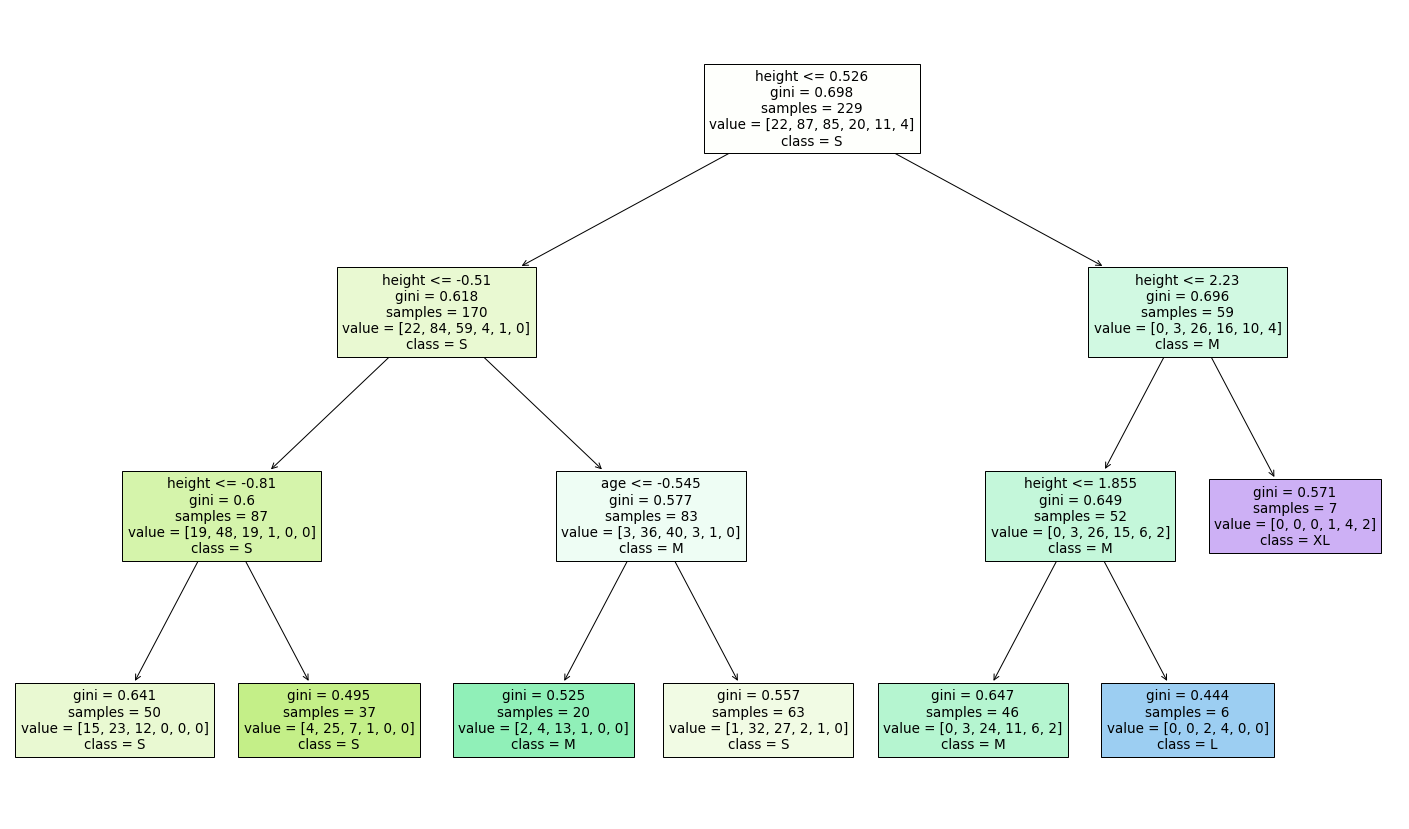

In [91]:
plt.figure(figsize=(25, 15))
plot_tree(best_tree_without_age_feature.named_steps.model, 
          filled=True, 
          class_names=[s_sizes[i] for i in best_tree_without_age_feature.named_steps.model.classes_],
          feature_names=['male', 'female', 'age', 'height', 'weight'])
plt.savefig(r'..\plots\shirt_size_best_tree_without_age_feature.pdf', format='pdf', bbox_inches = "tight")

In [92]:
y_pred = best_tree_without_age_feature.predict(X_test_wa)
y_pred

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 2, 1, 2, 1, 1, 1, 1, 3, 2, 1,
       4, 2, 4, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2], dtype=int64)

In [93]:
y_test_wa.values

array([2, 1, 2, 2, 0, 3, 1, 0, 2, 2, 5, 1, 2, 0, 4, 1, 1, 0, 3, 3, 1, 1,
       5, 3, 3, 2, 0, 1, 2, 2, 0, 3, 3, 0, 2, 1, 4, 0, 2, 1, 1, 1, 2, 1,
       3, 2, 3, 2, 3, 2, 1, 2, 1, 4, 2, 1, 0, 2], dtype=int64)

In [94]:
accuracy_score(y_test_wa, y_pred)

0.3275862068965517

In [95]:
x_axis = np.unique(np.concatenate([y_pred, y_test_wa]))
x_axis = [s_sizes[i] for i in x_axis]
x_axis

['XS', 'S', 'M', 'L', 'XL', 'XXL']

[Text(0, 0.5, 'XS'),
 Text(0, 1.5, 'S'),
 Text(0, 2.5, 'M'),
 Text(0, 3.5, 'L'),
 Text(0, 4.5, 'XL'),
 Text(0, 5.5, 'XXL')]

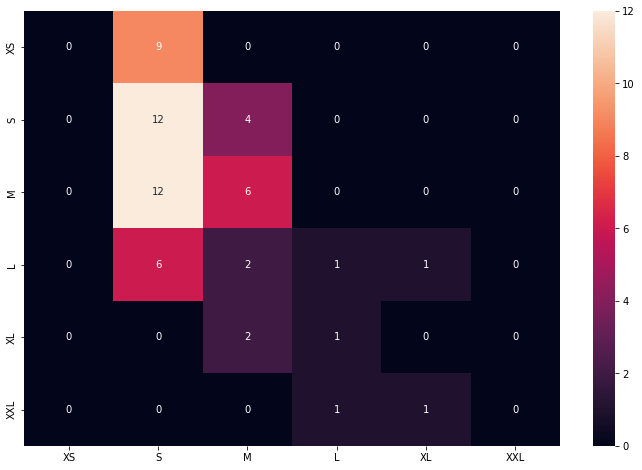

In [96]:
conf_m = confusion_matrix(y_test_wa, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [97]:
best_tree_without_age_feature.fit(X_wa, y_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model',
                 DecisionTreeClassifier(max_depth=3, min_samples_leaf=3,
                                        min_samples_split=29))])

In [98]:
with open('..\models\shirt_size_pred_models\decision_tree_classifier_without_age_feature.pkl', 'wb') as f:
    pickle.dump(best_tree_without_age_feature, f)

Without Sex feature

In [99]:
decision_tree = DecisionTreeClassifier(max_depth=3)
decision_tree.fit(X_train_ws, y_train_ws)

DecisionTreeClassifier(max_depth=3)

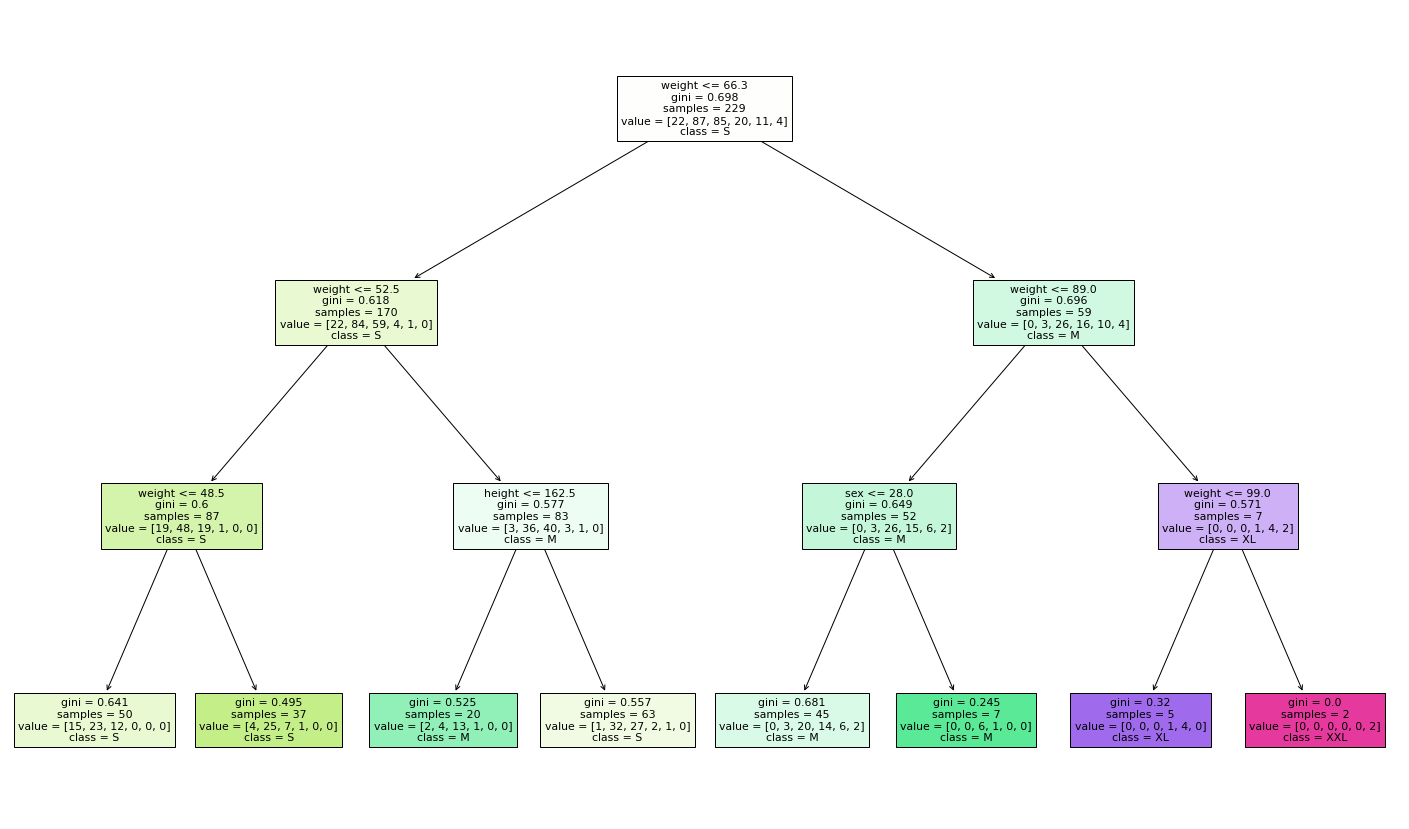

In [100]:
plt.figure(figsize=(25, 15))
plot_tree(decision_tree, 
          class_names=[s_sizes[i] for i in decision_tree.classes_],
          feature_names=X_train_viz.columns,
          filled=True)
plt.savefig(r'..\plots\shirt_size_tree_max_depth_3_without_gender_feature.pdf', format='pdf', bbox_inches = "tight")

In [101]:
param_grid = [
    {
        'model__max_depth': [i for i in range(1, 12)],
        'model__criterion': ['gini', 'entropy'],
        'model__min_samples_split': [i for i in range(2, 40)],
        'model__min_samples_leaf': [i for i in range(1, 25)],   
    }
]

In [102]:
pipeline = Pipeline([('standard_scaler', StandardScaler()),
                     ('model', DecisionTreeClassifier())])

In [103]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train_ws, y_train_ws)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
[CV 1/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=5;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=5;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=5;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=5;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=5;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=5;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_sam

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[CV 5/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=20, model__min_samples_split=25;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=20, model__min_samples_split=25;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=20, model__min_samples_split=25;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=20, model__min_samples_split=25;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=20, model__min_samples_split=25;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=20, model__min_samples_split=25;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=6, model__min_sample

[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=10;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=10;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=10;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=10;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=10;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=6, model__min_samples_split=10;, score=0.435 tota

[CV 3/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=7, model__min_samples_split=34;, score=0.435 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=7, model__min_samples_split=34;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=7, model__min_samples_split=34;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=7, model__min_samples_split=34;, score=0.304 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=7, model__min_samples_split=34;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=7, model__min_samples_split=34;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=7, model__min_samples

[CV 10/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=2, model__min_samples_split=30;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=36;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=36;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=36;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=36;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split=36;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=9, model__min_samples_split

[CV 3/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=5;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=5;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=5;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=5;, score=0.522 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=5;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split=5;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=20, model__min_samples_split

[CV 5/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=12, model__min_samples_split=31;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=12, model__min_samples_split=31;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=12, model__min_samples_split=31;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=12, model__min_samples_split=31;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=12, model__min_samples_split=31;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=12, model__min_samples_split=31;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=13, model__min_samples_split=31;, score=0.

[CV 6/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=33;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=33;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=33;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=33;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=33;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=19;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=1, model__min_samples_split=19

[CV 6/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=19;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=19;, score=0.565 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=19;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=19;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=5, model__min_samples_split=19;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=23;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=23;, score=0.4

[CV 9/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=21, model__min_samples_split=2;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=21, model__min_samples_split=2;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=5, model__min_samples_split=9;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=5, model__min_samples_split=9;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=5, model__min_samples_split=9;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=5, model__min_samples_split=9;, score=0.478 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=5, model__min_samples_split=9;, score

[CV 6/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=19;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=19;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=19;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=19;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=19;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_split=12;, score=0.261 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=5, model__min_samples_

[CV 9/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=16, model__min_samples_split=34;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=16, model__min_samples_split=34;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=1, model__min_samples_split=27;, score=0.261 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=1, model__min_samples_split=27;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=1, model__min_samples_split=27;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=1, model__min_samples_split=27;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=1, model__min_samples_split=27;, score=0

[CV 9/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=2, model__min_samples_split=4;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=2, model__min_samples_split=4;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=17, model__min_samples_split=28;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=17, model__min_samples_split=28;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=17, model__min_samples_split=28;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=17, model__min_samples_split=28;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=17, model__min_samples_sp

[CV 7/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=22;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=22;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=22;, score=0.522 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=22;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=15, model__min_samples_split=25;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=15, model__min_samples_split=25;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=15, model__min_samples_split=25;, score=0.

[CV 10/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=30;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=25;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=25;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=25;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=25;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_split=25;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=8, model__min_samples_spli

[CV 10/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=10, model__min_samples_split=25;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=2;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=2;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=2;, score=0.478 total ti

[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=11;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=29;, score=0.304 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=29;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=29;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=29;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=29;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=29;, score=0.435 to

[CV 3/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=36;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=36;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=36;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=36;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=36;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=36;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=24, model__min_

[CV 5/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=13, model__min_samples_split=22;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=13, model__min_samples_split=22;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=13, model__min_samples_split=22;, score=0.565 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=13, model__min_samples_split=22;, score=0.261 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=13, model__min_samples_split=22;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=13, model__min_samples_split=22;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=12;, score

[CV 6/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=31;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=31;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=31;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=31;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=13, model__min_samples_split=31;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_split=7;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=10, model__min_samples_

[CV 6/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=11, model__min_samples_split=19;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=11, model__min_samples_split=19;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=11, model__min_samples_split=19;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=11, model__min_samples_split=19;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=11, model__min_samples_split=19;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=19, model__min_samples_split=3;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=19, model__min_samples_split=3;, sc

[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=22, model__min_samples_split=38;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=22, model__min_samples_split=38;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=22, model__min_samples_split=38;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=22, model__min_samples_split=38;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=22, model__min_samples_split=38;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=22, model__min_samples_split=38;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=4, model__min_samples

[CV 5/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=20;, score=0.304 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=20;, score=0.304 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=20;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=20;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=20;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=20;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=1, model__min_samples_s

[CV 8/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=38;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=38;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=6, model__min_samples_split=38;, score=0.591 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=8;, score=0.565 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=8;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=8;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=1, model__min_samples_leaf=13, model__min_samples_split=8;, sco

[CV 9/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=6, model__min_samples_split=31;, score=0.348 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=6, model__min_samples_split=31;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=20;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=20;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=20;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=20;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=20, model__min_samples_split=20;, scor

[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=12, model__min_samples_split=33;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=12, model__min_samples_split=33;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=12, model__min_samples_split=33;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=7, model__min_samples_split=21;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=7, model__min_samples_split=21;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=7, model__min_samples_split=21;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=7, model__min_samples_split=21;,

[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=22, model__min_samples_split=13;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=37;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=37;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=37;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=21, model__min_samples_split=37;, score

[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=19, model__min_samples_split=4;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=11, model__min_samples_split=2;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=11, model__min_samples_split=2;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=11, model__min_samples_split=2;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=11, model__min_samples_split=2;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=11, model__min_samples_split=2;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=11, model__min_samples_split=2;, score=0.348 to

[CV 2/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=3, model__min_samples_split=34;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=3, model__min_samples_split=34;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=3, model__min_samples_split=34;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=3, model__min_samples_split=34;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=3, model__min_samples_split=34;, score=0.522 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=3, model__min_samples_split=34;, score=0.565 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=2, model__min_samples_leaf=3, model__min_samples_split=

[CV 10/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=24, model__min_samples_split=19;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=39;, score=0.435 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=39;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=39;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=39;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_split=39;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=12, model__min_samples_s

[CV 3/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=18, model__min_samples_split=38;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=18, model__min_samples_split=38;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=18, model__min_samples_split=38;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=18, model__min_samples_split=38;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=18, model__min_samples_split=38;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=18, model__min_samples_split=38;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=18, model__min_samples_split=38;, score=0.4

[CV 5/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=17, model__min_samples_split=32;, score=0.522 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=17, model__min_samples_split=32;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=17, model__min_samples_split=32;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=17, model__min_samples_split=32;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=17, model__min_samples_split=32;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=17, model__min_samples_split=32;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=23, model__min_samples_split=11;, score=0.

[CV 8/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=17, model__min_samples_split=16;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=17, model__min_samples_split=16;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=17, model__min_samples_split=16;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=14, model__min_samples_split=6;, score=0.304 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=14, model__min_samples_split=6;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=14, model__min_samples_split=6;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=14, model__min_samples_split=6;, score=0.348 

[CV 7/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=15;, score=0.391 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=11, model__min_samples_split=15;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=6, model__min_samples_split=25;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=6, model__min_samples_split=25;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=6, model__min_samples_split=25;,

[CV 10/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=16, model__min_samples_split=39;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=30;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=30;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=30;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=30;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=30;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=21, model__min_samples_split=30;, sc

[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=17, model__min_samples_split=34;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=17, model__min_samples_split=34;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=24, model__min_samples_split=13;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=24, model__min_samples_split=13;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=24, model__min_samples_split=13;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=24, model__min_samples_split=13;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=24, model__min_samples_split=13;, score=

[CV 9/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=17, model__min_samples_split=4;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=17, model__min_samples_split=4;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=19, model__min_samples_split=12;, score=0.435 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=19, model__min_samples_split=12;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=19, model__min_samples_split=12;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=19, model__min_samples_split=12;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=19, model__min_samples_split=

[CV 2/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=7;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=7;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=7;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=7;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=7;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=7;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=20, model__min_samples_split=7;, score=0.391 tota

[CV 5/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=24, model__min_samples_split=18;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=24, model__min_samples_split=18;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=24, model__min_samples_split=18;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=24, model__min_samples_split=18;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=24, model__min_samples_split=18;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=24, model__min_samples_split=18;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=2, model__min_samples

[CV 7/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=12, model__min_samples_split=10;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=12, model__min_samples_split=10;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=12, model__min_samples_split=10;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=12, model__min_samples_split=10;, score=0.318 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=13, model__min_samples_split=18;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=13, model__min_samples_split=18;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=3, model__min_samples_leaf=13, model__min_samples_spl

[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=10, model__min_samples_split=2;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=10, model__min_samples_split=2;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=10, model__min_samples_split=2;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=10, model__min_samples_split=2;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=10, model__min_samples_split=2;, score=0.304 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=10, model__min_samples_split=2;, score=0.565 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=10, model__min_samples_split=2;, score=0.391 tota

[CV 5/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=15;, score=0.609 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=15;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=15;, score=0.609 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=15;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=3, model__min_samples_split=15;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=15, model__min_samples_split=33;, score=0.391 t

[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=35;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=35;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=35;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=12, model__min_samples_split=35;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=22, model__min_samples_split=33;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=22, model__min_samples_split=33;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=22, model__min_samples_split=33;, score=0.

[CV 8/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=13;, score=0.261 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=13;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=13;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=27;, score=0.261 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=27;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=27;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=1, model__min_samples_split=27;, sco

[CV 3/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=24, model__min_samples_split=34;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=24, model__min_samples_split=34;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=24, model__min_samples_split=34;, score=0.348 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=24, model__min_samples_split=34;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=24, model__min_samples_split=34;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=24, model__min_samples_split=34;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=24, model__min_samples

[CV 7/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=13, model__min_samples_split=38;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=13, model__min_samples_split=38;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=13, model__min_samples_split=38;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=13, model__min_samples_split=38;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=23;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=23;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=9, model__min_sample

[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=21;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=1, model__min_samples_split=21;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=17, model__min_samples_split=23;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=17, model__min_samples_split=23;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=17, model__min_samples_split=23;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=17, model__min_samples_split=23;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=17, model__min_samples_s

[CV 9/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=7, model__min_samples_split=36;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=7, model__min_samples_split=36;, score=0.409 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=20;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=20;, score=0.348 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=20;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_split=20;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=9, model__min_samples_spl

[CV 2/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=13, model__min_samples_split=14;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=13, model__min_samples_split=14;, score=0.391 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=13, model__min_samples_split=14;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=13, model__min_samples_split=14;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=13, model__min_samples_split=14;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=13, model__min_samples_split=14;, score=0.435 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=13, model__min_samples

[CV 6/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=31;, score=0.304 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=31;, score=0.565 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=31;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=31;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=8, model__min_samples_split=31;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=7, model__min_samples_split=17;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=7, model__min_samples_leaf=7, model__min_samples_split

[CV 8/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=34;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=34;, score=0.348 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=2, model__min_samples_split=34;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=31;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=31;, score=0.348 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_split=31;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=10, model__min_samples_s

[CV 1/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=30;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=30;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=30;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=30;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=30;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=30;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=14, model__min_samples_split=30;, score=0.5

[CV 5/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=27;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=27;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=27;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=27;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=27;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=15, model__min_samples_split=27;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=4, model__min_samples_leaf=3, model__min_samples_sp

[CV 8/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=7, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=7, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=7, model__min_samples_split=37;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=19, model__min_samples_split=6;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=19, model__min_samples_split=6;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=19, model__min_samples_split=6;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=19, model__min_samples_split=6;, sco

[CV 8/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=16;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=16;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=9, model__min_samples_split=16;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=2;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=2;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=2;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=7, model__min_samples_leaf=23, model__min_samples_split=2;, score=0.391 tot

[CV 1/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=14, model__min_samples_split=37;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=14, model__min_samples_split=37;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=14, model__min_samples_split=37;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=14, model__min_samples_split=37;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=14, model__min_samples_split=37;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=14, model__min_samples_split=37;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=10, model__min_samples_leaf=14, model__min_samples_split=37;, sc

[CV 6/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=14, model__min_samples_split=38;, score=0.522 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=14, model__min_samples_split=38;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=14, model__min_samples_split=38;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=14, model__min_samples_split=38;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=14, model__min_samples_split=38;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split=30;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=20, model__min_samples_split=30;, score=0.

[CV 7/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=17, model__min_samples_split=3;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=17, model__min_samples_split=3;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=17, model__min_samples_split=3;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=17, model__min_samples_split=3;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=11;, score=0.391 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=11;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=24, model__min_samples_split=11;, 

[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=18;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=18;, score=0.348 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=4, model__min_samples_split=18;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=22, model__min_samples_split=31;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=22, model__min_samples_split=31;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=22, model__min_samples_split=31;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=8, model__min_samples_leaf=22, model__min_samples_split=31;, sc

[CV 10/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=24, model__min_samples_split=9;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=17, model__min_samples_split=10;, score=0.522 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=17, model__min_samples_split=10;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=17, model__min_samples_split=10;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=17, model__min_samples_split=10;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=17, model__min_samples_split=10;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=6, model__min_samples_leaf=17, model__min_sample

[CV 2/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=3;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=3;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=3;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=3;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=3;, score=0.435 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=3;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split

[CV 6/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=22;, score=0.391 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=22;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=22;, score=0.304 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=22;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=11, model__min_samples_leaf=4, model__min_samples_split=22;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=7, model__min_samples_split=27;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=9, model__min_samples_leaf=7, model__min_samples_split=27;, scor

[CV 9/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=3, model__min_samples_split=26;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=2, model__min_samples_leaf=3, model__min_samples_split=26;, score=0.500 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=10;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=10;, score=0.565 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=10;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=10;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=8, model__min_samples_leaf=9, model__min_samples_split=10;, 

[CV 1/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=11;, score=0.217 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=11;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=11;, score=0.478 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=11;, score=0.304 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=11;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=5, model__min_samples_split=11;, score=0.304 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=11, model__min_samples_leaf=5, model__min_samples

[CV 3/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=15;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=15;, score=0.391 total time=   0.0s
[CV 6/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=15;, score=0.304 total time=   0.0s
[CV 7/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=15;, score=0.478 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=15;, score=0.348 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=9, model__min_samples

[CV 9/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=15;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=1, model__min_samples_leaf=14, model__min_samples_split=15;, score=0.545 total time=   0.0s
[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=23, model__min_samples_split=35;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=23, model__min_samples_split=35;, score=0.522 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=23, model__min_samples_split=35;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=23, model__min_samples_split=35;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=23, model__min_samples_split=35;, score=0.

[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=13, model__min_samples_split=15;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=13, model__min_samples_split=15;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=17, model__min_samples_split=21;, score=0.435 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=17, model__min_samples_split=21;, score=0.435 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=17, model__min_samples_split=21;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=17, model__min_samples_split=21;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=3, model__min_samples_leaf=17, model__min_samples_spli

[CV 4/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=23, model__min_samples_split=27;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=23, model__min_samples_split=27;, score=0.565 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=23, model__min_samples_split=27;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=23, model__min_samples_split=27;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=23, model__min_samples_split=27;, score=0.391 total time=   0.0s
[CV 9/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=23, model__min_samples_split=27;, score=0.478 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=9, model__min_samples_leaf=23, model__min_samples_split=27;, score=0.

[CV 1/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=8;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=8;, score=0.391 total time=   0.0s
[CV 3/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=8;, score=0.522 total time=   0.0s
[CV 4/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=8;, score=0.348 total time=   0.0s
[CV 5/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=8;, score=0.478 total time=   0.0s
[CV 6/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=8;, score=0.348 total time=   0.0s
[CV 7/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=14, model__min_samples_split=8;, score=0.565 tota

[CV 7/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=23, model__min_samples_split=27;, score=0.522 total time=   0.0s
[CV 8/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=23, model__min_samples_split=27;, score=0.435 total time=   0.0s
[CV 9/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=23, model__min_samples_split=27;, score=0.391 total time=   0.0s
[CV 10/10] END model__criterion=entropy, model__max_depth=5, model__min_samples_leaf=23, model__min_samples_split=27;, score=0.455 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=31;, score=0.478 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_split=31;, score=0.348 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=4, model__min_samples_leaf=7, model__min_samples_s

[CV 9/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=9;, score=0.435 total time=   0.0s
[CV 10/10] END model__criterion=gini, model__max_depth=5, model__min_samples_leaf=17, model__min_samples_split=9;, score=0.364 total time=   0.0s
[CV 1/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=29;, score=0.348 total time=   0.0s
[CV 2/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=29;, score=0.478 total time=   0.0s
[CV 3/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=29;, score=0.565 total time=   0.0s
[CV 4/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=29;, score=0.391 total time=   0.0s
[CV 5/10] END model__criterion=entropy, model__max_depth=10, model__min_samples_leaf=9, model__min_samples_split=

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('standard_scaler',
                                              StandardScaler()),
                                             ('model',
                                              DecisionTreeClassifier())]),
                   n_iter=500,
                   param_distributions=[{'model__criterion': ['gini',
                                                              'entropy'],
                                         'model__max_depth': [1, 2, 3, 4, 5, 6,
                                                              7, 8, 9, 10, 11],
                                         'model__min_samples_leaf': [1, 2, 3, 4,
                                                                     5, 6, 7, 8,
                                                                     9, 10, 11,
                                                                     12, 13, 14,
                                                        

In [104]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
277       0.004912      0.000667         0.001662        0.000461   
83        0.004935      0.000583         0.001692        0.000502   
499       0.004786      0.000593         0.001805        0.000464   
468       0.005137      0.000868         0.001831        0.000707   
117       0.004565      0.000469         0.001884        0.000611   

    param_model__min_samples_split param_model__min_samples_leaf  \
277                             15                             6   
83                              10                             5   
499                             25                             3   
468                             39                             3   
117                             33                             2   

    param_model__max_depth param_model__criterion  \
277                      4                   gini   
83                       4                   gini   
499                      2                   gini   
468                      5                   gini   
117                      2                   gini   

                                                params  split0_test_score  \
277  {'model__min_samples_split': 15, 'model__min_s...           0.347826   
83   {'model__min_samples_split': 10, 'model__min_s...           0.304348   
499  {'model__min_samples_split': 25, 'model__min_s...           0.347826   
468  {'model__min_samples_split': 39, 'model__min_s...           0.304348   
117  {'model__min_samples_split': 33, 'model__min_s...           0.347826   

     ...  split3_test_score  split4_test_score  split5_test_score  \
277  ...           0.391304           0.652174           0.478261   
83   ...           0.391304           0.652174           0.478261   
499  ...           0.391304           0.565217           0.521739   
468  ...           0.391304           0.652174           0.521739   
117  ...           0.391304           0.565217           0.521739   

     split6_test_score  split7_test_score  split8_test_score  \
277           0.521739           0.434783           0.521739   
83            0.565217           0.434783           0.478261   
499           0.565217           0.434783           0.434783   
468           0.565217           0.434783           0.478261   
117           0.565217           0.434783           0.434783   

     split9_test_score  mean_test_score  std_test_score  rank_test_score  
277                0.5         0.489130        0.082063                1  
83                 0.5         0.484783        0.092257                2  
499                0.5         0.484783        0.074073                3  
468                0.5         0.484783        0.094284                3  
117                0.5         0.484783        0.074073                3  

[5 rows x 22 columns]

In [105]:
best_tree_without_gender_feature = rand_search.best_estimator_
best_tree_without_gender_feature.fit(X_train_ws, y_train_ws)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=6,
                                        min_samples_split=15))])

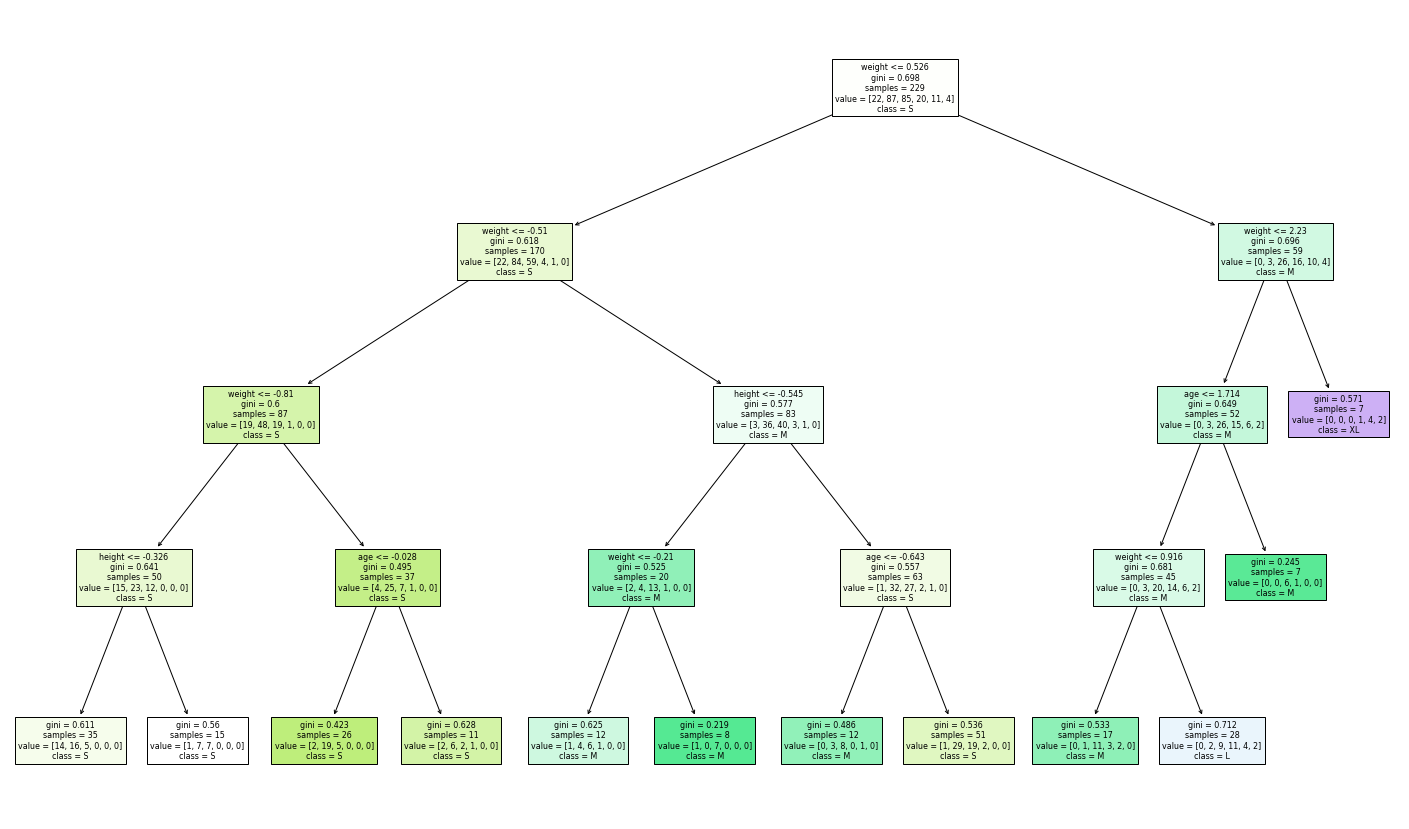

In [106]:
plt.figure(figsize=(25, 15))
plot_tree(best_tree_without_gender_feature.named_steps.model, 
          filled=True, 
          class_names=[s_sizes[i] for i in best_tree_without_gender_feature.named_steps.model.classes_],
          feature_names=['age', 'height', 'weight'])
plt.savefig(r'..\plots\shirt_size_best_tree_without_gender_feature.pdf', format='pdf', bbox_inches = "tight")

In [107]:
y_pred = best_tree_without_gender_feature.predict(X_test_ws)
y_pred

array([1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 2, 2, 1, 3, 1, 1, 1, 1, 3, 2, 1,
       4, 2, 4, 3, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 2, 1, 2], dtype=int64)

In [108]:
y_test_ws.values

array([2, 1, 2, 2, 0, 3, 1, 0, 2, 2, 5, 1, 2, 0, 4, 1, 1, 0, 3, 3, 1, 1,
       5, 3, 3, 2, 0, 1, 2, 2, 0, 3, 3, 0, 2, 1, 4, 0, 2, 1, 1, 1, 2, 1,
       3, 2, 3, 2, 3, 2, 1, 2, 1, 4, 2, 1, 0, 2], dtype=int64)

In [109]:
accuracy_score(y_test_ws, y_pred)

0.3103448275862069

In [110]:
x_axis = np.unique(np.concatenate([y_pred, y_test_ws]))
x_axis = [s_sizes[i] for i in x_axis]
x_axis

['XS', 'S', 'M', 'L', 'XL', 'XXL']

[Text(0, 0.5, 'XS'),
 Text(0, 1.5, 'S'),
 Text(0, 2.5, 'M'),
 Text(0, 3.5, 'L'),
 Text(0, 4.5, 'XL'),
 Text(0, 5.5, 'XXL')]

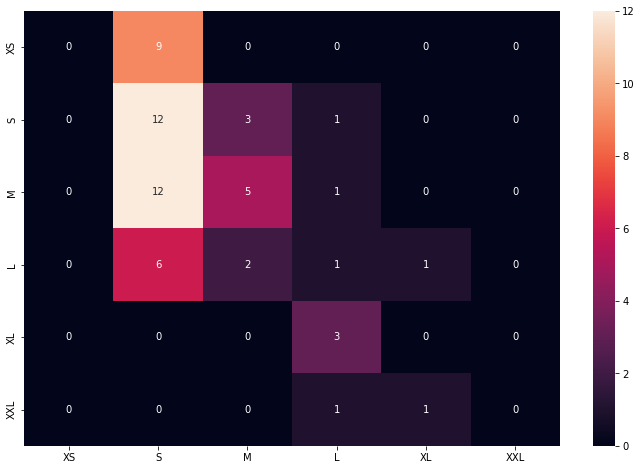

In [111]:
conf_m = confusion_matrix(y_test_ws, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [112]:
best_tree_without_gender_feature.fit(X_ws, y_ws)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('model',
                 DecisionTreeClassifier(max_depth=4, min_samples_leaf=6,
                                        min_samples_split=15))])

In [113]:
with open('..\models\shirt_size_pred_models\decision_tree_classifier_without_gender_feature.pkl', 'wb') as f:
    pickle.dump(best_tree_without_gender_feature, f)

Decision Tree results.
<br>
with all features = 49.0% accuracy score, std = 7% 
<br>
without age feature = 48.2% accuracy score, std = 5%
<br>
without sex seature = 50.0% accuracy score, std = 10%

# SVM

In [114]:
from sklearn.svm import SVC

In [115]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['age', 'height', 'weight'])])

In [116]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', SVC())])

In [117]:
param_grid = [
    {
        'model__C': [i for i in range(1, 100, 2)], 
        'model__kernel': ['rbf'],
        'model__gamma': ['scale', 'auto', 0.05, 0.1, 0.15, 0.25],
        'model__coef0': [i for i in range(0, 20, 2)],
        'model__probability': [True]
        
    }
]

In [118]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train, y_train)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
[CV 1/10] END model__C=63, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=63, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=63, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[CV 4/10] END model__C=63, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=63, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=63, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=63, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=63, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=63, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=63, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=9, model__

[CV 5/10] END model__C=35, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=35, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=35, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=35, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=35, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=35, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=75, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=75, m

[CV 9/10] END model__C=53, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=53, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=25, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=25, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=25, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=25, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=25, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=25, model_

[CV 2/10] END model__C=77, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=77, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=77, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=77, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=77, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=77, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=77, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=77, 

[CV 5/10] END model__C=3, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=3, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=3, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=3, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 9/10] END model__C=3, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=3, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.591 total time=   0.0s
[CV 1/10] END model__C=7, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.652 total time=   0.0s
[CV 2/10] END model__C=7, model__

[CV 5/10] END model__C=83, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=83, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=83, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=83, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=83, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=83, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=47, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=47, model

[CV 5/10] END model__C=67, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=67, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=67, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=67, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=67, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 10/10] END model__C=67, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=29, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=29, model_

[CV 7/10] END model__C=5, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=5, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=5, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=5, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=77, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=77, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=77, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=77, model__coef0=8

[CV 7/10] END model__C=73, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=73, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=73, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 10/10] END model__C=73, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=5, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=5, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=5, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=5, model__

[CV 8/10] END model__C=63, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=63, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=63, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=1, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 2/10] END model__C=1, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=1, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=1, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=1, mode

[CV 10/10] END model__C=95, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=93, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=93, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=93, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=93, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=93, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=93, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=93, 

[CV 2/10] END model__C=93, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=93, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=93, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=93, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=93, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=93, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=93, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=93, 

[CV 5/10] END model__C=5, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=5, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=5, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=5, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=5, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=5, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=69, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=69, mode

[CV 7/10] END model__C=77, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=77, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=77, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=77, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=17, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 2/10] END model__C=17, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=17, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=17,

[CV 10/10] END model__C=87, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=7, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 2/10] END model__C=7, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=7, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=7, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=7, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=7, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=7, model__coef0

[CV 1/10] END model__C=65, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=65, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=65, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=65, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=65, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=65, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=65, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=65, model__

[CV 1/10] END model__C=67, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=67, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=67, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=67, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=67, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=67, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=67, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=67, 

[CV 1/10] END model__C=47, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=47, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=47, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=47, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=47, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=47, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=47, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=47, 

[CV 3/10] END model__C=93, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=93, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=93, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=93, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=93, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=93, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 9/10] END model__C=93, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=93, model_

[CV 3/10] END model__C=73, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=73, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=73, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=73, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=73, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=73, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=73, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=73, model_

[CV 3/10] END model__C=35, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=35, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=35, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=35, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=35, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=35, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=35, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 10/10] END model__C=35, model_

[CV 4/10] END model__C=79, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=79, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=79, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=79, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=79, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=79, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=79, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=13, model_

[CV 4/10] END model__C=75, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=75, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=75, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=75, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=75, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=75, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=75, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model

[CV 6/10] END model__C=69, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=69, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=69, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=69, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=69, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=33, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=33, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=33, mode

[CV 8/10] END model__C=93, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 9/10] END model__C=93, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=93, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=59, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=59, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=59, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=59, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=59, mod

[CV 9/10] END model__C=11, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=11, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=35, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=35, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=35, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=35, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=35, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=35, m

[CV 9/10] END model__C=53, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=53, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=65, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=65, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=65, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=65, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=65, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=6

[CV 2/10] END model__C=87, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=87, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=87, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=87, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=87, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=87, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=87, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=87, model__coef0=2

[CV 4/10] END model__C=21, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=21, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=21, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=21, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=21, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=21, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 10/10] END model__C=21, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=83,

[CV 6/10] END model__C=61, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=61, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=61, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=61, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=61, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=21, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=21, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=21, mo

[CV 8/10] END model__C=49, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=49, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=49, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=91, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=91, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=91, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=91, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=91, mo

[CV 9/10] END model__C=23, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 10/10] END model__C=23, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=41, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=41, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=41, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=41, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=41, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=41, model__coef

[CV 1/10] END model__C=27, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=27, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=27, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=27, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=27, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=27, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=27, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=27, 

[CV 3/10] END model__C=51, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=51, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=51, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=51, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=51, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=51, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=51, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=51,

[CV 6/10] END model__C=69, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=69, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=69, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=69, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 10/10] END model__C=69, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=33, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=33, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=33, mode

[CV 6/10] END model__C=85, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=85, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=85, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=85, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=85, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=5, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.652 total time=   0.0s
[CV 2/10] END model__C=5, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=5, model__

[CV 6/10] END model__C=11, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=11, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=11, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=11, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=11, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=15, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=15, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=15, mo

[CV 8/10] END model__C=87, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 9/10] END model__C=87, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=87, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=55, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=55, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=55, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=55, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=55,

[CV 10/10] END model__C=97, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=17, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=17, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=17, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=17, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=17, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=17, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=17, model_

[CV 1/10] END model__C=33, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=33, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=33, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=33, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=33, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=33, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=33, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=33, model__

[CV 10/10] END model__C=89, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=7, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=7, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=7, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=7, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=7, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=7, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=7, model__

[CV 10/10] END model__C=99, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=81, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=81, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=81, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=81, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=81, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=81, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=81, 

[CV 1/10] END model__C=43, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=43, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=43, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=43, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=43, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=43, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=43, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=43, model__coef0=4

[CV 4/10] END model__C=23, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=23, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=23, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=23, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=23, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=23, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=23, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=87,

[CV 6/10] END model__C=53, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=53, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=53, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=53, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 10/10] END model__C=53, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=39, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=39, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=39, mode

[CV 6/10] END model__C=83, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=83, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=83, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=83, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 10/10] END model__C=83, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=25, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=25, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=25, model_

[CV 7/10] END model__C=87, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=87, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=87, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=87, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=51, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=51, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=51, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=51,

[CV 6/10] END model__C=63, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=63, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=63, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=63, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=63, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=89, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=89, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__

[CV 6/10] END model__C=41, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=41, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=41, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=41, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=41, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=73, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=73, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=73, model_

[CV 6/10] END model__C=83, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=83, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=83, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=83, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=83, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=61, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=61, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=61,

[CV 9/10] END model__C=87, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=87, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=95, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=95, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=95, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=95, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=95, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=95, model__coef

[CV 1/10] END model__C=69, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=69, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=69, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=69, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=69, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=69, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=69, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=69, 

[CV 10/10] END model__C=73, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=81, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=81, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=81, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=81, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=81, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=81, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=81,

[CV 1/10] END model__C=89, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=89, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=89, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=89, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=89, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=89, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=89, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=89, model__

[CV 5/10] END model__C=91, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=91, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=91, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=91, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=91, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=91, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=39, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=39, model_

[CV 6/10] END model__C=65, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=65, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=65, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=65, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=65, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=27, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=27, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=27, mo

[CV 9/10] END model__C=59, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=59, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=45, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=45, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=45, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=45, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=45, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=45, m

[CV 3/10] END model__C=45, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=45, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=45, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=45, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=45, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=45, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=45, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 10/10] END model__C=45, model_

[CV 3/10] END model__C=51, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=51, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=51, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=51, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=51, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=51, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=51, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=51, model_

[CV 3/10] END model__C=61, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=61, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=61, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=61, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=61, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=61, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 9/10] END model__C=61, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=61, model_

[CV 4/10] END model__C=71, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=71, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=71, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=71, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=71, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=71, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 10/10] END model__C=71, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=3, model__

[CV 7/10] END model__C=67, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=67, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=67, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 10/10] END model__C=67, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=67, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=67, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=67, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=67, mod

[CV 10/10] END model__C=69, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=85, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=85, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=85, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=85, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=85, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=85, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model_

[CV 4/10] END model__C=53, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=53, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=53, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=53, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=53, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=53, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 10/10] END model__C=53, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=53, model__coef0=

[CV 6/10] END model__C=51, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=51, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=51, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=51, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=51, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=55, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=55, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=55, m

[CV 9/10] END model__C=9, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 10/10] END model__C=9, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=55, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=55, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=55, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=55, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=55, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=55, model__c

[CV 2/10] END model__C=93, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=93, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=93, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=93, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=93, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=93, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=93, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=93, model__

[CV 5/10] END model__C=45, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=45, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=45, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=45, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=45, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=45, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=99, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=99, 

[CV 5/10] END model__C=63, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=63, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=63, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=63, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=63, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=63, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=13, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=13, model

[CV 7/10] END model__C=33, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=33, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=33, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=33, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=69, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=69, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=69, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=69,

[CV 9/10] END model__C=87, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=87, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=79, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=79, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=79, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=79, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=79, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=79, mode

[CV 2/10] END model__C=87, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=87, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=87, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=87, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=87, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=87, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=87, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=87, model__

[CV 3/10] END model__C=87, model__coef0=18, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=87, model__coef0=18, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=87, model__coef0=18, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=87, model__coef0=18, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=87, model__coef0=18, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=87, model__coef0=18, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=87, model__coef0=18, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=87,

[CV 5/10] END model__C=69, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=69, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=69, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=69, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=69, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=69, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=85, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=85, 

[CV 5/10] END model__C=63, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=63, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=63, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=63, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=63, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=63, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=23, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=23, model

[CV 8/10] END model__C=89, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 9/10] END model__C=89, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=89, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=51, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=51, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=51, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=51, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=51, model__

[CV 9/10] END model__C=43, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=43, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=57, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=57, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=57, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=57, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=57, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=57, m

[CV 1/10] END model__C=87, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=87, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=87, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=87, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=87, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=87, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=87, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=87, 

[CV 4/10] END model__C=9, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=9, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 6/10] END model__C=9, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=9, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=9, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=9, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=9, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=17, model_

[CV 7/10] END model__C=45, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 8/10] END model__C=45, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=45, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 10/10] END model__C=45, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=13, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=13, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=13, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=13,

[CV 7/10] END model__C=13, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=13, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=13, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=13, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=67, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=67, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=67, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=67, model__coef0=

[CV 7/10] END model__C=33, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=33, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=33, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=33, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=1, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 2/10] END model__C=1, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=1, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=1, mod

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['age',
                                                                                'height',
                                                                                'weight'])])),
                                             ('model', SVC())]),
                   n_iter=500,
                   param_distributions=[{'model__C': [1, 3, 5, 7, 9

In [119]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
43        0.034975      0.003121         0.005266        0.000952   
2         0.036604      0.003350         0.005317        0.001017   
115       0.033646      0.001758         0.005196        0.000565   
47        0.035580      0.003561         0.005241        0.000800   
56        0.039407      0.007484         0.005717        0.001112   

    param_model__probability param_model__kernel param_model__gamma  \
43                      True                 rbf                0.1   
2                       True                 rbf                0.1   
115                     True                 rbf                0.1   
47                      True                 rbf               0.25   
56                      True                 rbf               0.25   

    param_model__coef0 param_model__C  \
43                   2              5   
2                    4              3   
115                  6              3   
47                   6              1   
56                  18              1   

                                                params  ...  \
43   {'model__probability': True, 'model__kernel': ...  ...   
2    {'model__probability': True, 'model__kernel': ...  ...   
115  {'model__probability': True, 'model__kernel': ...  ...   
47   {'model__probability': True, 'model__kernel': ...  ...   
56   {'model__probability': True, 'model__kernel': ...  ...   

     split3_test_score  split4_test_score  split5_test_score  \
43            0.521739           0.347826           0.478261   
2             0.521739           0.347826           0.521739   
115           0.521739           0.347826           0.521739   
47            0.521739           0.347826           0.521739   
56            0.521739           0.347826           0.521739   

     split6_test_score  split7_test_score  split8_test_score  \
43            0.608696           0.521739           0.391304   
2             0.608696           0.478261           0.391304   
115           0.608696           0.478261           0.391304   
47            0.652174           0.478261           0.391304   
56            0.652174           0.478261           0.391304   

     split9_test_score  mean_test_score  std_test_score  rank_test_score  
43            0.545455         0.498024        0.088382                1  
2             0.545455         0.493676        0.090296                2  
115           0.545455         0.493676        0.090296                2  
47            0.500000         0.493478        0.086984                4  
56            0.500000         0.493478        0.086984                4  

[5 rows x 23 columns]

In [120]:
best_svc = rand_search.best_estimator_
best_svc.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model', SVC(C=5, coef0=2, gamma=0.1, probability=True))])

In [121]:
y_pred = best_svc.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 4, 2, 1,
       4, 1, 4, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 3, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 2, 2, 1, 2, 1, 1, 3, 1, 2, 1, 2], dtype=int64)

In [122]:
y_test.values

array([2, 1, 2, 2, 0, 3, 1, 0, 2, 2, 5, 1, 2, 0, 4, 1, 1, 0, 3, 3, 1, 1,
       5, 3, 3, 2, 0, 1, 2, 2, 0, 3, 3, 0, 2, 1, 4, 0, 2, 1, 1, 1, 2, 1,
       3, 2, 3, 2, 3, 2, 1, 2, 1, 4, 2, 1, 0, 2], dtype=int64)

In [123]:
accuracy_score(y_test, y_pred)

0.3103448275862069

In [124]:
x_axis = np.unique(np.concatenate([y_pred, y_test]))
x_axisx_axis = [s_sizes[i] for i in x_axis]
x_axis

array([0, 1, 2, 3, 4, 5], dtype=int64)

[Text(0, 0.5, '0'),
 Text(0, 1.5, '1'),
 Text(0, 2.5, '2'),
 Text(0, 3.5, '3'),
 Text(0, 4.5, '4'),
 Text(0, 5.5, '5')]

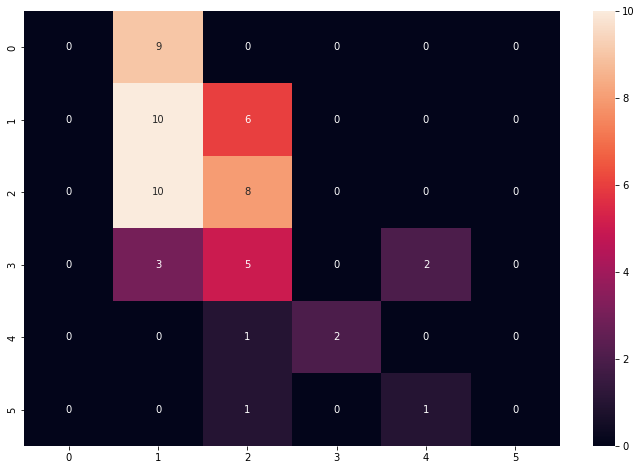

In [125]:
conf_m = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [126]:
best_svc.fit(X, y)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model', SVC(C=5, coef0=2, gamma=0.1, probability=True))])

In [127]:
with open('..\models\shirt_size_pred_models\svc.pkl', 'wb') as f:
    pickle.dump(best_svc, f)

Without Age feature

In [128]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['height', 'weight']),])

In [129]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', SVC())])

In [130]:
param_grid = [
    {
        'model__C': [i for i in range(1, 100, 2)], 
        'model__kernel': ['rbf'],
        'model__gamma': ['scale', 'auto', 0.05, 0.1, 0.15, 0.25, 1, 10],
        'model__coef0': [i for i in range(0, 20, 2)],
        'model__probability': [True]
        
    }
]

In [131]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train_wa, y_train_wa)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
[CV 1/10] END model__C=65, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=65, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=65, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[CV 4/10] END model__C=65, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=65, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 6/10] END model__C=65, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=65, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 8/10] END model__C=65, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=65, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=65, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=15, model_

[CV 6/10] END model__C=81, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=81, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=81, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=81, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=81, model__coef0=16, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=67, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=67, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=67, model__

[CV 9/10] END model__C=79, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=79, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=79, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 2/10] END model__C=79, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 3/10] END model__C=79, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=79, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=79, model__coef0=10, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 6/10] END model__C=79, model__co

[CV 3/10] END model__C=59, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=59, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=59, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 6/10] END model__C=59, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=59, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=59, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=59, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=59, model__coef0=

[CV 6/10] END model__C=7, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=7, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=7, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=7, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=7, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.591 total time=   0.0s
[CV 1/10] END model__C=69, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=69, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=69, model__coef0

[CV 6/10] END model__C=73, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=73, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=73, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=73, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=73, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=55, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=55, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=55, model_

[CV 8/10] END model__C=35, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=35, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=35, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.591 total time=   0.0s
[CV 1/10] END model__C=81, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 2/10] END model__C=81, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 3/10] END model__C=81, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=81, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=81, model__coe

[CV 10/10] END model__C=25, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=35, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=35, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 3/10] END model__C=35, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=35, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=35, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 6/10] END model__C=35, model__coef0=8, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=35, model__coef0=8, mode

[CV 3/10] END model__C=99, model__coef0=18, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 4/10] END model__C=99, model__coef0=18, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=99, model__coef0=18, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=99, model__coef0=18, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=99, model__coef0=18, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=99, model__coef0=18, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=99, model__coef0=18, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=99, model__coef0=18, mod

[CV 7/10] END model__C=89, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=89, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=89, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=89, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=41, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=41, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=41, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 4/10] END model__C=41, model__coef0=16, m

[CV 8/10] END model__C=19, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=19, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=19, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=85, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 2/10] END model__C=85, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 3/10] END model__C=85, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=85, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=85, model__coef0=18, mo

[CV 9/10] END model__C=35, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=35, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=55, model__coef0=14, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 2/10] END model__C=55, model__coef0=14, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=55, model__coef0=14, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 4/10] END model__C=55, model__coef0=14, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=55, model__coef0=14, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=55, model__coef0=14,

[CV 10/10] END model__C=67, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=91, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 2/10] END model__C=91, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 3/10] END model__C=91, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=91, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=91, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 6/10] END model__C=91, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=91, model__coef0=0, mod

[CV 10/10] END model__C=19, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=85, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=85, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=85, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=85, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=85, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=85, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=85, model_

[CV 10/10] END model__C=67, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=61, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=61, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=61, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 4/10] END model__C=61, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=61, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=61, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=61, mo

[CV 10/10] END model__C=65, model__coef0=10, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=67, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=67, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=67, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 4/10] END model__C=67, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=67, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=67, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=67, model__coef0=16, 

[CV 10/10] END model__C=89, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=61, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=61, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=61, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 4/10] END model__C=61, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=61, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 6/10] END model__C=61, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__

[CV 1/10] END model__C=33, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=33, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=33, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 4/10] END model__C=33, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=33, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=33, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=33, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=33, model__

[CV 4/10] END model__C=3, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=3, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=3, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=3, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=3, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=3, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=3, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=85, model_

[CV 4/10] END model__C=17, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=17, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 6/10] END model__C=17, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=17, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=17, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=17, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=17, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=79, model__coef0=8, mode

[CV 6/10] END model__C=43, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=43, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=43, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=43, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=43, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=1, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 2/10] END model__C=1, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=1, mode

[CV 9/10] END model__C=59, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=59, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=49, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=49, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=49, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 4/10] END model__C=49, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=49, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=49, model__c

[CV 1/10] END model__C=59, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=59, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=59, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 4/10] END model__C=59, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=59, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=59, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=59, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=59, model__

[CV 4/10] END model__C=61, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=61, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=61, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=61, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=61, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=61, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=61, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=17, model__coef0=4, model__gamm

[CV 4/10] END model__C=73, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=73, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=73, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=73, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=73, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=73, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=73, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=7, model__coef0=1

[CV 7/10] END model__C=93, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=93, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=93, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=93, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=51, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=51, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=51, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 4/10] END model__C=51, model__coef0

[CV 9/10] END model__C=45, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=45, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=31, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=31, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 3/10] END model__C=31, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 4/10] END model__C=31, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=31, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=31, model__c

[CV 10/10] END model__C=67, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=33, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=33, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 3/10] END model__C=33, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=33, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=33, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 6/10] END model__C=33, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=33, model__coef0=6, m

[CV 1/10] END model__C=95, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=95, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=95, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 4/10] END model__C=95, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=95, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 6/10] END model__C=95, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=95, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=95, model__

[CV 2/10] END model__C=97, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=97, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 4/10] END model__C=97, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=97, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 6/10] END model__C=97, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=97, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=97, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=97, model__

[CV 2/10] END model__C=99, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=99, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 4/10] END model__C=99, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=99, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=99, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=99, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=99, model__coef0=10, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=99, model__

[CV 2/10] END model__C=41, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=41, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 4/10] END model__C=41, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=41, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 6/10] END model__C=41, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=41, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=41, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=41, 

[CV 3/10] END model__C=37, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 4/10] END model__C=37, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=37, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=37, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=37, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=37, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=37, model__coef0=10, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=37,

[CV 5/10] END model__C=83, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=83, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=83, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=83, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=83, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=83, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=87, model__coef0=6, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 2/10] END model__C=

[CV 5/10] END model__C=21, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=21, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=21, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=21, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=21, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=21, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=35, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=35, 

[CV 6/10] END model__C=25, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=25, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=25, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=25, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=25, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=11, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.652 total time=   0.0s
[CV 2/10] END model__C=11, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=11, model__coef0=12, mo

[CV 7/10] END model__C=29, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=29, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=29, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=29, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=89, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=89, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=89, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=89, model_

[CV 9/10] END model__C=73, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=73, model__coef0=2, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=3, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=3, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=3, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 4/10] END model__C=3, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=3, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=3, model__

[CV 1/10] END model__C=97, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=97, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=97, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 4/10] END model__C=97, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=97, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 6/10] END model__C=97, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=97, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=97, 

[CV 3/10] END model__C=19, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=19, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=19, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 6/10] END model__C=19, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=19, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=19, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=19, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=19, model__coef0=

[CV 4/10] END model__C=83, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=83, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 6/10] END model__C=83, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=83, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=83, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 9/10] END model__C=83, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=83, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=67, model__coef0=

[CV 4/10] END model__C=25, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=25, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=25, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=25, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=25, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=25, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=25, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=95, model_

[CV 7/10] END model__C=51, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=51, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=51, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=51, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=15, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=15, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=15, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 4/10] END model__C

[CV 1/10] END model__C=77, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=77, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=77, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 4/10] END model__C=77, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=77, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=77, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=77, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=77, model__coef0=0, model__gamma

[CV 3/10] END model__C=83, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=83, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=83, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=83, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=83, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.652 total time=   0.0s
[CV 8/10] END model__C=83, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=83, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=83, model_

[CV 4/10] END model__C=65, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=65, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=65, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=65, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=65, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=65, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=65, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=59, model_

[CV 4/10] END model__C=73, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=73, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 6/10] END model__C=73, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=73, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=73, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=73, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=73, model__coef0=2, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=19, model__coef0=2, mode

[CV 5/10] END model__C=49, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 6/10] END model__C=49, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=49, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=49, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=49, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=49, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=89, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=89,

[CV 6/10] END model__C=53, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=53, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=53, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=53, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=53, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=49, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=49, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=49, model__co

[CV 7/10] END model__C=75, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 8/10] END model__C=75, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=75, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=75, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=19, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=19, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=19, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 4/10] END model__C=19,

[CV 7/10] END model__C=3, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=3, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=3, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=3, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=3, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=3, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=3, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=3, model__coef0=0

[CV 7/10] END model__C=25, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=25, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=25, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=25, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=93, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=93, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=93, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 4/10] END model__C=93, model__coef0=

[CV 10/10] END model__C=57, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=83, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 2/10] END model__C=83, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 3/10] END model__C=83, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=83, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=83, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 6/10] END model__C=83, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=83, model__coef0=0, mode

[CV 3/10] END model__C=81, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 4/10] END model__C=81, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=81, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=81, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=81, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=81, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=81, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=81,

[CV 7/10] END model__C=71, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 8/10] END model__C=71, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=71, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=71, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=23, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=23, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=23, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=23, model_

[CV 9/10] END model__C=13, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=13, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=7, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=7, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=7, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 4/10] END model__C=7, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=7, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=7, model__coef0=

[CV 1/10] END model__C=13, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=13, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=13, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 4/10] END model__C=13, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=13, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=13, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=13, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=13, model__coef0=0

[CV 4/10] END model__C=45, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=45, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=45, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=45, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=45, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=45, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=45, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=13, model_

[CV 6/10] END model__C=5, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=5, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=5, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=5, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=5, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=67, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=67, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=67, model__coef0=14, model

[CV 9/10] END model__C=9, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=9, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=53, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=53, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=53, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 4/10] END model__C=53, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=53, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 6/10] END model__C=53, model_

[CV 9/10] END model__C=45, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=45, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=55, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=55, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=55, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 4/10] END model__C=55, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=55, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=55, model__co

[CV 10/10] END model__C=53, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=99, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=99, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.1s
[CV 3/10] END model__C=99, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 4/10] END model__C=99, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=99, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 6/10] END model__C=99, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=99, model__co

[CV 3/10] END model__C=33, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 4/10] END model__C=33, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=33, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 6/10] END model__C=33, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=33, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=33, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=33, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model

[CV 6/10] END model__C=85, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=85, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=85, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=85, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=85, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=13, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=13, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=13, model__coef0=0, m

[CV 6/10] END model__C=93, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=93, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=93, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=93, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=93, model__coef0=2, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=41, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=41, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=41, model__co

[CV 9/10] END model__C=91, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=91, model__coef0=12, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=19, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=19, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=19, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 4/10] END model__C=19, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=19, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=19, mo

[CV 2/10] END model__C=65, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 3/10] END model__C=65, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=65, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=65, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 6/10] END model__C=65, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=65, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=65, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 9/10] END model__C=65, model__coef0=4, model

[CV 5/10] END model__C=41, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=41, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=41, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=41, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=41, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=41, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=85, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=85, model_

[CV 9/10] END model__C=53, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=53, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=53, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=53, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=53, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 4/10] END model__C=53, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=53, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=53,

[CV 9/10] END model__C=83, model__coef0=6, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=83, model__coef0=6, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=47, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=47, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=47, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 4/10] END model__C=47, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=47, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 6/10] END model__C=47, model__

[CV 2/10] END model__C=63, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=63, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 4/10] END model__C=63, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=63, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 6/10] END model__C=63, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=63, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=63, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=63, 

[CV 4/10] END model__C=45, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=45, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 6/10] END model__C=45, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=45, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=45, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=45, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=45, model__coef0=14, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=87,

[CV 6/10] END model__C=9, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=9, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 8/10] END model__C=9, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=9, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=9, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=77, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=77, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=77, model__co

[CV 9/10] END model__C=45, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=45, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=69, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=69, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=69, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 4/10] END model__C=69, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=69, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=69, model_

[CV 9/10] END model__C=9, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=9, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=17, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 2/10] END model__C=17, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=17, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 4/10] END model__C=17, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=17, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=17, model__coef0=0, model__ga

[CV 10/10] END model__C=39, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.591 total time=   0.0s
[CV 1/10] END model__C=31, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=31, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=31, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 4/10] END model__C=31, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=31, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=31, model__coef0=0, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=31, model

[CV 3/10] END model__C=69, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 4/10] END model__C=69, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=69, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 6/10] END model__C=69, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=69, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=69, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=69, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model

[CV 3/10] END model__C=99, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=99, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=99, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=99, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=99, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=99, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=99, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=99,

[CV 7/10] END model__C=43, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=43, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=43, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=43, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=27, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=27, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=27, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 4/10] END model__C=27, model__coe

[CV 9/10] END model__C=79, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=79, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=43, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=43, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 3/10] END model__C=43, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=43, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=43, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 6/10] END model__C=43, model__coef0=4

[CV 4/10] END model__C=3, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=3, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=3, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=3, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 8/10] END model__C=3, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=3, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=3, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=17, model__coef0=

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['height',
                                                                                'weight'])])),
                                             ('model', SVC())]),
                   n_iter=500,
                   param_distributions=[{'model__C': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25,

In [132]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
333       0.033801      0.002315         0.005017        0.000725   
464       0.033093      0.003236         0.004794        0.000402   
37        0.041418      0.004733         0.005496        0.001027   
94        0.035568      0.002769         0.005312        0.000878   
339       0.031196      0.001516         0.004911        0.000293   

    param_model__probability param_model__kernel param_model__gamma  \
333                     True                 rbf               0.05   
464                     True                 rbf                0.1   
37                      True                 rbf               0.05   
94                      True                 rbf               0.05   
339                     True                 rbf                0.1   

    param_model__coef0 param_model__C  \
333                  6             23   
464                  0              9   
37                   2             35   
94                   6             25   
339                  6              7   

                                                params  ...  \
333  {'model__probability': True, 'model__kernel': ...  ...   
464  {'model__probability': True, 'model__kernel': ...  ...   
37   {'model__probability': True, 'model__kernel': ...  ...   
94   {'model__probability': True, 'model__kernel': ...  ...   
339  {'model__probability': True, 'model__kernel': ...  ...   

     split3_test_score  split4_test_score  split5_test_score  \
333           0.434783           0.434783           0.434783   
464           0.434783           0.434783           0.434783   
37            0.478261           0.434783           0.391304   
94            0.434783           0.434783           0.434783   
339           0.434783           0.434783           0.434783   

     split6_test_score  split7_test_score  split8_test_score  \
333           0.565217           0.478261           0.434783   
464           0.565217           0.478261           0.391304   
37            0.565217           0.478261           0.391304   
94            0.565217           0.478261           0.391304   
339           0.565217           0.478261           0.391304   

     split9_test_score  mean_test_score  std_test_score  rank_test_score  
333           0.590909         0.489526        0.058399                1  
464           0.590909         0.489526        0.064550                1  
37            0.590909         0.489526        0.067414                1  
94            0.590909         0.489526        0.064550                1  
339           0.590909         0.489526        0.064550                1  

[5 rows x 23 columns]

In [133]:
best_svc_without_age_feature = rand_search.best_estimator_
best_svc_without_age_feature.fit(X_train_wa, y_train_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model', SVC(C=7, coef0=0, gamma=0.1, probability=True))])

In [134]:
y_pred = best_svc_without_age_feature.predict(X_test_wa)
y_pred

array([1, 1, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 3, 2, 1,
       4, 1, 3, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 3, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2], dtype=int64)

In [135]:
y_test_wa.values

array([2, 1, 2, 2, 0, 3, 1, 0, 2, 2, 5, 1, 2, 0, 4, 1, 1, 0, 3, 3, 1, 1,
       5, 3, 3, 2, 0, 1, 2, 2, 0, 3, 3, 0, 2, 1, 4, 0, 2, 1, 1, 1, 2, 1,
       3, 2, 3, 2, 3, 2, 1, 2, 1, 4, 2, 1, 0, 2], dtype=int64)

In [136]:
accuracy_score(y_test_wa, y_pred)

0.39655172413793105

In [137]:
x_axis = np.unique(np.concatenate([y_pred, y_test_wa]))
x_axis = [s_sizes[i] for i in x_axis]
x_axis

['XS', 'S', 'M', 'L', 'XL', 'XXL']

[Text(0, 0.5, 'XS'),
 Text(0, 1.5, 'S'),
 Text(0, 2.5, 'M'),
 Text(0, 3.5, 'L'),
 Text(0, 4.5, 'XL'),
 Text(0, 5.5, 'XXL')]

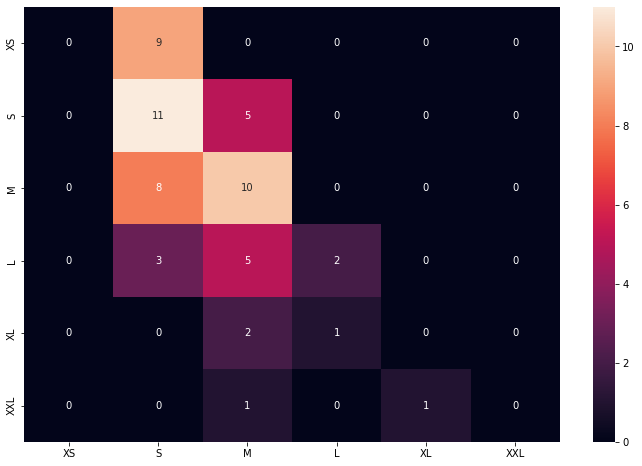

In [138]:
conf_m = confusion_matrix(y_test_wa, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [139]:
best_svc_without_age_feature.fit(X_wa, y_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model', SVC(C=7, coef0=0, gamma=0.1, probability=True))])

In [140]:
with open('..\models\shirt_size_pred_models\svc_without_age_feature.pkl', 'wb') as f:
    pickle.dump(best_svc_without_age_feature, f)

Without Sex feature

In [141]:
pipeline = Pipeline([('standard_scaler', StandardScaler()),
                     ('model', SVC())])

In [142]:
param_grid = [
    {
        'model__C': [i for i in range(1, 100, 2)], 
        'model__kernel': ['rbf'],
        'model__gamma': ['scale', 'auto', 0.05, 0.1, 0.15, 0.25, 1, 10],
        'model__coef0': [i for i in range(0, 20, 2)],
        'model__probability': [True]
        
    }
]

In [143]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train_ws, y_train_ws)

Fitting 10 folds for each of 500 candidates, totalling 5000 fits
[CV 1/10] END model__C=55, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=55, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=55, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=55, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s


C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


[CV 5/10] END model__C=55, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=55, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 7/10] END model__C=55, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=55, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=55, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=55, model__coef0=4, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=25, model__coef0=6, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=25, model__coef0=6, model__ga

[CV 8/10] END model__C=73, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=73, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=73, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=51, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=51, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=51, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=51, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=51,

[CV 1/10] END model__C=87, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=87, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 3/10] END model__C=87, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 4/10] END model__C=87, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=87, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=87, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=87, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=87, 

[CV 6/10] END model__C=69, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=69, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=69, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=69, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=69, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=63, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=63, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=63, model_

[CV 1/10] END model__C=73, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=73, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=73, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 4/10] END model__C=73, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=73, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=73, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=73, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=73, 

[CV 3/10] END model__C=75, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=75, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 5/10] END model__C=75, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=75, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=75, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=75, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=75, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=75, model__coef0=0, mode

[CV 4/10] END model__C=81, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 5/10] END model__C=81, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=81, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=81, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=81, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=81, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=81, model__coef0=18, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=75, model__coef0=

[CV 4/10] END model__C=47, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=47, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=47, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=47, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=47, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=47, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=47, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=23,

[CV 6/10] END model__C=15, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=15, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=15, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=15, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=15, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.500 total time=   0.0s
[CV 1/10] END model__C=99, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=99, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=99, model__coef0=2, 

[CV 6/10] END model__C=71, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=71, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=71, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=71, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=71, model__coef0=14, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=67, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=67, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=67,

[CV 6/10] END model__C=81, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=81, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=81, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=81, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=81, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=81, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=81, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=81, mode

[CV 7/10] END model__C=55, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=55, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=55, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=55, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=97, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 2/10] END model__C=97, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 3/10] END model__C=97, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=97, model__coef

[CV 7/10] END model__C=89, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=89, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=89, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=89, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=99, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=99, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 3/10] END model__C=99, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 4/10] END model__C

[CV 8/10] END model__C=77, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=77, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 10/10] END model__C=77, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=67, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=67, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=67, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=67, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=67, model__coef0=0, 

[CV 1/10] END model__C=21, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=21, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=21, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=21, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=21, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=21, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=21, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=21, model__

[CV 7/10] END model__C=15, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 8/10] END model__C=15, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=15, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=15, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.545 total time=   0.0s
[CV 1/10] END model__C=43, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=43, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=43, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=43, mod

[CV 9/10] END model__C=97, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=97, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=97, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=97, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 3/10] END model__C=97, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 4/10] END model__C=97, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=97, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=97, mode

[CV 1/10] END model__C=49, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=49, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=49, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=49, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=49, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=49, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=49, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=49, model__

[CV 1/10] END model__C=77, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=77, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=77, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=77, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=77, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=77, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=77, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=77, 

[CV 1/10] END model__C=31, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=31, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=31, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=31, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=31, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=31, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=31, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=31, 

[CV 2/10] END model__C=71, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=71, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 4/10] END model__C=71, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=71, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=71, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=71, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=71, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=71, 

[CV 5/10] END model__C=79, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=79, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=79, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=79, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=79, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=79, model__coef0=6, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=77, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=77, 

[CV 6/10] END model__C=95, model__coef0=6, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=95, model__coef0=6, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.217 total time=   0.0s
[CV 8/10] END model__C=95, model__coef0=6, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=95, model__coef0=6, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=95, model__coef0=6, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=33, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=33, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=33, model__coef0=0, model

[CV 7/10] END model__C=57, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=57, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=57, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=57, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=3, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=3, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 3/10] END model__C=3, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=3, model__coef0=0, mode

[CV 10/10] END model__C=91, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=27, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=27, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=27, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=27, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=27, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=27, model__coef0=10, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=27

[CV 1/10] END model__C=79, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=79, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=79, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 4/10] END model__C=79, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=79, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=79, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=79, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=79, 

[CV 1/10] END model__C=9, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=9, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=9, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 4/10] END model__C=9, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=9, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=9, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=9, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=9, model__coef0=8,

[CV 7/10] END model__C=25, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 8/10] END model__C=25, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=25, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=25, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=35, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=35, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=35, model__coef0=4, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=35, mod

[CV 7/10] END model__C=47, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=47, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=47, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=47, model__coef0=18, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=77, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=77, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=77, model__coef0=2, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=77, mo

[CV 8/10] END model__C=21, model__coef0=18, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=21, model__coef0=18, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=21, model__coef0=18, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=29, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=29, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=29, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=29, model__coef0=18, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=29,

[CV 1/10] END model__C=95, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=95, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 3/10] END model__C=95, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=95, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 5/10] END model__C=95, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=95, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=95, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=95, model__coef0=1

[CV 4/10] END model__C=71, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=71, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=71, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=71, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=71, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=71, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=71, model__coef0=18, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=73, model_

[CV 8/10] END model__C=65, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=65, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=65, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=63, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=63, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 3/10] END model__C=63, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=63, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 5/10] END model__C=63, model__coe

[CV 8/10] END model__C=93, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=93, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=93, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=33, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=33, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=33, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=33, model__coef0=16, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=33, model__coef0=1

[CV 9/10] END model__C=85, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=85, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=33, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=33, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=33, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=33, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 5/10] END model__C=33, model__coef0=16, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=33,

[CV 10/10] END model__C=19, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=75, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=75, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=75, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=75, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=75, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=75, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=75, mode

[CV 4/10] END model__C=39, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 5/10] END model__C=39, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=39, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=39, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=39, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=39, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=39, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=95, model__coef0=4, mode

[CV 9/10] END model__C=23, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=23, model__coef0=16, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=45, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=45, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=45, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=45, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=45, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=45, m

[CV 9/10] END model__C=47, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=47, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=21, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=21, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 3/10] END model__C=21, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=21, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=21, model__coef0=10, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=21, model__coef0=10,

[CV 9/10] END model__C=85, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=85, model__coef0=8, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=9, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 2/10] END model__C=9, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=9, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=9, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=9, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=9, model

[CV 3/10] END model__C=9, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.1s
[CV 4/10] END model__C=9, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.3s
[CV 5/10] END model__C=9, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=9, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=9, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=9, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=9, model__coef0=12, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=9, model__

[CV 7/10] END model__C=65, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=65, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=65, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=65, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=11, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=11, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=11, model__coef0=12, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=11, mo

[CV 9/10] END model__C=55, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.1s
[CV 10/10] END model__C=55, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.1s
[CV 1/10] END model__C=27, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=27, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=27, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=27, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=27, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=27, model__coef

[CV 10/10] END model__C=55, model__coef0=0, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=87, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=87, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=87, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=87, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=87, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=87, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=87, model__coef0=4

[CV 3/10] END model__C=69, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=69, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=69, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=69, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=69, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=69, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 9/10] END model__C=69, model__coef0=2, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=69, model__coef0=2, model__gamm

[CV 6/10] END model__C=3, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=3, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=3, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=3, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=3, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=91, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=91, model__coef0=6, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 3/10] END model__C=91, model__coef0=6, model__gam

[CV 1/10] END model__C=81, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=81, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=81, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 4/10] END model__C=81, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=81, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=81, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=81, model__coef0=12, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=81, 

[CV 7/10] END model__C=55, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=55, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=55, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=55, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.318 total time=   0.0s
[CV 1/10] END model__C=21, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=21, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=21, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=21, model_

[CV 7/10] END model__C=55, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=55, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=55, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=55, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=9, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 2/10] END model__C=9, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 3/10] END model__C=9, model__coef0=12, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=9, model__coef0=

[CV 10/10] END model__C=99, model__coef0=4, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=37, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=37, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=37, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=37, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=37, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=37, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=37, model_

[CV 3/10] END model__C=65, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=65, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=65, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=65, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=65, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=65, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=65, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=65, model_

[CV 5/10] END model__C=79, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=79, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=79, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=79, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=79, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=79, model__coef0=6, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=59, model__coef0=8, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=59, model__

[CV 5/10] END model__C=35, model__coef0=18, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=35, model__coef0=18, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=35, model__coef0=18, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=35, model__coef0=18, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=35, model__coef0=18, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=35, model__coef0=18, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=61, model__coef0=4, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=61, 

[CV 6/10] END model__C=5, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=5, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=5, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=5, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=5, model__coef0=16, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=35, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=35, model__coef0=16, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=35, mo

[CV 9/10] END model__C=59, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=59, model__coef0=4, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=9, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=9, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=9, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=9, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=9, model__coef0=6, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=9, model__coef0=6, 

[CV 1/10] END model__C=11, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=11, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=11, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=11, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.609 total time=   0.0s
[CV 5/10] END model__C=11, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=11, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=11, model__coef0=16, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 8/10] END model__C=11, 

[CV 1/10] END model__C=91, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=91, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 3/10] END model__C=91, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 4/10] END model__C=91, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=91, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=91, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=91, model__coef0=0, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=91, model__

[CV 1/10] END model__C=73, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=73, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=73, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=73, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=73, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=73, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=73, model__coef0=14, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=73, model__

[CV 3/10] END model__C=13, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=13, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=13, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=13, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=13, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 8/10] END model__C=13, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 9/10] END model__C=13, model__coef0=4, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=13, model__coef0=

[CV 5/10] END model__C=37, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=37, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 7/10] END model__C=37, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.261 total time=   0.0s
[CV 8/10] END model__C=37, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=37, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=37, model__coef0=12, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=35, model__coef0=18, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=35, model__coef0=18, 

[CV 5/10] END model__C=53, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=53, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=53, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=53, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=53, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 10/10] END model__C=53, model__coef0=14, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=85, model__coef0=0, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__

[CV 9/10] END model__C=71, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=71, model__coef0=2, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.318 total time=   0.0s
[CV 1/10] END model__C=53, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=53, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=53, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=53, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=53, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=53, m

[CV 9/10] END model__C=33, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=33, model__coef0=8, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=5, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=5, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=5, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 4/10] END model__C=5, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=5, model__coef0=10, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=5, mo

[CV 2/10] END model__C=27, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=27, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=27, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=27, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=27, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=27, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 8/10] END model__C=27, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=27, 

[CV 3/10] END model__C=75, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 4/10] END model__C=75, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=75, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=75, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=75, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=75, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=75, model__coef0=0, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=75,

[CV 7/10] END model__C=79, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=79, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=79, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=79, model__coef0=14, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=77, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 2/10] END model__C=77, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=77, model__coef0=2, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=77, mo

[CV 10/10] END model__C=71, model__coef0=8, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=21, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=21, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=21, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=21, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=21, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=21, model__coef0=8, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=21, model_

[CV 4/10] END model__C=69, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=69, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=69, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=69, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=69, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=69, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=69, model__coef0=12, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.318 total time=   0.0s
[CV 1/10] END model__C=97,

[CV 4/10] END model__C=61, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=61, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=61, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=61, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 8/10] END model__C=61, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=61, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=61, model__coef0=6, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=89, model_

[CV 4/10] END model__C=61, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 5/10] END model__C=61, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=61, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=61, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=61, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=61, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 10/10] END model__C=61, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.318 total time=   0.0s
[CV 1/10] END model__C=41,

[CV 10/10] END model__C=93, model__coef0=8, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=7, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=7, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=7, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=7, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=7, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=7, model__coef0=14, model__gamma=0.15, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=7, model__

[CV 10/10] END model__C=43, model__coef0=0, model__gamma=0.25, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=29, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=29, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 3/10] END model__C=29, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=29, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=29, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=29, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=29, model__coef0

[CV 1/10] END model__C=21, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=21, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=21, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 4/10] END model__C=21, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 5/10] END model__C=21, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=21, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 7/10] END model__C=21, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 8/10] END model__C=21, 

[CV 4/10] END model__C=29, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=29, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=29, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=29, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 8/10] END model__C=29, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 9/10] END model__C=29, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=29, model__coef0=8, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=35, model__coef0=10, model__gam

[CV 9/10] END model__C=57, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=57, model__coef0=12, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.364 total time=   0.0s
[CV 1/10] END model__C=97, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 2/10] END model__C=97, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 3/10] END model__C=97, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=97, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 5/10] END model__C=97, model__coef0=0, model__gamma=0.1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 6/10] END model__C=97, model__co

[CV 9/10] END model__C=33, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=33, model__coef0=4, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=59, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model__C=59, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 3/10] END model__C=59, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 4/10] END model__C=59, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 5/10] END model__C=59, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=59, model__coef0=0, model

[CV 4/10] END model__C=27, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 5/10] END model__C=27, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=27, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=27, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=27, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=27, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=27, model__coef0=16, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=15, model__coef0=

[CV 7/10] END model__C=73, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 8/10] END model__C=73, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 9/10] END model__C=73, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 10/10] END model__C=73, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=33, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.522 total time=   0.0s
[CV 2/10] END model__C=33, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=33, model__coef0=10, model__gamma=auto, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=33,

[CV 10/10] END model__C=13, model__coef0=0, model__gamma=1, model__kernel=rbf, model__probability=True;, score=0.409 total time=   0.0s
[CV 1/10] END model__C=41, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 2/10] END model__C=41, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 3/10] END model__C=41, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.391 total time=   0.0s
[CV 4/10] END model__C=41, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.565 total time=   0.0s
[CV 5/10] END model__C=41, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 6/10] END model__C=41, model__coef0=4, model__gamma=0.05, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 7/10] END model__C=41, model__co

[CV 2/10] END model__C=37, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 3/10] END model__C=37, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 4/10] END model__C=37, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.304 total time=   0.0s
[CV 5/10] END model__C=37, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 6/10] END model__C=37, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=37, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 8/10] END model__C=37, model__coef0=14, model__gamma=10, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 9/10] END model__C=37, model__coef0=1

[CV 5/10] END model__C=37, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 6/10] END model__C=37, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 7/10] END model__C=37, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 8/10] END model__C=37, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.478 total time=   0.0s
[CV 9/10] END model__C=37, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.435 total time=   0.0s
[CV 10/10] END model__C=37, model__coef0=18, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.455 total time=   0.0s
[CV 1/10] END model__C=43, model__coef0=2, model__gamma=scale, model__kernel=rbf, model__probability=True;, score=0.348 total time=   0.0s
[CV 2/10] END model_

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('standard_scaler',
                                              StandardScaler()),
                                             ('model', SVC())]),
                   n_iter=500,
                   param_distributions=[{'model__C': [1, 3, 5, 7, 9, 11, 13, 15,
                                                      17, 19, 21, 23, 25, 27,
                                                      29, 31, 33, 35, 37, 39,
                                                      41, 43, 45, 47, 49, 51,
                                                      53, 55, 57, 59, ...],
                                         'model__coef0': [0, 2, 4, 6, 8, 10, 12,
                                                          14, 16, 18],
                                         'model__gamma': ['scale', 'auto', 0.05,
                                                          0.1, 0.15, 0.25, 1,
                                              

In [144]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
41        0.028888      0.001465         0.002740    4.988078e-04   
40        0.028065      0.000609         0.002331    4.710770e-04   
245       0.036676      0.007691         0.003350    1.450968e-03   
374       0.022041      0.000829         0.001995    4.653745e-07   
218       0.028851      0.001175         0.002700    4.620975e-04   

    param_model__probability param_model__kernel param_model__gamma  \
41                      True                 rbf                0.1   
40                      True                 rbf                0.1   
245                     True                 rbf               0.05   
374                     True                 rbf               0.15   
218                     True                 rbf               0.05   

    param_model__coef0 param_model__C  \
41                  18              1   
40                  12              1   
245                  4              1   
374                  0              1   
218                  6              3   

                                                params  ...  \
41   {'model__probability': True, 'model__kernel': ...  ...   
40   {'model__probability': True, 'model__kernel': ...  ...   
245  {'model__probability': True, 'model__kernel': ...  ...   
374  {'model__probability': True, 'model__kernel': ...  ...   
218  {'model__probability': True, 'model__kernel': ...  ...   

     split3_test_score  split4_test_score  split5_test_score  \
41            0.608696           0.391304           0.391304   
40            0.608696           0.391304           0.391304   
245           0.565217           0.391304           0.391304   
374           0.608696           0.391304           0.391304   
218           0.608696           0.347826           0.391304   

     split6_test_score  split7_test_score  split8_test_score  \
41            0.521739           0.434783           0.434783   
40            0.521739           0.434783           0.434783   
245           0.521739           0.434783           0.434783   
374           0.521739           0.434783           0.434783   
218           0.521739           0.434783           0.434783   

     split9_test_score  mean_test_score  std_test_score  rank_test_score  
41            0.545455         0.489328        0.085577                1  
40            0.545455         0.489328        0.085577                1  
245           0.545455         0.480632        0.071915                3  
374           0.545455         0.480632        0.079410                3  
218           0.545455         0.480632        0.084036                5  

[5 rows x 23 columns]

In [145]:
best_svc_without_gender_feature = rand_search.best_estimator_
best_svc_without_gender_feature.fit(X_train_ws, y_train_ws)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('model', SVC(C=1, coef0=12, gamma=0.1, probability=True))])

In [146]:
with open('..\models\shirt_size_pred_models\svc_without_gender_feature.pkl', 'wb') as f:
    pickle.dump(best_svc_without_gender_feature, f)

SVM results.
<br>
with all features = 46.0% accuracy score, std = 8% 
<br>
without age feature = 47.4% accuracy score, std = 6%
<br>
without sex seature = 46.9% accuracy score, std = 7%

# K Neighbors

In [147]:
from sklearn.neighbors import KNeighborsClassifier

In [148]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['age', 'height', 'weight'])])

In [149]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', KNeighborsClassifier())])

In [150]:
param_grid = [
    {
        'model__n_neighbors': [i for i in range(1, 40)], 
        'model__weights': ['uniform', 'distance'],
    }
]

In [151]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 78 is smaller than n_iter=500. Running 78 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fitting 10 folds for each of 78 candidates, totalling 780 fits
[CV 1/10] END model__n_neighbors=1, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 2/10] END model__n_neighbors=1, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 3/10] END model__n_neighbors=1, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 4/10] END model__n_neighbors=1, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 5/10] END model__n_neighbors=1, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 6/10] END model__n_neighbors=1, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 7/10] END model__n_neighbors=1, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 8/10] END model__n_neighbors=1, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 9/10] END model__n_neighbors=1, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 10/10] END model__n_neighbors=1, model__weights=uniform;, score=0.364 total time=   0.0s
[CV 1/10] END mo

[CV 2/10] END model__n_neighbors=5, model__weights=distance;, score=0.348 total time=   0.0s
[CV 3/10] END model__n_neighbors=5, model__weights=distance;, score=0.478 total time=   0.0s
[CV 4/10] END model__n_neighbors=5, model__weights=distance;, score=0.304 total time=   0.0s
[CV 5/10] END model__n_neighbors=5, model__weights=distance;, score=0.391 total time=   0.0s
[CV 6/10] END model__n_neighbors=5, model__weights=distance;, score=0.435 total time=   0.0s
[CV 7/10] END model__n_neighbors=5, model__weights=distance;, score=0.304 total time=   0.0s
[CV 8/10] END model__n_neighbors=5, model__weights=distance;, score=0.478 total time=   0.0s
[CV 9/10] END model__n_neighbors=5, model__weights=distance;, score=0.478 total time=   0.0s
[CV 10/10] END model__n_neighbors=5, model__weights=distance;, score=0.409 total time=   0.0s
[CV 1/10] END model__n_neighbors=6, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 2/10] END model__n_neighbors=6, model__weights=uniform;, score=0.3

[CV 5/10] END model__n_neighbors=10, model__weights=distance;, score=0.435 total time=   0.0s
[CV 6/10] END model__n_neighbors=10, model__weights=distance;, score=0.435 total time=   0.0s
[CV 7/10] END model__n_neighbors=10, model__weights=distance;, score=0.522 total time=   0.0s
[CV 8/10] END model__n_neighbors=10, model__weights=distance;, score=0.348 total time=   0.0s
[CV 9/10] END model__n_neighbors=10, model__weights=distance;, score=0.478 total time=   0.0s
[CV 10/10] END model__n_neighbors=10, model__weights=distance;, score=0.409 total time=   0.0s
[CV 1/10] END model__n_neighbors=11, model__weights=uniform;, score=0.609 total time=   0.0s
[CV 2/10] END model__n_neighbors=11, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 3/10] END model__n_neighbors=11, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 4/10] END model__n_neighbors=11, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 5/10] END model__n_neighbors=11, model__weights=uniform;, s

[CV 4/10] END model__n_neighbors=15, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 5/10] END model__n_neighbors=15, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 6/10] END model__n_neighbors=15, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 7/10] END model__n_neighbors=15, model__weights=uniform;, score=0.652 total time=   0.0s
[CV 8/10] END model__n_neighbors=15, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 9/10] END model__n_neighbors=15, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 10/10] END model__n_neighbors=15, model__weights=uniform;, score=0.409 total time=   0.0s
[CV 1/10] END model__n_neighbors=15, model__weights=distance;, score=0.478 total time=   0.0s
[CV 2/10] END model__n_neighbors=15, model__weights=distance;, score=0.435 total time=   0.0s
[CV 3/10] END model__n_neighbors=15, model__weights=distance;, score=0.391 total time=   0.0s
[CV 4/10] END model__n_neighbors=15, model__weights=distance;, sco

[CV 5/10] END model__n_neighbors=20, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 6/10] END model__n_neighbors=20, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 7/10] END model__n_neighbors=20, model__weights=uniform;, score=0.652 total time=   0.0s
[CV 8/10] END model__n_neighbors=20, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 9/10] END model__n_neighbors=20, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 10/10] END model__n_neighbors=20, model__weights=uniform;, score=0.364 total time=   0.0s
[CV 1/10] END model__n_neighbors=20, model__weights=distance;, score=0.522 total time=   0.0s
[CV 2/10] END model__n_neighbors=20, model__weights=distance;, score=0.435 total time=   0.0s
[CV 3/10] END model__n_neighbors=20, model__weights=distance;, score=0.478 total time=   0.0s
[CV 4/10] END model__n_neighbors=20, model__weights=distance;, score=0.435 total time=   0.0s
[CV 5/10] END model__n_neighbors=20, model__weights=distance;, sc

[CV 5/10] END model__n_neighbors=24, model__weights=distance;, score=0.304 total time=   0.0s
[CV 6/10] END model__n_neighbors=24, model__weights=distance;, score=0.478 total time=   0.0s
[CV 7/10] END model__n_neighbors=24, model__weights=distance;, score=0.565 total time=   0.0s
[CV 8/10] END model__n_neighbors=24, model__weights=distance;, score=0.348 total time=   0.0s
[CV 9/10] END model__n_neighbors=24, model__weights=distance;, score=0.348 total time=   0.0s
[CV 10/10] END model__n_neighbors=24, model__weights=distance;, score=0.409 total time=   0.0s
[CV 1/10] END model__n_neighbors=25, model__weights=uniform;, score=0.609 total time=   0.0s
[CV 2/10] END model__n_neighbors=25, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 3/10] END model__n_neighbors=25, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 4/10] END model__n_neighbors=25, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 5/10] END model__n_neighbors=25, model__weights=uniform;, s

[CV 5/10] END model__n_neighbors=29, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 6/10] END model__n_neighbors=29, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 7/10] END model__n_neighbors=29, model__weights=uniform;, score=0.652 total time=   0.0s
[CV 8/10] END model__n_neighbors=29, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 9/10] END model__n_neighbors=29, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 10/10] END model__n_neighbors=29, model__weights=uniform;, score=0.409 total time=   0.0s
[CV 1/10] END model__n_neighbors=29, model__weights=distance;, score=0.565 total time=   0.0s
[CV 2/10] END model__n_neighbors=29, model__weights=distance;, score=0.435 total time=   0.0s
[CV 3/10] END model__n_neighbors=29, model__weights=distance;, score=0.522 total time=   0.0s
[CV 4/10] END model__n_neighbors=29, model__weights=distance;, score=0.391 total time=   0.0s
[CV 5/10] END model__n_neighbors=29, model__weights=distance;, sc

[CV 5/10] END model__n_neighbors=33, model__weights=distance;, score=0.304 total time=   0.0s
[CV 6/10] END model__n_neighbors=33, model__weights=distance;, score=0.435 total time=   0.0s
[CV 7/10] END model__n_neighbors=33, model__weights=distance;, score=0.478 total time=   0.0s
[CV 8/10] END model__n_neighbors=33, model__weights=distance;, score=0.478 total time=   0.0s
[CV 9/10] END model__n_neighbors=33, model__weights=distance;, score=0.391 total time=   0.0s
[CV 10/10] END model__n_neighbors=33, model__weights=distance;, score=0.500 total time=   0.0s
[CV 1/10] END model__n_neighbors=34, model__weights=uniform;, score=0.609 total time=   0.0s
[CV 2/10] END model__n_neighbors=34, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 3/10] END model__n_neighbors=34, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 4/10] END model__n_neighbors=34, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 5/10] END model__n_neighbors=34, model__weights=uniform;, s

[CV 6/10] END model__n_neighbors=38, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 7/10] END model__n_neighbors=38, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 8/10] END model__n_neighbors=38, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 9/10] END model__n_neighbors=38, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 10/10] END model__n_neighbors=38, model__weights=uniform;, score=0.591 total time=   0.0s
[CV 1/10] END model__n_neighbors=38, model__weights=distance;, score=0.565 total time=   0.0s
[CV 2/10] END model__n_neighbors=38, model__weights=distance;, score=0.435 total time=   0.0s
[CV 3/10] END model__n_neighbors=38, model__weights=distance;, score=0.478 total time=   0.0s
[CV 4/10] END model__n_neighbors=38, model__weights=distance;, score=0.391 total time=   0.0s
[CV 5/10] END model__n_neighbors=38, model__weights=distance;, score=0.348 total time=   0.0s
[CV 6/10] END model__n_neighbors=38, model__weights=distance;, s

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['age',
                                                                                'height',
                                                                                'weight'])])),
                                             ('model',
                                              KNeighborsClassifier())]),
                   n_iter=500,
    

In [152]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
20       0.005187      0.000391         0.003889        0.000289   
55       0.007181      0.001074         0.004189        0.000869   
74       0.005685      0.000457         0.004189        0.000399   
72       0.005681      0.000896         0.004588        0.000668   
58       0.005585      0.000488         0.004388        0.000488   

   param_model__weights param_model__n_neighbors  \
20              uniform                       11   
55             distance                       28   
74              uniform                       38   
72              uniform                       37   
58              uniform                       30   

                                               params  split0_test_score  \
20  {'model__weights': 'uniform', 'model__n_neighb...           0.608696   
55  {'model__weights': 'distance', 'model__n_neigh...           0.565217   
74  {'model__weights': 'uniform', 'model__n_neighb...           0.652174   
72  {'model__weights': 'uniform', 'model__n_neighb...           0.652174   
58  {'model__weights': 'uniform', 'model__n_neighb...           0.608696   

    split1_test_score  split2_test_score  split3_test_score  \
20           0.478261           0.391304           0.391304   
55           0.478261           0.521739           0.391304   
74           0.434783           0.478261           0.391304   
72           0.434783           0.478261           0.347826   
58           0.434783           0.478261           0.304348   

    split4_test_score  split5_test_score  split6_test_score  \
20           0.478261           0.478261           0.521739   
55           0.347826           0.478261           0.608696   
74           0.391304           0.478261           0.521739   
72           0.391304           0.478261           0.565217   
58           0.434783           0.521739           0.608696   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
20           0.565217           0.478261           0.409091         0.480040   
55           0.478261           0.391304           0.500000         0.476087   
74           0.391304           0.391304           0.590909         0.472134   
72           0.434783           0.391304           0.545455         0.471937   
58           0.434783           0.391304           0.500000         0.471739   

    std_test_score  rank_test_score  
20        0.068074                1  
55        0.076829                2  
74        0.087514                3  
72        0.088226                4  
58        0.089130                5

In [153]:
best_kneighbors = rand_search.best_estimator_
best_kneighbors.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model', KNeighborsClassifier(n_neighbors=11))])

In [154]:
y_pred = best_kneighbors.predict(X_test)
y_pred

array([1, 2, 1, 2, 0, 2, 3, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 3, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 0, 1, 2, 2, 1,
       2, 1, 1, 2, 1, 1, 2, 1, 1, 3, 1, 2, 1, 2], dtype=int64)

In [155]:
y_test.values

array([2, 1, 2, 2, 0, 3, 1, 0, 2, 2, 5, 1, 2, 0, 4, 1, 1, 0, 3, 3, 1, 1,
       5, 3, 3, 2, 0, 1, 2, 2, 0, 3, 3, 0, 2, 1, 4, 0, 2, 1, 1, 1, 2, 1,
       3, 2, 3, 2, 3, 2, 1, 2, 1, 4, 2, 1, 0, 2], dtype=int64)

In [156]:
accuracy_score(y_test, y_pred)

0.25862068965517243

In [157]:
x_axis = np.unique(np.concatenate([y_pred, y_test]))
x_axis = [s_sizes[i] for i in x_axis]
x_axis

['XS', 'S', 'M', 'L', 'XL', 'XXL']

[Text(0, 0.5, 'XS'),
 Text(0, 1.5, 'S'),
 Text(0, 2.5, 'M'),
 Text(0, 3.5, 'L'),
 Text(0, 4.5, 'XL'),
 Text(0, 5.5, 'XXL')]

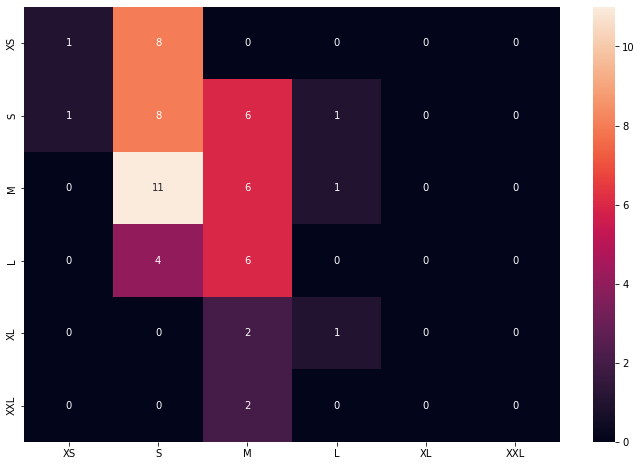

In [158]:
conf_m = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [159]:
best_kneighbors.fit(X, y)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model', KNeighborsClassifier(n_neighbors=11))])

In [160]:
with open('..\models\shirt_size_pred_models\kneighbors_classifier.pkl', 'wb') as f:
    pickle.dump(best_kneighbors, f)

Without Age feature

In [161]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['height', 'weight']),])

In [162]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', KNeighborsClassifier())])

In [163]:
param_grid = [
    {
        'model__n_neighbors': [i for i in range(1, 40)], 
        'model__weights': ['uniform', 'distance'],
    }
]

In [164]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train_wa, y_train_wa)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 78 is smaller than n_iter=500. Running 78 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fitting 10 folds for each of 78 candidates, totalling 780 fits
[CV 1/10] END model__n_neighbors=1, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 2/10] END model__n_neighbors=1, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 3/10] END model__n_neighbors=1, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 4/10] END model__n_neighbors=1, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 5/10] END model__n_neighbors=1, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 6/10] END model__n_neighbors=1, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 7/10] END model__n_neighbors=1, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 8/10] END model__n_neighbors=1, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 9/10] END model__n_neighbors=1, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 10/10] END model__n_neighbors=1, model__weights=uniform;, score=0.455 total time=   0.0s
[CV 1/10] END mo

[CV 1/10] END model__n_neighbors=5, model__weights=distance;, score=0.348 total time=   0.0s
[CV 2/10] END model__n_neighbors=5, model__weights=distance;, score=0.435 total time=   0.0s
[CV 3/10] END model__n_neighbors=5, model__weights=distance;, score=0.522 total time=   0.0s
[CV 4/10] END model__n_neighbors=5, model__weights=distance;, score=0.391 total time=   0.0s
[CV 5/10] END model__n_neighbors=5, model__weights=distance;, score=0.478 total time=   0.0s
[CV 6/10] END model__n_neighbors=5, model__weights=distance;, score=0.348 total time=   0.0s
[CV 7/10] END model__n_neighbors=5, model__weights=distance;, score=0.652 total time=   0.0s
[CV 8/10] END model__n_neighbors=5, model__weights=distance;, score=0.261 total time=   0.0s
[CV 9/10] END model__n_neighbors=5, model__weights=distance;, score=0.565 total time=   0.0s
[CV 10/10] END model__n_neighbors=5, model__weights=distance;, score=0.455 total time=   0.0s
[CV 1/10] END model__n_neighbors=6, model__weights=uniform;, score=0.

[CV 2/10] END model__n_neighbors=10, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 3/10] END model__n_neighbors=10, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 4/10] END model__n_neighbors=10, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 5/10] END model__n_neighbors=10, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 6/10] END model__n_neighbors=10, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 7/10] END model__n_neighbors=10, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 8/10] END model__n_neighbors=10, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 9/10] END model__n_neighbors=10, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 10/10] END model__n_neighbors=10, model__weights=uniform;, score=0.455 total time=   0.0s
[CV 1/10] END model__n_neighbors=10, model__weights=distance;, score=0.391 total time=   0.0s
[CV 2/10] END model__n_neighbors=10, model__weights=distance;, score

[CV 10/10] END model__n_neighbors=14, model__weights=uniform;, score=0.409 total time=   0.0s
[CV 1/10] END model__n_neighbors=14, model__weights=distance;, score=0.478 total time=   0.0s
[CV 2/10] END model__n_neighbors=14, model__weights=distance;, score=0.478 total time=   0.0s
[CV 3/10] END model__n_neighbors=14, model__weights=distance;, score=0.522 total time=   0.0s
[CV 4/10] END model__n_neighbors=14, model__weights=distance;, score=0.435 total time=   0.0s
[CV 5/10] END model__n_neighbors=14, model__weights=distance;, score=0.478 total time=   0.0s
[CV 6/10] END model__n_neighbors=14, model__weights=distance;, score=0.391 total time=   0.0s
[CV 7/10] END model__n_neighbors=14, model__weights=distance;, score=0.565 total time=   0.0s
[CV 8/10] END model__n_neighbors=14, model__weights=distance;, score=0.304 total time=   0.0s
[CV 9/10] END model__n_neighbors=14, model__weights=distance;, score=0.435 total time=   0.0s
[CV 10/10] END model__n_neighbors=14, model__weights=distanc

[CV 10/10] END model__n_neighbors=18, model__weights=distance;, score=0.455 total time=   0.0s
[CV 1/10] END model__n_neighbors=19, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 2/10] END model__n_neighbors=19, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 3/10] END model__n_neighbors=19, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 4/10] END model__n_neighbors=19, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 5/10] END model__n_neighbors=19, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 6/10] END model__n_neighbors=19, model__weights=uniform;, score=0.261 total time=   0.0s
[CV 7/10] END model__n_neighbors=19, model__weights=uniform;, score=0.696 total time=   0.0s
[CV 8/10] END model__n_neighbors=19, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 9/10] END model__n_neighbors=19, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 10/10] END model__n_neighbors=19, model__weights=uniform;, score

[CV 8/10] END model__n_neighbors=23, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 9/10] END model__n_neighbors=23, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 10/10] END model__n_neighbors=23, model__weights=uniform;, score=0.500 total time=   0.0s
[CV 1/10] END model__n_neighbors=23, model__weights=distance;, score=0.478 total time=   0.0s
[CV 2/10] END model__n_neighbors=23, model__weights=distance;, score=0.435 total time=   0.0s
[CV 3/10] END model__n_neighbors=23, model__weights=distance;, score=0.435 total time=   0.0s
[CV 4/10] END model__n_neighbors=23, model__weights=distance;, score=0.391 total time=   0.0s
[CV 5/10] END model__n_neighbors=23, model__weights=distance;, score=0.391 total time=   0.0s
[CV 6/10] END model__n_neighbors=23, model__weights=distance;, score=0.478 total time=   0.0s
[CV 7/10] END model__n_neighbors=23, model__weights=distance;, score=0.522 total time=   0.0s
[CV 8/10] END model__n_neighbors=23, model__weights=distance;,

[CV 7/10] END model__n_neighbors=27, model__weights=distance;, score=0.478 total time=   0.0s
[CV 8/10] END model__n_neighbors=27, model__weights=distance;, score=0.348 total time=   0.0s
[CV 9/10] END model__n_neighbors=27, model__weights=distance;, score=0.391 total time=   0.0s
[CV 10/10] END model__n_neighbors=27, model__weights=distance;, score=0.591 total time=   0.0s
[CV 1/10] END model__n_neighbors=28, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 2/10] END model__n_neighbors=28, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 3/10] END model__n_neighbors=28, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 4/10] END model__n_neighbors=28, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 5/10] END model__n_neighbors=28, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 6/10] END model__n_neighbors=28, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 7/10] END model__n_neighbors=28, model__weights=uniform;, sco

[CV 2/10] END model__n_neighbors=33, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 3/10] END model__n_neighbors=33, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 4/10] END model__n_neighbors=33, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 5/10] END model__n_neighbors=33, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 6/10] END model__n_neighbors=33, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 7/10] END model__n_neighbors=33, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 8/10] END model__n_neighbors=33, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 9/10] END model__n_neighbors=33, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 10/10] END model__n_neighbors=33, model__weights=uniform;, score=0.500 total time=   0.0s
[CV 1/10] END model__n_neighbors=33, model__weights=distance;, score=0.478 total time=   0.0s
[CV 2/10] END model__n_neighbors=33, model__weights=distance;, score

[CV 1/10] END model__n_neighbors=37, model__weights=distance;, score=0.522 total time=   0.0s
[CV 2/10] END model__n_neighbors=37, model__weights=distance;, score=0.522 total time=   0.0s
[CV 3/10] END model__n_neighbors=37, model__weights=distance;, score=0.522 total time=   0.0s
[CV 4/10] END model__n_neighbors=37, model__weights=distance;, score=0.435 total time=   0.0s
[CV 5/10] END model__n_neighbors=37, model__weights=distance;, score=0.261 total time=   0.0s
[CV 6/10] END model__n_neighbors=37, model__weights=distance;, score=0.435 total time=   0.0s
[CV 7/10] END model__n_neighbors=37, model__weights=distance;, score=0.565 total time=   0.0s
[CV 8/10] END model__n_neighbors=37, model__weights=distance;, score=0.348 total time=   0.0s
[CV 9/10] END model__n_neighbors=37, model__weights=distance;, score=0.391 total time=   0.0s
[CV 10/10] END model__n_neighbors=37, model__weights=distance;, score=0.545 total time=   0.0s
[CV 1/10] END model__n_neighbors=38, model__weights=uniform

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['height',
                                                                                'weight'])])),
                                             ('model',
                                              KNeighborsClassifier())]),
                   n_iter=500,
                   param_distributions=[{'model__n_neighbors': [1, 2, 3, 4, 5,
            

In [165]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
58       0.005985      0.000888         0.004989        0.000620   
62       0.005685      0.000638         0.004296        0.000460   
66       0.005681      0.000637         0.004393        0.000493   
68       0.006084      0.000828         0.004488        0.000919   
70       0.005585      0.000489         0.004189        0.000599   

   param_model__weights param_model__n_neighbors  \
58              uniform                       30   
62              uniform                       32   
66              uniform                       34   
68              uniform                       35   
70              uniform                       36   

                                               params  split0_test_score  \
58  {'model__weights': 'uniform', 'model__n_neighb...           0.565217   
62  {'model__weights': 'uniform', 'model__n_neighb...           0.565217   
66  {'model__weights': 'uniform', 'model__n_neighb...           0.565217   
68  {'model__weights': 'uniform', 'model__n_neighb...           0.608696   
70  {'model__weights': 'uniform', 'model__n_neighb...           0.608696   

    split1_test_score  split2_test_score  split3_test_score  \
58           0.521739           0.521739           0.434783   
62           0.478261           0.521739           0.434783   
66           0.478261           0.521739           0.434783   
68           0.478261           0.478261           0.391304   
70           0.478261           0.478261           0.434783   

    split4_test_score  split5_test_score  split6_test_score  \
58           0.391304           0.434783           0.521739   
62           0.391304           0.434783           0.521739   
66           0.391304           0.434783           0.565217   
68           0.391304           0.478261           0.565217   
70           0.391304           0.478261           0.565217   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
58           0.521739           0.391304           0.590909         0.489526   
62           0.521739           0.391304           0.590909         0.485178   
66           0.521739           0.391304           0.545455         0.484980   
68           0.478261           0.391304           0.545455         0.480632   
70           0.478261           0.391304           0.500000         0.480435   

    std_test_score  rank_test_score  
58        0.067414                1  
62        0.066594                2  
66        0.064708                3  
68        0.071915                4  
70        0.064818                5

In [166]:
best_kneighbors_without_age_feature = rand_search.best_estimator_
best_kneighbors_without_age_feature.fit(X_train_wa, y_train_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model', KNeighborsClassifier(n_neighbors=30))])

In [167]:
y_pred = best_kneighbors_without_age_feature.predict(X_test_wa)
y_pred

array([1, 1, 1, 0, 1, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 2, 2, 2, 1, 2], dtype=int64)

In [168]:
y_test_wa.values

array([2, 1, 2, 2, 0, 3, 1, 0, 2, 2, 5, 1, 2, 0, 4, 1, 1, 0, 3, 3, 1, 1,
       5, 3, 3, 2, 0, 1, 2, 2, 0, 3, 3, 0, 2, 1, 4, 0, 2, 1, 1, 1, 2, 1,
       3, 2, 3, 2, 3, 2, 1, 2, 1, 4, 2, 1, 0, 2], dtype=int64)

In [169]:
accuracy_score(y_test_wa, y_pred)

0.3103448275862069

In [170]:
x_axis = np.unique(np.concatenate([y_pred, y_test_wa]))
x_axis = [s_sizes[i] for i in x_axis]
x_axis

['XS', 'S', 'M', 'L', 'XL', 'XXL']

[Text(0, 0.5, 'XS'),
 Text(0, 1.5, 'S'),
 Text(0, 2.5, 'M'),
 Text(0, 3.5, 'L'),
 Text(0, 4.5, 'XL'),
 Text(0, 5.5, 'XXL')]

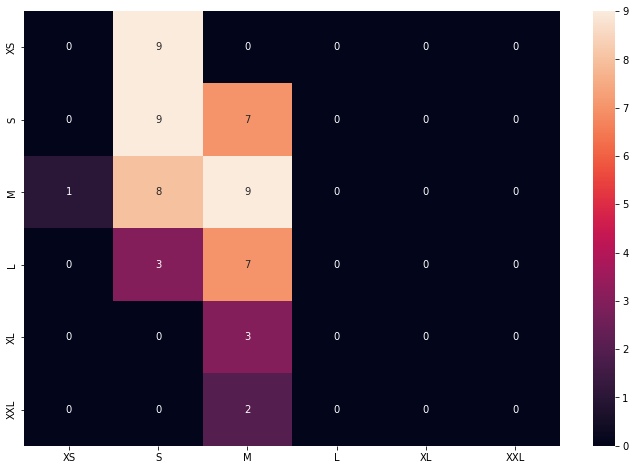

In [171]:
conf_m = confusion_matrix(y_test_wa, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [172]:
best_kneighbors_without_age_feature.fit(X_wa, y_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model', KNeighborsClassifier(n_neighbors=30))])

In [173]:
with open('..\models\shirt_size_pred_models\kneighbors_classifier_without_age_feature.pkl', 'wb') as f:
    pickle.dump(best_kneighbors_without_age_feature, f)

Without Sex feature

In [174]:
pipeline = Pipeline([('standard_scaler', StandardScaler()),
                     ('model', KNeighborsClassifier())])

In [175]:
param_grid = [
    {
        'model__n_neighbors': [i for i in range(1, 40)], 
        'model__weights': ['uniform', 'distance'],
    }
]

In [176]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train_ws, y_train_ws)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 78 is smaller than n_iter=500. Running 78 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fitting 10 folds for each of 78 candidates, totalling 780 fits
[CV 1/10] END model__n_neighbors=1, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 2/10] END model__n_neighbors=1, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 3/10] END model__n_neighbors=1, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 4/10] END model__n_neighbors=1, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 5/10] END model__n_neighbors=1, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 6/10] END model__n_neighbors=1, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 7/10] END model__n_neighbors=1, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 8/10] END model__n_neighbors=1, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 9/10] END model__n_neighbors=1, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 10/10] END model__n_neighbors=1, model__weights=uniform;, score=0.500 total time=   0.0s
[CV 1/10] END mo

[CV 7/10] END model__n_neighbors=6, model__weights=distance;, score=0.435 total time=   0.0s
[CV 8/10] END model__n_neighbors=6, model__weights=distance;, score=0.304 total time=   0.0s
[CV 9/10] END model__n_neighbors=6, model__weights=distance;, score=0.478 total time=   0.0s
[CV 10/10] END model__n_neighbors=6, model__weights=distance;, score=0.409 total time=   0.0s
[CV 1/10] END model__n_neighbors=7, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 2/10] END model__n_neighbors=7, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 3/10] END model__n_neighbors=7, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 4/10] END model__n_neighbors=7, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 5/10] END model__n_neighbors=7, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 6/10] END model__n_neighbors=7, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 7/10] END model__n_neighbors=7, model__weights=uniform;, score=0.435 to

[CV 1/10] END model__n_neighbors=12, model__weights=distance;, score=0.391 total time=   0.0s
[CV 2/10] END model__n_neighbors=12, model__weights=distance;, score=0.435 total time=   0.0s
[CV 3/10] END model__n_neighbors=12, model__weights=distance;, score=0.522 total time=   0.0s
[CV 4/10] END model__n_neighbors=12, model__weights=distance;, score=0.348 total time=   0.0s
[CV 5/10] END model__n_neighbors=12, model__weights=distance;, score=0.304 total time=   0.0s
[CV 6/10] END model__n_neighbors=12, model__weights=distance;, score=0.435 total time=   0.0s
[CV 7/10] END model__n_neighbors=12, model__weights=distance;, score=0.391 total time=   0.0s
[CV 8/10] END model__n_neighbors=12, model__weights=distance;, score=0.348 total time=   0.0s
[CV 9/10] END model__n_neighbors=12, model__weights=distance;, score=0.348 total time=   0.0s
[CV 10/10] END model__n_neighbors=12, model__weights=distance;, score=0.455 total time=   0.0s
[CV 1/10] END model__n_neighbors=13, model__weights=uniform

[CV 3/10] END model__n_neighbors=18, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 4/10] END model__n_neighbors=18, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 5/10] END model__n_neighbors=18, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 6/10] END model__n_neighbors=18, model__weights=uniform;, score=0.304 total time=   0.0s
[CV 7/10] END model__n_neighbors=18, model__weights=uniform;, score=0.565 total time=   0.0s
[CV 8/10] END model__n_neighbors=18, model__weights=uniform;, score=0.565 total time=   0.0s
[CV 9/10] END model__n_neighbors=18, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 10/10] END model__n_neighbors=18, model__weights=uniform;, score=0.409 total time=   0.0s
[CV 1/10] END model__n_neighbors=18, model__weights=distance;, score=0.391 total time=   0.0s
[CV 2/10] END model__n_neighbors=18, model__weights=distance;, score=0.435 total time=   0.0s
[CV 3/10] END model__n_neighbors=18, model__weights=distance;, scor

[CV 8/10] END model__n_neighbors=23, model__weights=distance;, score=0.391 total time=   0.0s
[CV 9/10] END model__n_neighbors=23, model__weights=distance;, score=0.478 total time=   0.0s
[CV 10/10] END model__n_neighbors=23, model__weights=distance;, score=0.500 total time=   0.0s
[CV 1/10] END model__n_neighbors=24, model__weights=uniform;, score=0.609 total time=   0.0s
[CV 2/10] END model__n_neighbors=24, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 3/10] END model__n_neighbors=24, model__weights=uniform;, score=0.478 total time=   0.0s
[CV 4/10] END model__n_neighbors=24, model__weights=uniform;, score=0.565 total time=   0.0s
[CV 5/10] END model__n_neighbors=24, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 6/10] END model__n_neighbors=24, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 7/10] END model__n_neighbors=24, model__weights=uniform;, score=0.565 total time=   0.0s
[CV 8/10] END model__n_neighbors=24, model__weights=uniform;, scor

[CV 9/10] END model__n_neighbors=28, model__weights=uniform;, score=0.391 total time=   0.0s
[CV 10/10] END model__n_neighbors=28, model__weights=uniform;, score=0.500 total time=   0.0s
[CV 1/10] END model__n_neighbors=28, model__weights=distance;, score=0.522 total time=   0.0s
[CV 2/10] END model__n_neighbors=28, model__weights=distance;, score=0.435 total time=   0.0s
[CV 3/10] END model__n_neighbors=28, model__weights=distance;, score=0.565 total time=   0.0s
[CV 4/10] END model__n_neighbors=28, model__weights=distance;, score=0.478 total time=   0.0s
[CV 5/10] END model__n_neighbors=28, model__weights=distance;, score=0.304 total time=   0.0s
[CV 6/10] END model__n_neighbors=28, model__weights=distance;, score=0.435 total time=   0.0s
[CV 7/10] END model__n_neighbors=28, model__weights=distance;, score=0.522 total time=   0.0s
[CV 8/10] END model__n_neighbors=28, model__weights=distance;, score=0.348 total time=   0.0s
[CV 9/10] END model__n_neighbors=28, model__weights=distance;

[CV 5/10] END model__n_neighbors=33, model__weights=distance;, score=0.261 total time=   0.0s
[CV 6/10] END model__n_neighbors=33, model__weights=distance;, score=0.391 total time=   0.0s
[CV 7/10] END model__n_neighbors=33, model__weights=distance;, score=0.478 total time=   0.0s
[CV 8/10] END model__n_neighbors=33, model__weights=distance;, score=0.391 total time=   0.0s
[CV 9/10] END model__n_neighbors=33, model__weights=distance;, score=0.435 total time=   0.0s
[CV 10/10] END model__n_neighbors=33, model__weights=distance;, score=0.545 total time=   0.0s
[CV 1/10] END model__n_neighbors=34, model__weights=uniform;, score=0.652 total time=   0.0s
[CV 2/10] END model__n_neighbors=34, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 3/10] END model__n_neighbors=34, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 4/10] END model__n_neighbors=34, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 5/10] END model__n_neighbors=34, model__weights=uniform;, s

[CV 5/10] END model__n_neighbors=39, model__weights=uniform;, score=0.348 total time=   0.0s
[CV 6/10] END model__n_neighbors=39, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 7/10] END model__n_neighbors=39, model__weights=uniform;, score=0.522 total time=   0.0s
[CV 8/10] END model__n_neighbors=39, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 9/10] END model__n_neighbors=39, model__weights=uniform;, score=0.435 total time=   0.0s
[CV 10/10] END model__n_neighbors=39, model__weights=uniform;, score=0.545 total time=   0.0s
[CV 1/10] END model__n_neighbors=39, model__weights=distance;, score=0.565 total time=   0.0s
[CV 2/10] END model__n_neighbors=39, model__weights=distance;, score=0.435 total time=   0.0s
[CV 3/10] END model__n_neighbors=39, model__weights=distance;, score=0.478 total time=   0.0s
[CV 4/10] END model__n_neighbors=39, model__weights=distance;, score=0.478 total time=   0.0s
[CV 5/10] END model__n_neighbors=39, model__weights=distance;, sc

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('standard_scaler',
                                              StandardScaler()),
                                             ('model',
                                              KNeighborsClassifier())]),
                   n_iter=500,
                   param_distributions=[{'model__n_neighbors': [1, 2, 3, 4, 5,
                                                                6, 7, 8, 9, 10,
                                                                11, 12, 13, 14,
                                                                15, 16, 17, 18,
                                                                19, 20, 21, 22,
                                                                23, 24, 25, 26,
                                                                27, 28, 29, 30, ...],
                                         'model__weights': ['uniform',
                                                 

In [177]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
70       0.003191      0.000399         0.002693        0.000457   
52       0.003496      0.000502         0.002492        0.000498   
60       0.003590      0.000798         0.002892        0.000537   
74       0.003493      0.000494         0.002699        0.000455   
64       0.003576      0.000492         0.002709        0.000460   

   param_model__weights param_model__n_neighbors  \
70              uniform                       36   
52              uniform                       27   
60              uniform                       31   
74              uniform                       38   
64              uniform                       33   

                                               params  split0_test_score  \
70  {'model__weights': 'uniform', 'model__n_neighb...           0.652174   
52  {'model__weights': 'uniform', 'model__n_neighb...           0.652174   
60  {'model__weights': 'uniform', 'model__n_neighb...           0.652174   
74  {'model__weights': 'uniform', 'model__n_neighb...           0.695652   
64  {'model__weights': 'uniform', 'model__n_neighb...           0.652174   

    split1_test_score  split2_test_score  split3_test_score  \
70           0.434783           0.434783           0.521739   
52           0.434783           0.478261           0.608696   
60           0.434783           0.478261           0.478261   
74           0.434783           0.478261           0.521739   
64           0.434783           0.478261           0.565217   

    split4_test_score  split5_test_score  split6_test_score  \
70           0.347826           0.478261           0.521739   
52           0.347826           0.434783           0.565217   
60           0.391304           0.434783           0.521739   
74           0.347826           0.391304           0.521739   
64           0.347826           0.434783           0.478261   

    split7_test_score  split8_test_score  split9_test_score  mean_test_score  \
70           0.434783           0.434783           0.545455         0.480632   
52           0.347826           0.434783           0.500000         0.480435   
60           0.391304           0.434783           0.545455         0.476285   
74           0.391304           0.434783           0.545455         0.476285   
64           0.391304           0.434783           0.545455         0.476285   

    std_test_score  rank_test_score  
70        0.079410                1  
52        0.097439                2  
60        0.075767                3  
74        0.095620                3  
64        0.085164                3

In [178]:
best_kneighbors_without_gender_feature = rand_search.best_estimator_
best_kneighbors_without_gender_feature.fit(X_train_ws, y_train_ws)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=36))])

In [179]:
y_pred = best_kneighbors_without_gender_feature.predict(X_test_ws)
y_pred

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 2,
       2, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 2], dtype=int64)

In [180]:
y_test_ws.values

array([2, 1, 2, 2, 0, 3, 1, 0, 2, 2, 5, 1, 2, 0, 4, 1, 1, 0, 3, 3, 1, 1,
       5, 3, 3, 2, 0, 1, 2, 2, 0, 3, 3, 0, 2, 1, 4, 0, 2, 1, 1, 1, 2, 1,
       3, 2, 3, 2, 3, 2, 1, 2, 1, 4, 2, 1, 0, 2], dtype=int64)

In [181]:
accuracy_score(y_test_ws, y_pred)

0.29310344827586204

In [182]:
x_axis = np.unique(np.concatenate([y_pred, y_test_ws]))
x_axis = [s_sizes[i] for i in x_axis]
x_axis

['XS', 'S', 'M', 'L', 'XL', 'XXL']

[Text(0, 0.5, 'XS'),
 Text(0, 1.5, 'S'),
 Text(0, 2.5, 'M'),
 Text(0, 3.5, 'L'),
 Text(0, 4.5, 'XL'),
 Text(0, 5.5, 'XXL')]

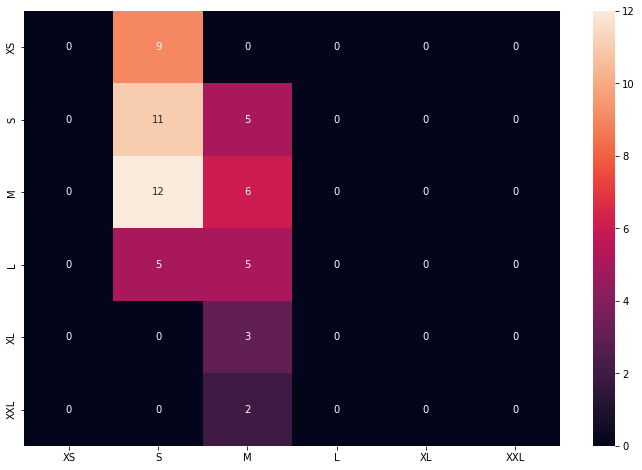

In [183]:
conf_m = confusion_matrix(y_test_ws, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [184]:
best_kneighbors_without_gender_feature.fit(X_ws, y_ws)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('model', KNeighborsClassifier(n_neighbors=36))])

In [185]:
with open('..\models\shirt_size_pred_models\kneighbors_classifier_without_gender_feature.pkl', 'wb') as f:
    pickle.dump(best_kneighbors_without_gender_feature, f)

K Neighbors results.
<br>
with all features = 46.0% accuracy score, std = 9% 
<br>
without age feature = 46.5% accuracy score, std = 8%
<br>
without sex seature = 47.3% accuracy score, std = 6%

# Voting Classifier

In [186]:
from sklearn.ensemble import VotingClassifier

In [187]:
import itertools

def all_sub_arrays(xs):
    n = len(xs)
    indices = list(range(n+1))
    for i,j in itertools.combinations(indices,2):
        yield xs[i:j]

In [188]:
all_models = [('log_reg', best_log_reg.named_steps.model), ('dec_tree', best_tree.named_steps.model), 
              ('svm', best_svc.named_steps.model), ('kneighbors', best_kneighbors.named_steps.model)]

In [189]:
all_model_combs = list(all_sub_arrays(all_models))

In [190]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['age', 'height', 'weight'])])

In [191]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', VotingClassifier(estimators=[]))])

In [192]:
param_grid = [
    {
        'model__estimators': all_model_combs, 
        'model__voting': ['soft'],
    }
]

In [193]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train, y_train)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 10 is smaller than n_iter=500. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700))], model__voting=soft;, score=0.609 total time=   0.0s
[CV 2/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700))], model__voting=soft;, score=0.478 total time=   0.0s
[CV 3/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700))], model__voting=soft;, score=0.522 total time=   0.0s
[CV 4/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700))], model__voting=soft;, score=0.522 total time=   0.0s
[CV 5/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700))], model__voting=soft;, score=0.391 total time=   0.0s
[CV 6/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700))], model__voting=soft;, score=0.435 total time=   0.0s
[CV 7/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700))], model__voting=soft;, sc

[CV 6/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700)), ('dec_tree', DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=34)), ('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=11))], model__voting=soft;, score=0.435 total time=   0.0s
[CV 7/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700)), ('dec_tree', DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=34)), ('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=11))], model__voting=soft;, score=0.565 total time=   0.0s
[CV 8/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700)), ('dec_tree', DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=34)), ('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=11))], model__voting=soft;, score

[CV 4/10] END model__estimators=[('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True))], model__voting=soft;, score=0.478 total time=   0.0s
[CV 5/10] END model__estimators=[('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True))], model__voting=soft;, score=0.391 total time=   0.0s
[CV 6/10] END model__estimators=[('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True))], model__voting=soft;, score=0.522 total time=   0.0s
[CV 7/10] END model__estimators=[('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True))], model__voting=soft;, score=0.609 total time=   0.0s
[CV 8/10] END model__estimators=[('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True))], model__voting=soft;, score=0.478 total time=   0.0s
[CV 9/10] END model__estimators=[('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True))], model__voting=soft;, score=0.391 total time=   0.0s
[CV 10/10] END model__estimators=[('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True))], model__voting=soft;, score=0.545 total time=   0.0

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['age',
                                                                                'height',
                                                                                'weight'])])),
                                             ('model',
                                              VotingClassifier(estimators=[]))]),
                   n_iter=

In [194]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5       0.027125      0.001926         0.004189        0.000399   
1       0.024435      0.001115         0.003191        0.000399   
7       0.026433      0.001684         0.004185        0.000586   
2       0.044676      0.002086         0.004492        0.000502   
8       0.027727      0.002626         0.004387        0.000490   

  param_model__voting                            param_model__estimators  \
5                soft  [(dec_tree, DecisionTreeClassifier(max_depth=4...   
1                soft  [(log_reg, LogisticRegression(C=1, max_iter=70...   
7                soft  [(svm, SVC(C=5, coef0=2, gamma=0.1, probabilit...   
2                soft  [(log_reg, LogisticRegression(C=1, max_iter=70...   
8                soft  [(svm, SVC(C=5, coef0=2, gamma=0.1, probabilit...   

                                              params  split0_test_score  \
5  {'model__voting': 'soft', 'model__estimators':...           0.652174   
1  {'model__voting': 'soft', 'model__estimators':...           0.608696   
7  {'model__voting': 'soft', 'model__estimators':...           0.608696   
2  {'model__voting': 'soft', 'model__estimators':...           0.652174   
8  {'model__voting': 'soft', 'model__estimators':...           0.608696   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
5           0.478261           0.521739           0.347826           0.695652   
1           0.478261           0.565217           0.434783           0.608696   
7           0.521739           0.521739           0.478261           0.391304   
2           0.478261           0.478261           0.347826           0.565217   
8           0.478261           0.434783           0.478261           0.391304   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
5           0.478261           0.565217           0.434783           0.434783   
1           0.434783           0.608696           0.391304           0.434783   
7           0.521739           0.608696           0.478261           0.391304   
2           0.434783           0.565217           0.478261           0.434783   
8           0.521739           0.608696           0.521739           0.434783   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
5           0.545455         0.515415        0.099228                1  
1           0.545455         0.511067        0.080985                2  
7           0.545455         0.506719        0.071580                3  
2           0.545455         0.498024        0.081714                4  
8           0.500000         0.497826        0.067671                5

In [195]:
rand_search.best_params_

{'model__voting': 'soft',
 'model__estimators': [('dec_tree',
   DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=34)),
  ('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True))]}

In [196]:
best_voting_cls = rand_search.best_estimator_
best_voting_cls.fit(X_train, y_train)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model',
                 VotingClassifier(estimators=[('dec_tree',
                                               DecisionTreeClassifier(max_depth=4,
                                                                      min_samples_leaf=6,
                                                                      min_samples_split=34)),
                                              ('svm',
                                               SVC(C=5, coef0=2, gamma=0.1,
                                                   probability=True))

In [197]:
y_pred = best_voting_cls.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 3, 2, 1,
       4, 2, 4, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 2, 2, 1, 1, 1, 3, 2, 2, 1, 2], dtype=int64)

In [198]:
y_test.values

array([2, 1, 2, 2, 0, 3, 1, 0, 2, 2, 5, 1, 2, 0, 4, 1, 1, 0, 3, 3, 1, 1,
       5, 3, 3, 2, 0, 1, 2, 2, 0, 3, 3, 0, 2, 1, 4, 0, 2, 1, 1, 1, 2, 1,
       3, 2, 3, 2, 3, 2, 1, 2, 1, 4, 2, 1, 0, 2], dtype=int64)

In [199]:
accuracy_score(y_test, y_pred)

0.3275862068965517

In [200]:
x_axis = np.unique(np.concatenate([y_test.values, y_pred]))
x_axis = [s_sizes[i] for i in x_axis]
x_axis

['XS', 'S', 'M', 'L', 'XL', 'XXL']

[Text(0, 0.5, 'XS'),
 Text(0, 1.5, 'S'),
 Text(0, 2.5, 'M'),
 Text(0, 3.5, 'L'),
 Text(0, 4.5, 'XL'),
 Text(0, 5.5, 'XXL')]

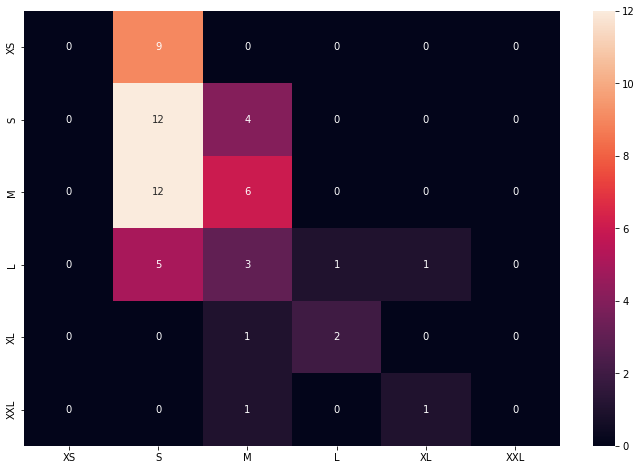

In [201]:
conf_m = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [202]:
best_voting_cls.fit(X, y)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['age', 'height',
                                                   'weight'])])),
                ('model',
                 VotingClassifier(estimators=[('dec_tree',
                                               DecisionTreeClassifier(max_depth=4,
                                                                      min_samples_leaf=6,
                                                                      min_samples_split=34)),
                                              ('svm',
                                               SVC(C=5, coef0=2, gamma=0.1,
                                                   probability=True))

In [203]:
with open(r'..\models\shirt_size_pred_models\voting_classifier.pkl', 'wb') as f:
    pickle.dump(best_voting_cls, f)

Without Age feature

In [204]:
all_models_without_age_feature = [('log_reg', best_log_reg_without_age_feature.named_steps.model), 
                                  ('dec_tree', best_tree_without_age_feature.named_steps.model), 
                                  ('svm', best_svc_without_age_feature.named_steps.model),
                                  ('kneighbors', best_kneighbors_without_age_feature.named_steps.model)]

In [205]:
all_model_combs_without_age_feature = list(all_sub_arrays(all_models_without_age_feature))

In [206]:
column_transformer = ColumnTransformer([('label_encoding', OneHotEncoder(), ['sex']),
                                        ('standard_scaler', StandardScaler(), ['height', 'weight'])])

In [207]:
pipeline = Pipeline([('column_trans', column_transformer),
                     ('model', VotingClassifier(estimators=[]))])

In [208]:
param_grid = [
    {
        'model__estimators': all_model_combs, 
        'model__voting': ['soft'],
    }
]

In [209]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train_wa, y_train_wa)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 10 is smaller than n_iter=500. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700))], model__voting=soft;, score=0.609 total time=   0.0s
[CV 2/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700))], model__voting=soft;, score=0.565 total time=   0.0s
[CV 3/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700))], model__voting=soft;, score=0.522 total time=   0.0s
[CV 4/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700))], model__voting=soft;, score=0.522 total time=   0.0s
[CV 5/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700))], model__voting=soft;, score=0.391 total time=   0.0s
[CV 6/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700))], model__voting=soft;, score=0.348 total time=   0.0s
[CV 7/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700))], model__voting=soft;, sc

[CV 6/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700)), ('dec_tree', DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=34)), ('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=11))], model__voting=soft;, score=0.348 total time=   0.0s
[CV 7/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700)), ('dec_tree', DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=34)), ('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=11))], model__voting=soft;, score=0.522 total time=   0.0s
[CV 8/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700)), ('dec_tree', DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=34)), ('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=11))], model__voting=soft;, score

[CV 5/10] END model__estimators=[('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True))], model__voting=soft;, score=0.391 total time=   0.0s
[CV 6/10] END model__estimators=[('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True))], model__voting=soft;, score=0.391 total time=   0.0s
[CV 7/10] END model__estimators=[('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True))], model__voting=soft;, score=0.565 total time=   0.0s
[CV 8/10] END model__estimators=[('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True))], model__voting=soft;, score=0.478 total time=   0.0s
[CV 9/10] END model__estimators=[('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True))], model__voting=soft;, score=0.391 total time=   0.0s
[CV 10/10] END model__estimators=[('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True))], model__voting=soft;, score=0.545 total time=   0.0s
[CV 1/10] END model__estimators=[('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=11)

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('column_trans',
                                              ColumnTransformer(transformers=[('label_encoding',
                                                                               OneHotEncoder(),
                                                                               ['sex']),
                                                                              ('standard_scaler',
                                                                               StandardScaler(),
                                                                               ['height',
                                                                                'weight'])])),
                                             ('model',
                                              VotingClassifier(estimators=[]))]),
                   n_iter=500,
                   param_distributions=[{'model__estimators': [[('log_reg',
      

In [210]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
5       0.026230      0.002100         0.004189        0.000399   
2       0.045768      0.005315         0.004795        0.001244   
7       0.024729      0.001709         0.003989        0.000446   
0       0.022539      0.001277         0.003591        0.000489   
6       0.026629      0.001184         0.004792        0.000402   

  param_model__voting                            param_model__estimators  \
5                soft  [(dec_tree, DecisionTreeClassifier(max_depth=4...   
2                soft  [(log_reg, LogisticRegression(C=1, max_iter=70...   
7                soft  [(svm, SVC(C=5, coef0=2, gamma=0.1, probabilit...   
0                soft  [(log_reg, LogisticRegression(C=1, max_iter=70...   
6                soft  [(dec_tree, DecisionTreeClassifier(max_depth=4...   

                                              params  split0_test_score  \
5  {'model__voting': 'soft', 'model__estimators':...           0.695652   
2  {'model__voting': 'soft', 'model__estimators':...           0.652174   
7  {'model__voting': 'soft', 'model__estimators':...           0.652174   
0  {'model__voting': 'soft', 'model__estimators':...           0.608696   
6  {'model__voting': 'soft', 'model__estimators':...           0.608696   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
5           0.478261           0.565217           0.304348           0.652174   
2           0.521739           0.608696           0.347826           0.608696   
7           0.478261           0.521739           0.478261           0.391304   
0           0.565217           0.521739           0.521739           0.391304   
6           0.478261           0.521739           0.347826           0.565217   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
5           0.434783           0.521739           0.391304           0.434783   
2           0.391304           0.521739           0.391304           0.391304   
7           0.391304           0.565217           0.478261           0.391304   
0           0.347826           0.565217           0.434783           0.347826   
6           0.434783           0.521739           0.391304           0.434783   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
5           0.545455         0.502372        0.112803                1  
2           0.500000         0.493478        0.102911                2  
7           0.545455         0.489328        0.081038                3  
0           0.500000         0.480435        0.089342                4  
6           0.500000         0.480435        0.075588                4

In [211]:
rand_search.best_params_

{'model__voting': 'soft',
 'model__estimators': [('dec_tree',
   DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=34)),
  ('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True))]}

In [212]:
best_voting_cls_without_age_feature = rand_search.best_estimator_
best_voting_cls_without_age_feature.fit(X_train_wa, y_train_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model',
                 VotingClassifier(estimators=[('dec_tree',
                                               DecisionTreeClassifier(max_depth=4,
                                                                      min_samples_leaf=6,
                                                                      min_samples_split=34)),
                                              ('svm',
                                               SVC(C=5, coef0=2, gamma=0.1,
                                                   probability=True))],
                                  voting='soft'))])

In [213]:
y_pred = best_voting_cls_without_age_feature.predict(X_test_wa)
y_pred

array([1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 1, 1, 1, 3, 2, 1,
       4, 2, 4, 2, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1,
       1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 1, 2], dtype=int64)

In [214]:
y_test_wa.values

array([2, 1, 2, 2, 0, 3, 1, 0, 2, 2, 5, 1, 2, 0, 4, 1, 1, 0, 3, 3, 1, 1,
       5, 3, 3, 2, 0, 1, 2, 2, 0, 3, 3, 0, 2, 1, 4, 0, 2, 1, 1, 1, 2, 1,
       3, 2, 3, 2, 3, 2, 1, 2, 1, 4, 2, 1, 0, 2], dtype=int64)

In [215]:
accuracy_score(y_test_wa, y_pred)

0.3448275862068966

In [216]:
x_axis = np.unique(np.concatenate([y_test_wa.values, y_pred]))
x_axis = [s_sizes[i] for i in x_axis]
x_axis

['XS', 'S', 'M', 'L', 'XL', 'XXL']

[Text(0, 0.5, 'XS'),
 Text(0, 1.5, 'S'),
 Text(0, 2.5, 'M'),
 Text(0, 3.5, 'L'),
 Text(0, 4.5, 'XL'),
 Text(0, 5.5, 'XXL')]

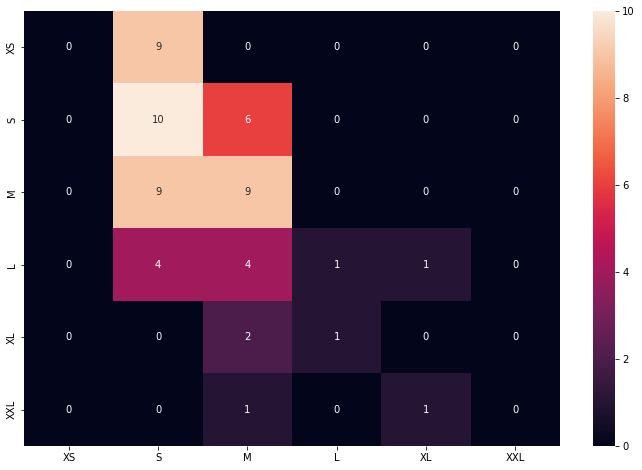

In [217]:
conf_m = confusion_matrix(y_test_wa, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [218]:
best_voting_cls_without_age_feature.fit(X_wa, y_wa)

Pipeline(steps=[('column_trans',
                 ColumnTransformer(transformers=[('label_encoding',
                                                  OneHotEncoder(), ['sex']),
                                                 ('standard_scaler',
                                                  StandardScaler(),
                                                  ['height', 'weight'])])),
                ('model',
                 VotingClassifier(estimators=[('dec_tree',
                                               DecisionTreeClassifier(max_depth=4,
                                                                      min_samples_leaf=6,
                                                                      min_samples_split=34)),
                                              ('svm',
                                               SVC(C=5, coef0=2, gamma=0.1,
                                                   probability=True))],
                                  voting='soft'))])

In [219]:
with open(r'..\models\shirt_size_pred_models\voting_classifier_without_age_feature.pkl', 'wb') as f:
    pickle.dump(best_voting_cls_without_age_feature, f)

Without Sex feature

In [220]:
all_models_without_gender_feature = [('log_reg', best_log_reg_without_gender_feature.named_steps.model), 
                                     ('dec_tree', best_tree_without_gender_feature.named_steps.model), 
                                     ('svm', best_svc_without_gender_feature.named_steps.model),
                                     ('kneighbors', best_kneighbors_without_gender_feature.named_steps.model)]

In [221]:
all_model_combs_without_gender_feature = list(all_sub_arrays(all_models_without_gender_feature))

In [222]:
pipeline = Pipeline([('standard_scaler', StandardScaler()),
                     ('model', VotingClassifier(estimators=[]))])

In [223]:
param_grid = [
    {
        'model__estimators': all_model_combs, 
        'model__voting': ['soft'],
    }
]

In [224]:
rand_search = RandomizedSearchCV(pipeline, param_grid, cv=10, scoring='accuracy', n_iter=500, verbose=3)
rand_search.fit(X_train_ws, y_train_ws)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:285: UserWarning: The total space of parameters 10 is smaller than n_iter=500. Running 10 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:666: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=10.
  warnings.warn(("The least populated class in y has only %d"


Fitting 10 folds for each of 10 candidates, totalling 100 fits
[CV 1/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700))], model__voting=soft;, score=0.565 total time=   0.0s
[CV 2/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700))], model__voting=soft;, score=0.478 total time=   0.0s
[CV 3/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700))], model__voting=soft;, score=0.522 total time=   0.0s
[CV 4/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700))], model__voting=soft;, score=0.478 total time=   0.0s
[CV 5/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700))], model__voting=soft;, score=0.435 total time=   0.0s
[CV 6/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700))], model__voting=soft;, score=0.435 total time=   0.0s
[CV 7/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700))], model__voting=soft;, sc

[CV 8/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700)), ('dec_tree', DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=34)), ('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=11))], model__voting=soft;, score=0.435 total time=   0.0s
[CV 9/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700)), ('dec_tree', DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=34)), ('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=11))], model__voting=soft;, score=0.435 total time=   0.0s
[CV 10/10] END model__estimators=[('log_reg', LogisticRegression(C=1, max_iter=700)), ('dec_tree', DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=34)), ('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=11))], model__voting=soft;, scor

[CV 7/10] END model__estimators=[('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True))], model__voting=soft;, score=0.478 total time=   0.0s
[CV 8/10] END model__estimators=[('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True))], model__voting=soft;, score=0.435 total time=   0.0s
[CV 9/10] END model__estimators=[('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True))], model__voting=soft;, score=0.391 total time=   0.0s
[CV 10/10] END model__estimators=[('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True))], model__voting=soft;, score=0.545 total time=   0.0s
[CV 1/10] END model__estimators=[('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=11))], model__voting=soft;, score=0.435 total time=   0.0s
[CV 2/10] END model__estimators=[('svm', SVC(C=5, coef0=2, gamma=0.1, probability=True)), ('kneighbors', KNeighborsClassifier(n_neighbors=11))], model__voting=soft;, score=0.478 total time=   0.0s
[CV 3/10] END model__estimators=[

RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('standard_scaler',
                                              StandardScaler()),
                                             ('model',
                                              VotingClassifier(estimators=[]))]),
                   n_iter=500,
                   param_distributions=[{'model__estimators': [[('log_reg',
                                                                 LogisticRegression(C=1,
                                                                                    max_iter=700))],
                                                               [('log_reg',
                                                                 LogisticRegression(C=1,
                                                                                    max_iter=700)),
                                                                ('dec_tree',
                                                                 Dec

In [225]:
pd.DataFrame(rand_search.cv_results_).sort_values(by=['mean_test_score'], ascending=False).head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
1       0.015159      0.001074         0.001696        0.000457   
5       0.024135      0.001716         0.002394        0.000489   
2       0.036299      0.002531         0.002793        0.001163   
4       0.003989      0.000446         0.001197        0.000399   
0       0.015359      0.001492         0.001496        0.000499   

  param_model__voting                            param_model__estimators  \
1                soft  [(log_reg, LogisticRegression(C=1, max_iter=70...   
5                soft  [(dec_tree, DecisionTreeClassifier(max_depth=4...   
2                soft  [(log_reg, LogisticRegression(C=1, max_iter=70...   
4                soft  [(dec_tree, DecisionTreeClassifier(max_depth=4...   
0                soft  [(log_reg, LogisticRegression(C=1, max_iter=70...   

                                              params  split0_test_score  \
1  {'model__voting': 'soft', 'model__estimators':...           0.608696   
5  {'model__voting': 'soft', 'model__estimators':...           0.608696   
2  {'model__voting': 'soft', 'model__estimators':...           0.608696   
4  {'model__voting': 'soft', 'model__estimators':...           0.347826   
0  {'model__voting': 'soft', 'model__estimators':...           0.565217   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
1           0.478261           0.565217           0.391304           0.565217   
5           0.478261           0.608696           0.391304           0.608696   
2           0.478261           0.478261           0.478261           0.521739   
4           0.478261           0.565217           0.391304           0.652174   
0           0.478261           0.521739           0.478261           0.434783   

   split5_test_score  split6_test_score  split7_test_score  split8_test_score  \
1           0.434783           0.565217           0.478261           0.434783   
5           0.434783           0.608696           0.391304           0.391304   
2           0.434783           0.565217           0.434783           0.434783   
4           0.478261           0.521739           0.434783           0.521739   
0           0.434783           0.521739           0.478261           0.347826   

   split9_test_score  mean_test_score  std_test_score  rank_test_score  
1           0.590909         0.511265        0.072689                1  
5           0.500000         0.502174        0.093478                2  
2           0.545455         0.498024        0.057224                3  
4           0.500000         0.489130        0.082063                4  
0           0.545455         0.480632        0.060494                5

In [226]:
rand_search.best_params_

{'model__voting': 'soft',
 'model__estimators': [('log_reg', LogisticRegression(C=1, max_iter=700)),
  ('dec_tree',
   DecisionTreeClassifier(max_depth=4, min_samples_leaf=6, min_samples_split=34))]}

In [227]:
best_voting_cls_without_gender_feature = rand_search.best_estimator_
best_voting_cls_without_gender_feature.fit(X_train_ws, y_train_ws)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('model',
                 VotingClassifier(estimators=[('log_reg',
                                               LogisticRegression(C=1,
                                                                  max_iter=700)),
                                              ('dec_tree',
                                               DecisionTreeClassifier(max_depth=4,
                                                                      min_samples_leaf=6,
                                                                      min_samples_split=34))],
                                  voting='soft'))])

In [228]:
y_pred = best_voting_cls_without_gender_feature.predict(X_test_ws)
y_pred

array([1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 3, 2, 2, 1, 2, 1, 1, 1, 1, 3, 2, 1,
       4, 2, 4, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 2, 2, 2, 1, 1, 3, 2, 2, 1, 2], dtype=int64)

In [229]:
y_test_ws.values

array([2, 1, 2, 2, 0, 3, 1, 0, 2, 2, 5, 1, 2, 0, 4, 1, 1, 0, 3, 3, 1, 1,
       5, 3, 3, 2, 0, 1, 2, 2, 0, 3, 3, 0, 2, 1, 4, 0, 2, 1, 1, 1, 2, 1,
       3, 2, 3, 2, 3, 2, 1, 2, 1, 4, 2, 1, 0, 2], dtype=int64)

In [230]:
accuracy_score(y_test_ws, y_pred)

0.3103448275862069

In [231]:
x_axis = np.unique(np.concatenate([y_test_ws.values, y_pred]))
x_axis = [s_sizes[i] for i in x_axis]
x_axis

['XS', 'S', 'M', 'L', 'XL', 'XXL']

[Text(0, 0.5, 'XS'),
 Text(0, 1.5, 'S'),
 Text(0, 2.5, 'M'),
 Text(0, 3.5, 'L'),
 Text(0, 4.5, 'XL'),
 Text(0, 5.5, 'XXL')]

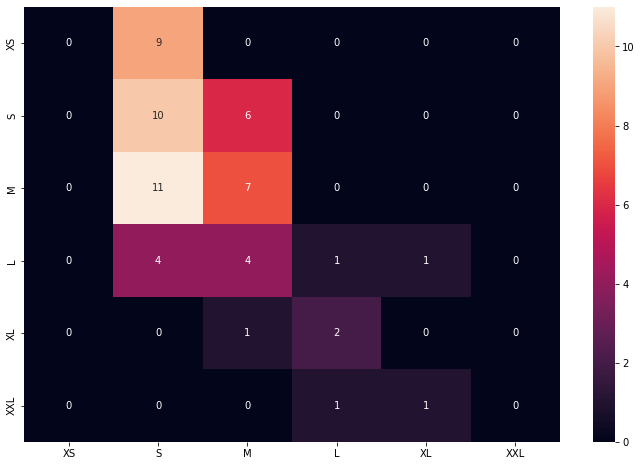

In [232]:
conf_m = confusion_matrix(y_test_ws, y_pred)

plt.figure(figsize=(12, 8))
ax = sns.heatmap(conf_m, annot=True)

ax.xaxis.set_ticklabels(x_axis)
ax.yaxis.set_ticklabels(x_axis)

In [233]:
best_voting_cls_without_gender_feature.fit(X_ws, y_ws)

Pipeline(steps=[('standard_scaler', StandardScaler()),
                ('model',
                 VotingClassifier(estimators=[('log_reg',
                                               LogisticRegression(C=1,
                                                                  max_iter=700)),
                                              ('dec_tree',
                                               DecisionTreeClassifier(max_depth=4,
                                                                      min_samples_leaf=6,
                                                                      min_samples_split=34))],
                                  voting='soft'))])

In [234]:
with open(r'..\models\shirt_size_pred_models\voting_classifier_without_gender_feature.pkl', 'wb') as f:
    pickle.dump(best_voting_cls_without_gender_feature, f)

Voting Classifier results.
<br>
with all features = 51.5% accuracy score, std = 9% 
<br>
without age feature = 50.2% accuracy score, std = 11%
<br>
without sex seature = 51.1% accuracy score, std = 7%